## Explanation of Data, Datasource and Features in the data

- Historical loan data from one of the Zimbabwe microfinance companies was used to develop the model it spread through one financial year of 2023.
- The data consist of **21 columns** , **100 000** entries of loan information and target variable which is the **Loan Status** consist of defaults and non-defaults.
- The data was sourced from one of Zimbabwe microfinance companies which their has not disclosed for security reasons on client information.
- The data consist  of borrower various features that may impact the probability of default has been selected which are explained below:



| **Column**                   | **Description**                                                                                           |
|------------------------------|-----------------------------------------------------------------------------------------------------------|
| **loan_id**                  | Unique identifier for each loan application or record.                                                   |
| **gender**                   | Borrower's gender, such as "Male," "Female," or "Other."                                                 |
| **disbursement_date**        | The date the loan was disbursed, formatted as a string (e.g., "YYYY-MM-DD").                              |
| **currency**                 | Currency in which the loan is denominated (e.g., USD).                                                   |
| **country**                  | Borrower's country of residence.                                                                         |
| **sex**                      | Another representation of the borrower's gender, potentially duplicating the `gender` column.            |
| **is_employed**              | Indicates whether the borrower is employed (`True` or `False`).                                          |
| **job**                      | Borrower's job or profession.                                                                            |
| **location**                 | Borrower's location.                                                                                     |
| **loan_amount**              | Total amount of the loan disbursed.                                                                      |
| **number_of_defaults**       | Total number of times the borrower has defaulted on loans in the past.                                   |
| **outstanding_balance**      | Remaining balance on the loan.                                                                           |
| **interest_rate**            | Interest rate applied to the loan.                                                                       |
| **age**                      | Borrower's age in years.                                                                                 |
| **number_of_defaults.1**     | Likely a duplicate of the `number_of_defaults` column.                                                   |
| **remaining_term**           | Time remaining for loan repayment.                                                                       |
| **salary**                   | Borrower's salary.                                                                                       |
| **marital_status**           | Borrower's marital status, such as "Single," "Married," or "Divorced."                                   |
| **age.1**                    | Another representation of the borrower's age, possibly duplicating the `age` column.                     |
| **loan_status**              | Current status of the loan, indicating whether it has defaulted or not.                                  |


## Importing libraries

In [1]:
#Data manipulation
import pandas as pd
import numpy as np

#Removing unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

#Exploratory Data Analysis and Plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Digraph
%matplotlib inline
plt.style.use('ggplot')
sns.set(style="white")


#Machine learning
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import math
from collections import Counter
from imblearn.combine import SMOTETomek


#Saving the model
from joblib import dump, load



#Model evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, brier_score_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, brier_score_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split



## Loading data

In [2]:
#Loading data
df = pd.read_csv('credit risk zimbabwe.csv')

## Data Preprocessing

In [3]:
#Checking the first columns in the data
df.head()

Unnamed: 0                               loan_id  gender disbursemet_date  \
0           0  8d05de78-ff32-46b1-aeb5-b3190f9c158a  female       2022 10 29   
1           1  368bf756-fcf2-4822-9612-f445d90b485b   other       2020 06 06   
2           2  6e3be39e-49b5-45b5-aab6-c6556de53c6f   other       2023 09 29   
3           3  191c62f8-2211-49fe-ba91-43556b307871  female       2022 06 22   
4           4  477cd8a1-3b01-4623-9318-8cd6122a8346    male       2023 02 08   

  currency   country     sex  is_employed      job    location  ...  \
0      USD  Zimbabwe  female         True  Teacher  Beitbridge  ...   
1      USD  Zimbabwe   other         True  Teacher      Harare  ...   
2      USD  Zimbabwe   other         True    Nurse       Gweru  ...   
3      USD  Zimbabwe  female         True   Doctor      Rusape  ...   
4      USD  Zimbabwe    male         True    Nurse    Chipinge  ...   

   number_of_defaults  outstanding_balance  interest_rate  age  \
0                   0          48653.01147           0.22   37   
1                   2          28752.06224           0.20   43   
2                   1          44797.55413           0.22   43   
3                   0          35681.49641           0.23   47   
4                   0          34156.05588           0.20   42   

   number_of_defaults.1  remaining term       salary  marital_status age.1  \
0                     0              47  3230.038869         married    37   
1                     2              62  3194.139103          single    43   
2                     1              57  3330.826656         married    43   
3                     0              42  2246.797020        divorced    47   
4                     0              45  2310.858441         married    42   

       Loan Status  
0  Did not default  
1  Did not default  
2  Did not default  
3  Did not default  
4  Did not default  

[5 rows x 21 columns]

In [4]:
#Checking the last five columns in the data
df.tail()

Unnamed: 0                               loan_id  gender  \
99995       99995  41000f4b-3821-4dea-90e1-9ecf591ed1c0    male   
99996       99996  507c2a45-02fa-4aa0-854a-8947a865a7ea   other   
99997       99997  4f10e845-8f75-4cd5-9f3a-3dad3e04a483  female   
99998       99998  eded01ca-79d2-4e86-a1e3-2ea1354edca7    male   
99999       99999  a37561ec-0901-4350-8a13-634f80ece55d   other   

      disbursemet_date currency   country     sex  is_employed           job  \
99995       2021 10 20      USD  Zimbabwe    male        False           NaN   
99996       2023 06 11      USD  Zimbabwe   other         True      Engineer   
99997       2021 10 20      USD  Zimbabwe  female         True  Data Analyst   
99998       2021 08 22      USD  Zimbabwe    male         True      Engineer   
99999       2022 04 29      USD  Zimbabwe   other         True      Engineer   

          location  ...  number_of_defaults  outstanding_balance  \
99995    Marondera  ...                   1          32968.21988   
99996  Chimanimani  ...                   0          48652.55490   
99997       Kadoma  ...                   0          34266.22413   
99998       Mutare  ...                   2          71546.02492   
99999        Gweru  ...                   0          43141.10293   

       interest_rate  age  number_of_defaults.1  remaining term       salary  \
99995           0.21   52                     1              29  1803.818844   
99996           0.23   50                     0              57  3056.127917   
99997           0.23   43                     0              53  3535.599759   
99998           0.22   49                     2              59  3082.407123   
99999           0.21   47                     0              47  2670.766532   

       marital_status age.1      Loan Status  
99995          single    52  Did not default  
99996         married    50  Did not default  
99997         married    43  Did not default  
99998          single    49  Did not default  
99999         married    47  Did not default  

[5 rows x 21 columns]

In [5]:
#Checking the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   loan_id               100000 non-null  object 
 2   gender                100000 non-null  object 
 3   disbursemet_date      100000 non-null  object 
 4   currency              100000 non-null  object 
 5   country               99900 non-null   object 
 6   sex                   100000 non-null  object 
 7   is_employed           100000 non-null  bool   
 8   job                   95864 non-null   object 
 9   location              99405 non-null   object 
 10  loan_amount           100000 non-null  int64  
 11  number_of_defaults    100000 non-null  int64  
 12  outstanding_balance   100000 non-null  float64
 13  interest_rate         100000 non-null  float64
 14  age                   100000 non-null  int64  
 15  n


**Key Observations**
- The dataset consist of 21 columns and 100000 entries (rows) and consist of 4 data types which are boolean, float, integer and object(for categorical variables)

- There seem to be duplicate columns in the dataset with slightly different names like "number_of_defaults" and "number_of_defaults.1", "age" and "age.1". So will further investigate to see if these columns are really duplicates in data cleaning process.

- The remaining term contain values which are in form of string hence it need to be converted to integer value.

In [6]:
#Checking for unique values in the data
df.nunique()

Unnamed: 0              100000
loan_id                 100000
gender                       3
disbursemet_date          1461
currency                     2
country                      3
sex                          3
is_employed                  2
job                         11
location                   157
loan_amount                149
number_of_defaults           3
outstanding_balance      99999
interest_rate               21
age                         45
number_of_defaults.1         3
remaining term             187
salary                   99994
marital_status               3
age.1                       45
Loan Status                  2
dtype: int64

- From above job and location are categorical variable with more than 10 different values so hence we will need to group them into similar subgroups when doing feature engineering this improve model performance

## Dropping unnecessary columns in the data

In [7]:
cols_to_drop = [' Unnamed: 0', 'loan_id']
cols_to_drop = [col.strip() for col in cols_to_drop]
df = df.drop(columns=cols_to_drop)


In [8]:
# The classes are heavily skewed; we need to address this issue later.
no_fraud = df['Loan Status'].value_counts()[0]
fraud = df['Loan Status'].value_counts()[1]
total = len(df)

imbalance_ratio = round(no_fraud / fraud, 2)  # Imbalance ratio calculation

print('No Frauds:', round(no_fraud / total * 100, 2), '% of the dataset')
print('Frauds:', round(fraud / total * 100, 2), '% of the dataset')
print('Imbalance Ratio (No Fraud : Fraud) =', imbalance_ratio, ': 1')


No Frauds: 85.13 % of the dataset
Frauds: 14.87 % of the dataset
Imbalance Ratio (No Fraud : Fraud) = 5.73 : 1


- Above columns named **Unnamed: 0** and **loan_id** have been dropped because are borrowers unique identifier and doesn't contribute to model development.

### Assigning correct data types

In [9]:
# Removing any non-digit characters from the 'remaining term' column
# This regular expression replaces anything that's not a digit with an empty string
df['remaining term'] = df['remaining term'].str.replace(r'\D', '', regex=True)

# Convert the 'remaining term' column to integer values
df['remaining term'] = df['remaining term'].astype(int)

In [10]:
# Convert the 'disbursemet_date' to datetime format
df['disbursemet_date'] = pd.to_datetime(df['disbursemet_date'])


### Creating subsets of numerical variables and categorical variables

In [11]:
#Creating variables for both numerical and catogoricals variables

# creates a dataset for numerical attributes
numerical_var= df.select_dtypes(include=['int64', 'float64','int32'])

# creates a dataset for categorical attributes
categorical_var = df.select_dtypes(exclude=['int64', 'float64','int32','datetime64[ns]'])

In [12]:
#Checking the categorical variables
categorical_var.head()

gender currency   country     sex  is_employed      job    location  \
0  female      USD  Zimbabwe  female         True  Teacher  Beitbridge   
1   other      USD  Zimbabwe   other         True  Teacher      Harare   
2   other      USD  Zimbabwe   other         True    Nurse       Gweru   
3  female      USD  Zimbabwe  female         True   Doctor      Rusape   
4    male      USD  Zimbabwe    male         True    Nurse    Chipinge   

  marital_status      Loan Status  
0        married  Did not default  
1         single  Did not default  
2        married  Did not default  
3       divorced  Did not default  
4        married  Did not default

In [13]:
#Checking numerical variables
numerical_var.head()

loan_amount  number_of_defaults  outstanding_balance  interest_rate  age  \
0        39000                   0          48653.01147           0.22   37   
1        27000                   2          28752.06224           0.20   43   
2        35000                   1          44797.55413           0.22   43   
3        24000                   0          35681.49641           0.23   47   
4        19000                   0          34156.05588           0.20   42   

   number_of_defaults.1  remaining term       salary  age.1  
0                     0              47  3230.038869     37  
1                     2              62  3194.139103     43  
2                     1              57  3330.826656     43  
3                     0              42  2246.797020     47  
4                     0              45  2310.858441     42

## Descriptive Statistics.


In [14]:
# central tendency: mean, median
mean = pd.DataFrame(numerical_var.apply(np.mean)).T
median = pd.DataFrame(numerical_var.apply(np.median)).T

# distribution: std, min, max, range, skew, kurtosis
std = pd.DataFrame(numerical_var.apply(np.std)).T
min_value = pd.DataFrame(numerical_var.apply(min)).T
max_value = pd.DataFrame(numerical_var.apply(max)).T
range_value = pd.DataFrame(numerical_var.apply(lambda x: x.max() - x.min())).T
skewness = pd.DataFrame(numerical_var.apply(lambda x: x.skew())).T
kurtosis = pd.DataFrame(numerical_var.apply(lambda x: x.kurtosis())).T

# concatenates
summary_stats = pd.concat([min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
summary_stats.columns = ['attributes','min','max','range','mean','median','std','skewness','kurtosis']

In [15]:
#Printing the summary stats
print('Summary stats.........')
summary_stats


Summary stats.........


attributes     min       max     range          mean  \
0           loan_amount  1000.0  273000.0  272000.0  31120.000000   
1    number_of_defaults     0.0       2.0       2.0      0.441970   
2   outstanding_balance     0.0  150960.0  150960.0  36964.909763   
3         interest_rate     0.1       0.3       0.2      0.210435   
4                   age    21.0      65.0      44.0     43.570690   
5  number_of_defaults.1     0.0       2.0       2.0      0.441970   
6        remaining term     0.0     120.0     120.0     52.881870   
7                salary   250.0   10000.0    9750.0   2781.804324   
8                 age.1    21.0      65.0      44.0     43.570690   

         median           std  skewness   kurtosis  
0  31000.000000  15895.014155  2.490731  26.112633  
1      0.000000      0.688282  1.253800   0.188519  
2  35063.852395  10014.708403  1.252835   2.750991  
3      0.210000      0.018725 -0.305553   1.254950  
4     44.000000      4.863735 -0.091378   0.129399  
5      0.000000      0.688282  1.253800   0.188519  
6     52.000000     11.985773  0.249453   0.301496  
7   2665.441568    696.446573  1.176459   2.549354  
8     44.000000      4.863735 -0.091378   0.129399

**Key Observations**
- Variables such as loan_amount, outstanding_balance, and salary show significant variability and are heavily right-skewed, with a small number of high-value outliers, as evidenced by their high skewness and kurtosis.

- The number_of_defaults variable is highly imbalanced, with most borrowers
having no defaults, though a small number with 1 or 2 defaults could be significant for risk assessment.

- Loan amounts range widely from **1,000** to **273,000**, with a mean of **31,120**. The distribution is highly skewed due to a few large loans.

- Borrowers are typically in their **early 40s** (mean age: **43.6 years**), with a consistent interest rate around **0.21%**.

- The **remaining loan term** averages **53 months**, indicating most loans are medium-term.

- Salaries show significant variation, with most borrowers earning around **$2,781**, though some outliers earn substantially more.

- Defaults are relatively rare, with the majority of borrowers having **zero defaults**.

- **Outstanding balances** average around **$36,965**, reflecting the common loan repayment progression.

- Overall, the data suggests a concentrated middle ground for borrowers' financial and demographic profiles, with a few extreme values affecting averages.


In [16]:
#Descriptive statistics for categorical variables
df.describe(exclude=['int64', 'float64','int32','datetime64[ns]']).T

count unique              top   freq
gender          100000      3             male  35028
currency        100000      2              USD  99980
country          99900      3         Zimbabwe  99787
sex             100000      3             male  35028
is_employed     100000      2             True  95864
job              95864     11         Engineer  16524
location         99405    157           Harare   8338
marital_status  100000      3          married  44733
Loan Status     100000      2  Did not default  85134

**Key Observations**

- Harare being the most frequent location (8,338 times)and employment is widespread, with 95,864 borrowers marked as employed, and the most common profession is Engineer (16,524 occurrences).

- Marital status indicates most borrowers are married (44,733) and regarding loan performance, the majority (85,134) of loans have not defaulted, reflecting a largely reliable borrower base.

## Data Cleaning

In [17]:
#First we need to copy and save a copy of our dataset before we proceed with cleaning in case of errors
df_copy = df.copy()

In [18]:
#Saving the data to excel
df_copy.to_excel('df_copy.xlsx')

In [19]:
# Check out the missing values
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

count  percentage
gender                    0        0.00
disbursemet_date          0        0.00
currency                  0        0.00
country                 100        0.10
sex                       0        0.00
is_employed               0        0.00
job                    4136        4.14
location                595        0.60
loan_amount               0        0.00
number_of_defaults        0        0.00
outstanding_balance       0        0.00
interest_rate             0        0.00
age                       0        0.00
number_of_defaults.1      0        0.00
remaining term            0        0.00
salary                    0        0.00
marital_status            0        0.00
age.1                     0        0.00
Loan Status               0        0.00

- We can clearly see that according to the analysis on missing data the job and location have approx 4 and 0,6 percent  respectively of misssing data.

- According to blog post by 365 datascience (2022) it says according to rule of thump if the number of missing values is less than 5% you can drop the missing values.

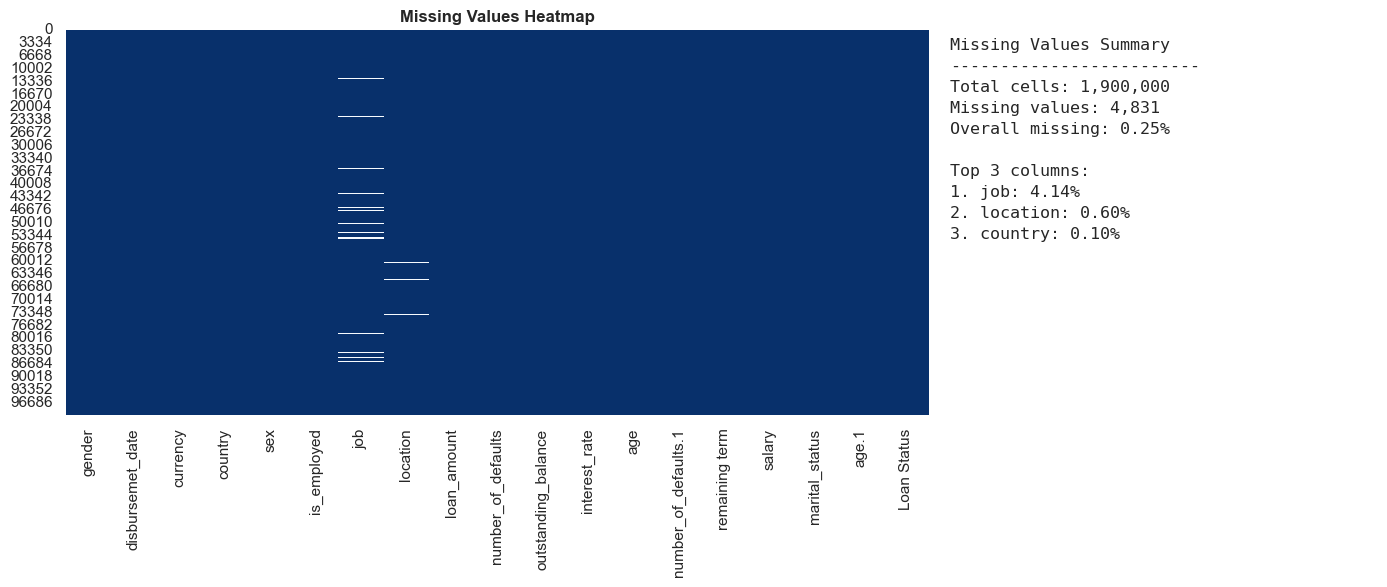

In [20]:
# Calculate missing value percentages
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
total_missing = df.isnull().sum().sum()
total_cells = df.size
overall_missing_percent = (total_missing / total_cells) * 100

# Create figure with two subplots - one for heatmap, one for summary text
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), 
                               gridspec_kw={'width_ratios': [4, 2]})
plt.rcParams.update({'font.family': 'DejaVu Sans', 'font.size': 11})

# Heatmap on the left
sns.heatmap(df.isnull(), cbar=False, cmap='Blues_r', ax=ax1)
ax1.set_title('Missing Values Heatmap', fontsize=12, weight='bold')

# Text summary on the right
top_missing = missing_percent.head(3)
summary_text = (
    f"Missing Values Summary\n"
    f"{'-'*25}\n"
    f"Total cells: {total_cells:,}\n"
    f"Missing values: {total_missing:,}\n"
    f"Overall missing: {overall_missing_percent:.2f}%\n\n"
    f"Top 3 columns:\n"
)
for i, (col, percent) in enumerate(top_missing.items(), 1):
    summary_text += f"{i}. {col}: {percent:.2f}%\n"

# Display text
ax2.text(0.01, 0.98, summary_text, ha='left', va='top',
         fontsize=12, family='monospace', linespacing=1.5)
ax2.axis('off')

plt.tight_layout()
plt.savefig('missval.png', dpi=300)
plt.show()


- The above plot show the white strips(or marks) on the missing data so we need to drop missing values because the variables like **location** and **job** we can't impute values to them since they are string variables.

In [21]:
#Dropping the missing data in the dataset
df.dropna(inplace=True)

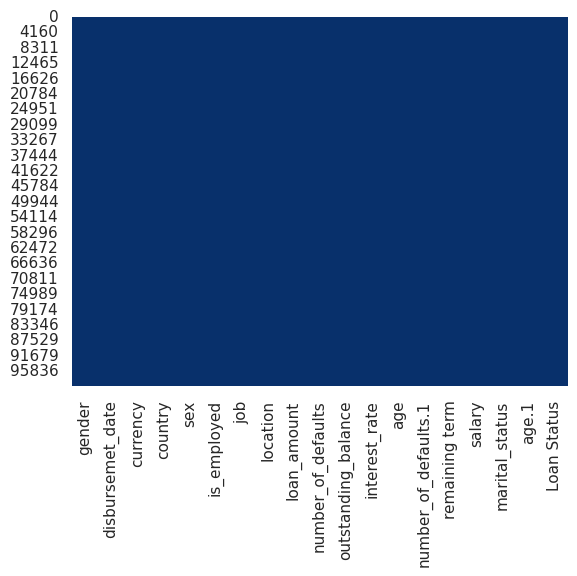

In [22]:
#Verifying the data for missing values using the plot
sns.heatmap(df.isnull(), cbar=False, cmap='Blues_r')
# Show the plot
plt.show()

- The plot is now clear this indicated that there exist no more missing values in data

In [23]:
#Checking the duplicates in the column
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [24]:
#Checking and Dropping duplicates in the data
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


### Outlier Assessment

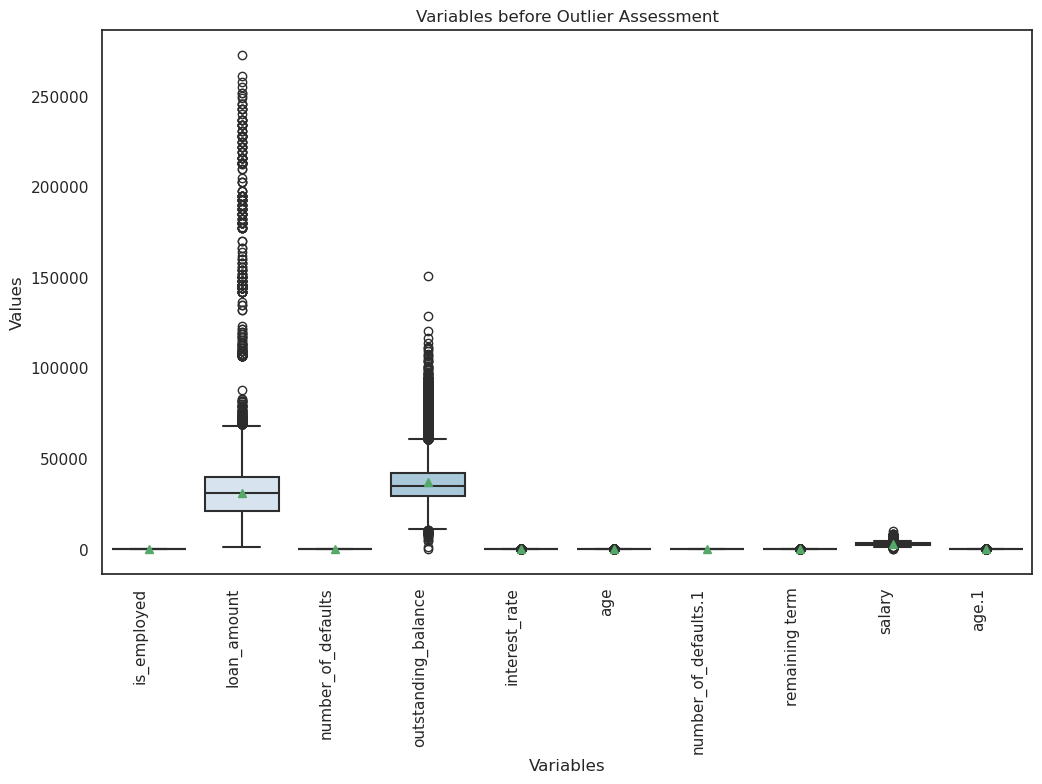

In [25]:
# Create a figure with adjusted size for better clarity
plt.figure(figsize=(12, 8))

sns.boxplot(
    showmeans=True,  # Display mean values as markers
    data=df,
    orient="v",  # Vertical orientation for boxplots
    linewidth=1.5,  # Adjust line width for better visibility
    palette='Blues'
)

# Customize x-axis labels (assuming they are column names in df)
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for readability
plt.xlabel("Variables", fontsize=12)  # Set x-axis label

# Customize y-axis label
plt.ylabel("Values", fontsize=12)  # Set y-axis label
plt.title('Variables before Outlier Assessment')
# Adjust spacing between subplots
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin to avoid overlapping titles

# Save the figure with high resolution
plt.savefig('v_before ldd.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

- From above we can realise that there are significant outliers in the following variables namely, **outstanding_balance** , **loan_amount** and **salary** and confirm the columns using z score method

In [26]:
# List of columns to check for outliers
columns_to_check = ['outstanding_balance', 'loan_amount', 'salary']

# Function to calculate Z-scores and identify outliers
def detect_outliers_zscore(df, columns):
    outlier_summary = {}
    for col in columns:
        # Calculate Z-scores
        z_scores = (df[col] - df[col].mean()) / df[col].std()

        # Identify outliers (Z-score > 3 or < -3)
        outliers = df[np.abs(z_scores) > 3]

        # Summary for the column
        outlier_summary[col] = {
            'Total Outliers': len(outliers),
            'Outlier Percentage': (len(outliers) / len(df)) * 100,
            'Outlier Indices': outliers.index.tolist()
        }
    return outlier_summary

# Run outlier detection
outlier_report = detect_outliers_zscore(df, columns_to_check)

# Display the outlier summary
for col, stats in outlier_report.items():
    print(f"Column: {col}")
    print(f"Total Outliers: {stats['Total Outliers']}")
    print(f"Outlier Percentage: {stats['Outlier Percentage']:.2f}%")

Column: outstanding_balance
Total Outliers: 1189
Outlier Percentage: 1.25%
Column: loan_amount
Total Outliers: 296
Outlier Percentage: 0.31%
Column: salary
Total Outliers: 1139
Outlier Percentage: 1.20%


- From above the total percentage of outliers in the all columns is  less than 2% hence we can safely drop the significant outliers in the data.

In [27]:
col = ['loan_amount','outstanding_balance','salary']

In [28]:
# Loop through each column and drop outliers
for col in col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the DataFrame to remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

- The above code block it removes outliers from the selected features in col variables using IQR method and it iterate in each column dropping outliers

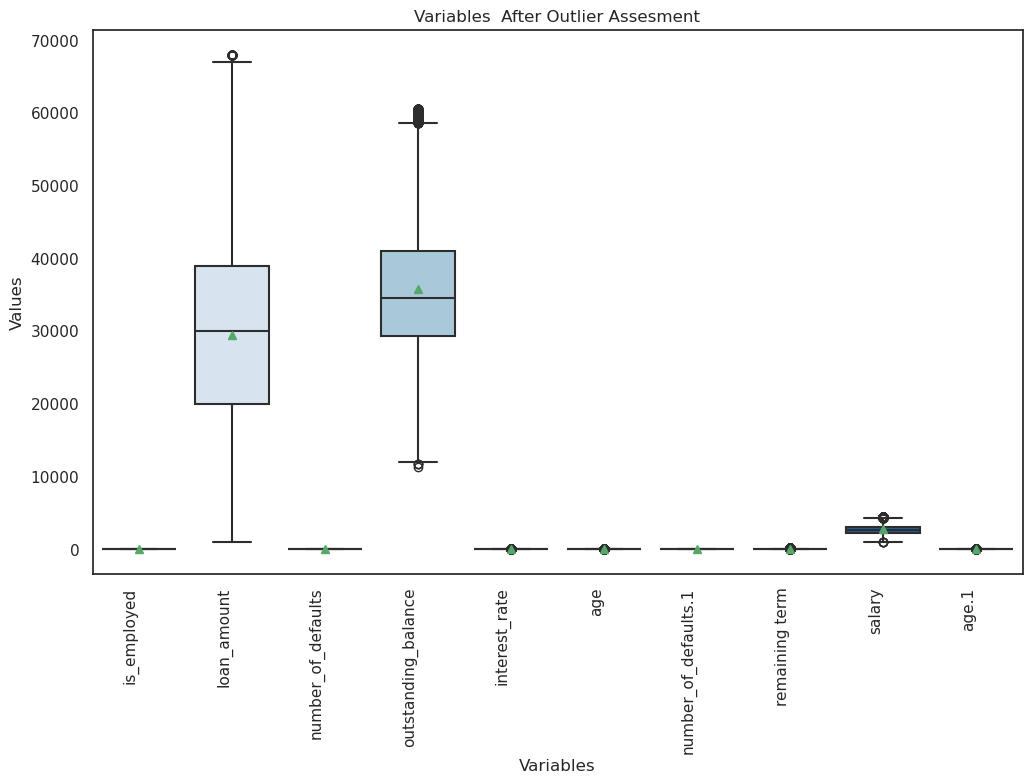

In [29]:
# Create a figure with adjusted size for better clarity
plt.figure(figsize=(12, 8))


sns.boxplot(
    showmeans=True,  # Display mean values as markers
    data=df,
    orient="v",  # Vertical orientation for boxplots
    linewidth=1.5,  # Adjust line width for better visibility
    palette='Blues'
)

# Customize x-axis labels (assuming they are column names in df)
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for readability
plt.xlabel("Variables", fontsize=12)  # Set x-axis label

# Customize y-axis label
plt.ylabel("Values", fontsize=12)  # Set y-axis label
plt.title('Variables  After Outlier Assesment')
# Adjust spacing between subplots
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin to avoid overlapping titles


# Save the figure with high resolution
plt.savefig('v_before_ldd.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

**is_employed:**

The box plot for employment status is likely categorical. If it's binary (e.g., employed vs. unemployed), it may not display the same box plot characteristics as continuous variables.
Interpretation: This variable may show the proportion of employed versus unemployed individuals.


**loan_amount:**

Median: The median loan amount is shown as a line within the box.
IQR: The box indicates the range between the first and third quartiles.
Outliers: Any points above the upper whisker are potential outliers, indicating individuals who have taken out significantly larger loans compared to the majority.

**number_of_defaults:**

This variable shows the frequency of defaults per individual.
Interpretation: The box plot can indicate that most individuals have low defaults, while a few may have higher counts, which could be outliers.

**outstanding_balance:**

Similar to loan amount, this box plot provides insight into the distribution of outstanding balances.
Interpretation: The presence of outliers indicates individuals with significantly higher outstanding balances, which may warrant further investigation.

**interest_rate:**
Shows the distribution of interest rates across loans.
Interpretation: The box plot can help identify the range of interest rates and any outliers that may indicate unusually high or low rates.

**age:**

Displays the age distribution of borrowers.
Interpretation: The box plot can show the median age and highlight any outliers (e.g., very young or old borrowers).

**number_of_defaults_1:**

This variable likely represents a different or adjusted measure of defaults.
Interpretation: Comparison between this and the previous defaults variable can provide insights into changes in default behavior.

**salary:**

Shows the distribution of salaries in the dataset.
Interpretation: The presence of outliers could indicate individuals with very high incomes compared to the rest.
age_1:
This could represent a different age-related variable or transformation.
Interpretation: Similar to the other age variable, the box plot can highlight any outliers in this context.

- The above code show the appearance of the plots after dropping outliers using IQR method

In [30]:
#Saving cleaned data
df.to_excel('wine_dataset_cleaned.xlsx')

## Feature engineering

In [31]:
#Grouping locations into provinces

def categorize_location(location):
    location = str(location).strip().title()  # Normalize the case and strip whitespace
    if 'Harare' in location:
        return 'Harare Province'
    elif 'Bulawayo' in location:
        return 'Bulawayo Province'
    elif 'Mutare' in location or 'Rusape' in location or 'Nyanga' in location or 'Chimanimani' in location or 'Chipinge' in location:
        return 'Manicaland Province'
    elif 'Marondera' in location or 'Chivhu' in location:
        return 'Mashonaland East Province'
    elif 'Kariba' in location or 'Karoi' in location:
        return 'Mashonaland West Province'
    elif 'Masvingo' in location or 'Chiredzi' in location or 'Beitbridge' in location:
        return 'Masvingo Province'
    elif 'Victoria Falls' in location or 'Hwange' in location:
        return 'Matabeleland North Province'
    elif 'Plumtree' in location or 'Gwanda' in location or 'Beitbridge' in location:
        return 'Matabeleland South Province'
    elif 'Gweru' in location or 'Kadoma' in location or 'Kwekwe' in location or 'Shurugwi' in location or 'Zvishavane' in location or 'Redcliff' in location or 'Gokwe' in location:
        return 'Midlands Province'
    else:
        return 'Unknown Province'

df['province'] = df['location'].apply(categorize_location)

- The defined function above group the specific loactions into respective provincies in Zimbabwe and this improve machine model performance.
- It reduces dimensionality such that instead of having many unique location values, you have a smaller set of provinces, making the data more manageable for analysis.

In [32]:
# Define the function to categorize job titles into high paying and less paying
def categorize_salary(job_title):
    high_paying_jobs = ['Doctor', 'Lawyer', 'Engineer', 'Data Scientist', 'Software Developer', 'SoftwareDeveloper', 'Data Analyst','Data Scintist']
    less_paying_jobs = ['Teacher', 'Nurse', 'Accountant']

    job_title = str(job_title).strip()  # Remove any leading/trailing whitespace

    if job_title in high_paying_jobs:
        return 'High Paying'
    elif job_title in less_paying_jobs:
        return 'Less Paying'
    elif pd.isnull(job_title):
        return 'Unknown'  # Handle NaN values
    else:
        return 'Other'  # For job titles not in the lists


# Apply the function to the 'Job ' column
df['Salary_Category'] = df['job'].apply(categorize_salary)

- The code above categorise the jobs into high paying jobs and less paying jobs


## Exploratory Data Analysis

### Plotting key categorical variables

In [33]:
#assign the df to excel
df.to_excel('df.xlsx')

In [34]:
df.columns

Index(['gender', 'disbursemet_date', 'currency', 'country', 'sex',
       'is_employed', 'job', 'location', 'loan_amount', 'number_of_defaults',
       'outstanding_balance', 'interest_rate', 'age', 'number_of_defaults.1',
       'remaining term', 'salary', 'marital_status', 'age.1', 'Loan Status',
       'province', 'Salary_Category'],
      dtype='object')

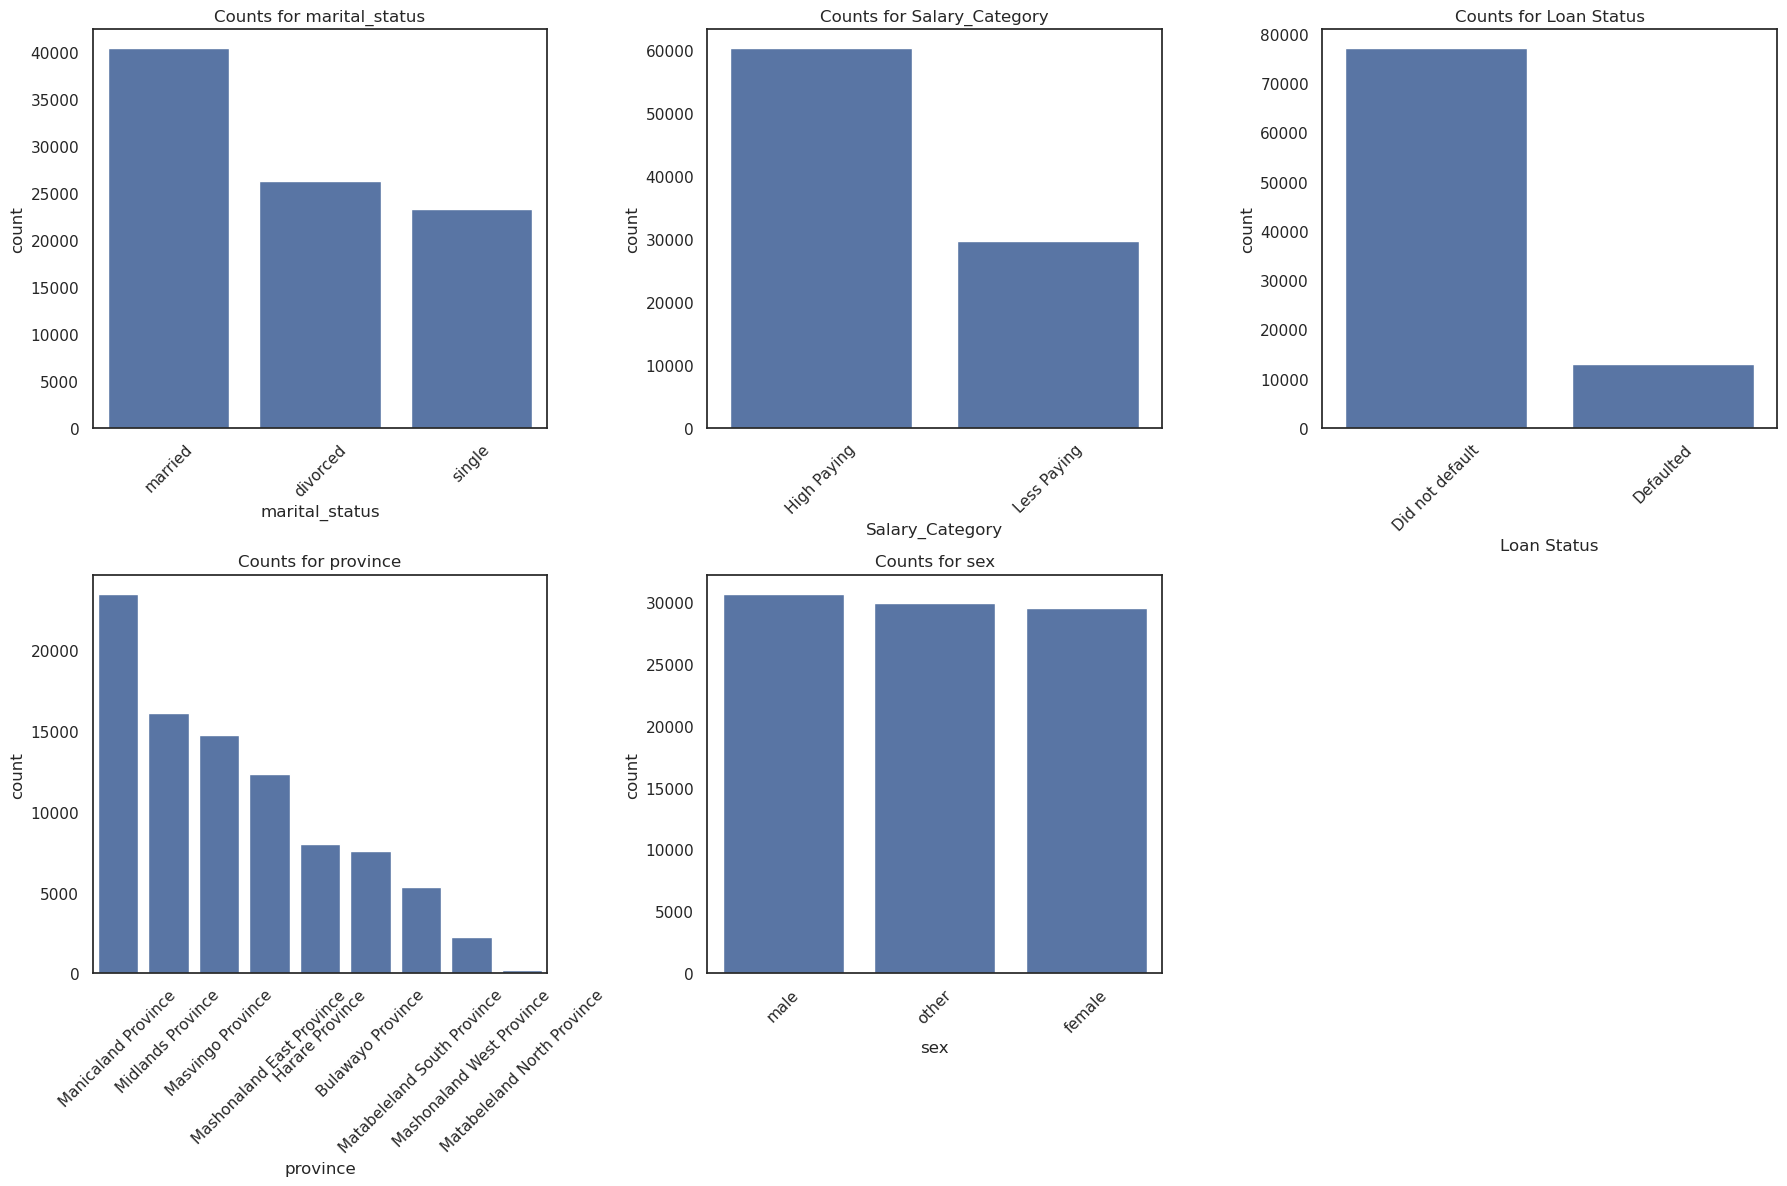

In [35]:
# Specify the categorical columns to include
categorical_cols = ['marital_status', 'Salary_Category', 'Loan Status', 'province', 'sex']

# Calculate the number of rows and columns for subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = math.ceil(len(categorical_cols) / num_cols)  # Number of rows, rounded up

# Create subplots with calculated rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through categorical columns and create count plots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Counts for {col}")
    # Rotate x-axis labels using labelrotation with desired ha
    axes[i].tick_params(axis='x', rotation=45, labelrotation=45)  # Rotate and align labels

# Remove any empty subplots if the number of categorical columns
# is not a multiple of the number of columns in the grid
for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

- The above shows the distribution of the categorical variables within the data set

**Counts for Marital Status**

Description: Displays the distribution of individuals across different marital statuses (e.g., married, divorced, single).
Interpretation: Shows the most common marital status within the dataset, providing insights into borrower demographics.

**Counts for Salary Category**

Description: Represents the distribution of individuals across different salary categories (e.g., low, medium, high).
Interpretation: Highlights the prevalence of different income levels among borrowers, useful for understanding financial profiles.

**Counts for Loan Status**

Description: Illustrates the number of loans categorized by status (e.g., defaulted, paid).
Interpretation: Indicates the proportion of loans that are in default versus those that have been successfully paid off.

**Counts for Province**

Description: Shows the distribution of borrowers across various provinces.
Interpretation: Identifies geographic trends, allowing for analysis of regional differences in borrowing behavior.

**Counts for Sex**

Description: Displays the distribution of borrowers by sex (e.g., male, female).
Interpretation: Provides insights into gender representation within the dataset, which can influence lending practices.

## Plotting the categorical variables

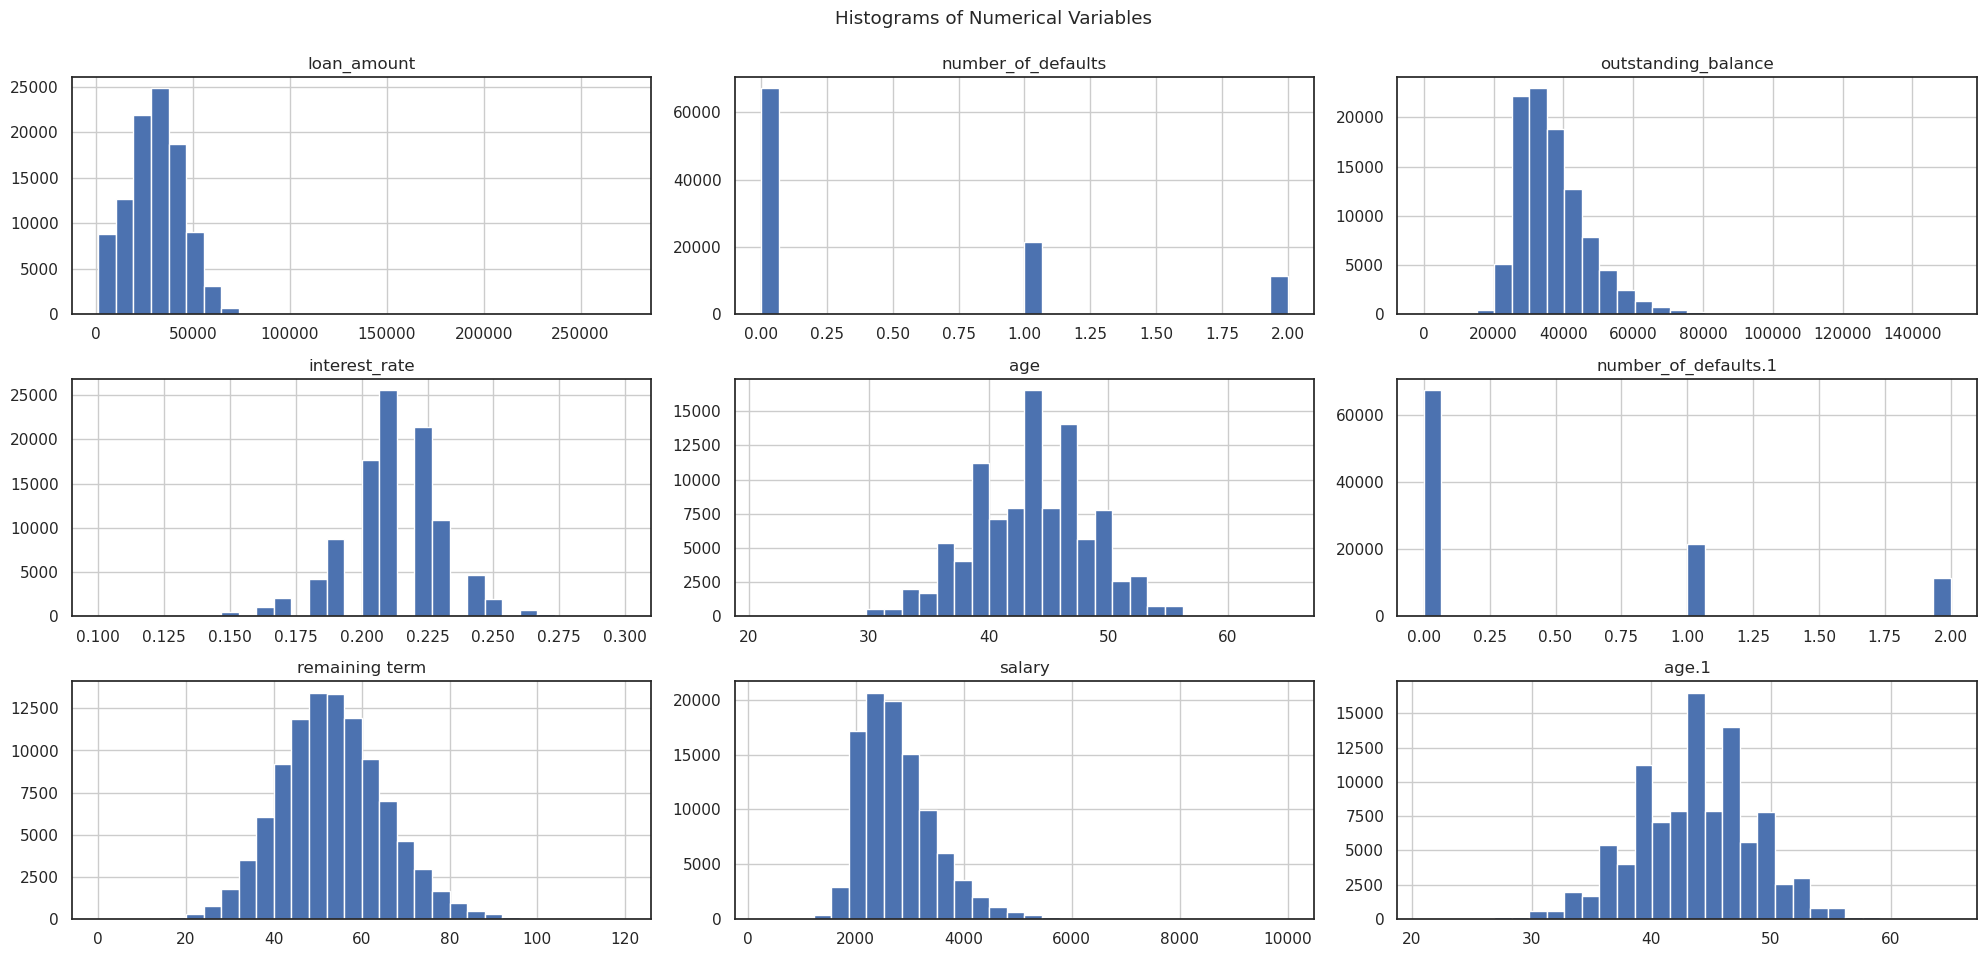

In [36]:
# Plot histograms for each numerical variable
numerical_var.hist(bins=30, figsize=(20, 15), layout=(5, 3))
plt.tight_layout()
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.show()

- Moost of the numerical variables show a normal distribution except for few which are **loan_amount** , **outstanding_balance** , **salary** which are heavily skewed


**Loan Amount**

Description: Shows the distribution of loan amounts.
Interpretation: Most loans are concentrated in the lower range, with fewer larger loans, indicating a right-skewed distribution.

** Number of Defaults**

Description: Displays the frequency of defaults per individual.
Interpretation: Most individuals have zero or low defaults, with a significant drop-off for higher default counts, suggesting a right-skewed distribution.

**Outstanding Balance**

Description: Illustrates the distribution of outstanding loan balances.
Interpretation: Similar to loan amounts, there is a concentration in lower balances, indicating many individuals have low outstanding debts.

**Age**

Description: Represents the age distribution of borrowers.
Interpretation: The distribution appears roughly normal, with most borrowers in their 30s to 50s.

**Number of Defaults**

Description: Shows another measure of defaults, likely a modified version.
Interpretation: Similar to the regular number of defaults, with most individuals having low counts.

**Remaining Term**

Description: Displays the distribution of the remaining term on loans.
Interpretation: Many loans have a remaining term of around 30 to 50 months, indicating common loan durations.

**Salary**
Description: Shows the distribution of borrower salaries.
Interpretation: The distribution is right-skewed, with most borrowers earning lower to moderate salaries.

**Age (1)**

Description: Represents a transformed or adjusted age variable.
Interpretation: Similar to the regular age distribution, likely confirming trends seen in the earlier histogram.

In [37]:
# List of columns to log-transform
columns_to_transform = ['loan_amount', 'outstanding_balance', 'salary']

# Apply log transformation and replace the columns
for col in columns_to_transform:
# Apply log transformation (adding a small value to avoid log(0))
    df[col] = np.log1p(df[col])  # log1p(x) computes log(1 + x)




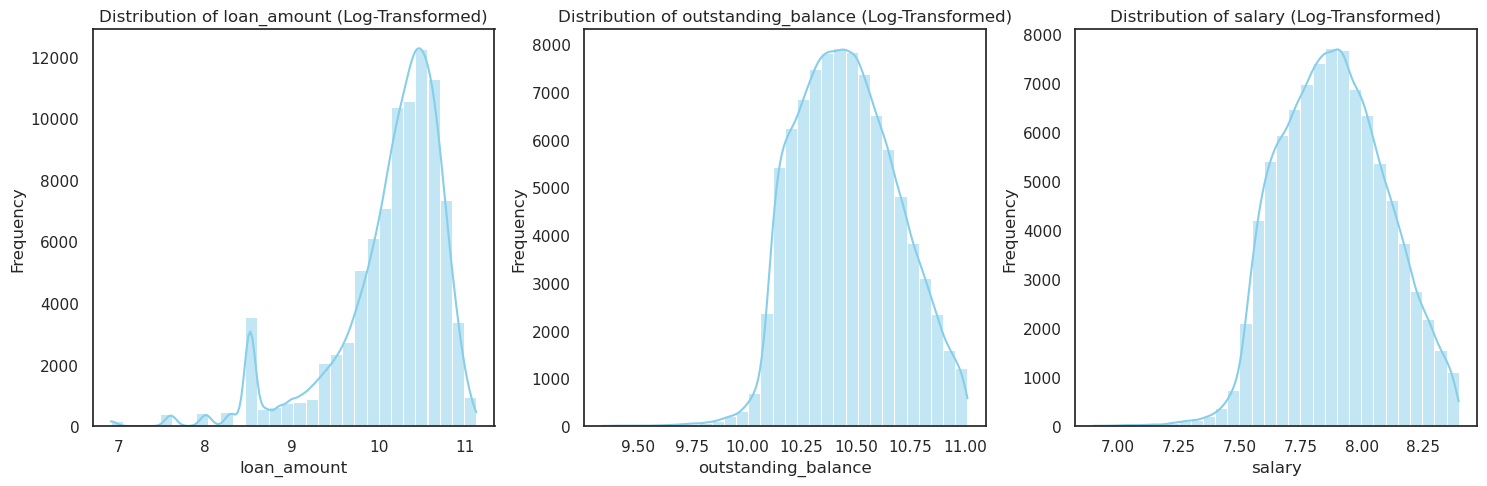

In [38]:
# List of columns to plot
columns_to_plot = ['loan_amount', 'outstanding_balance', 'salary']

# Set up the plot size and layout
plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)  # Create a subplot for each column
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col} (Log-Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")

# Display the plots
plt.tight_layout()
plt.show()

**Distribution of Loan Amount (Log-Transformed)**

Shape: The distribution appears to be positively skewed, with a high concentration of smaller loan amounts and a long tail extending towards larger values.
Interpretation: This suggests that while many borrowers take out smaller loans, there are a few borrowers who take out significantly larger loans. The log transformation has compressed the scale, making it easier to visualize this distribution

**Distribution of Outstanding Balance (Log-Transformed)**

Shape: Similar to the loan amount distribution, the outstanding balance distribution is also positively skewed. Most customers have lower outstanding balances, with fewer customers having very high balances.

**Distribution of Salary (Log-Transformed)**

Shape: The salary distribution is also positively skewed, with a majority of individuals earning lower salaries and a smaller number earning higher salaries.
Interpretation: This suggests that most individuals in the dataset earn moderate salaries, while a few individuals earn much higher salaries. The log transformation again helps in visualizing the distribution more clearly by compressing the range of high salaries.

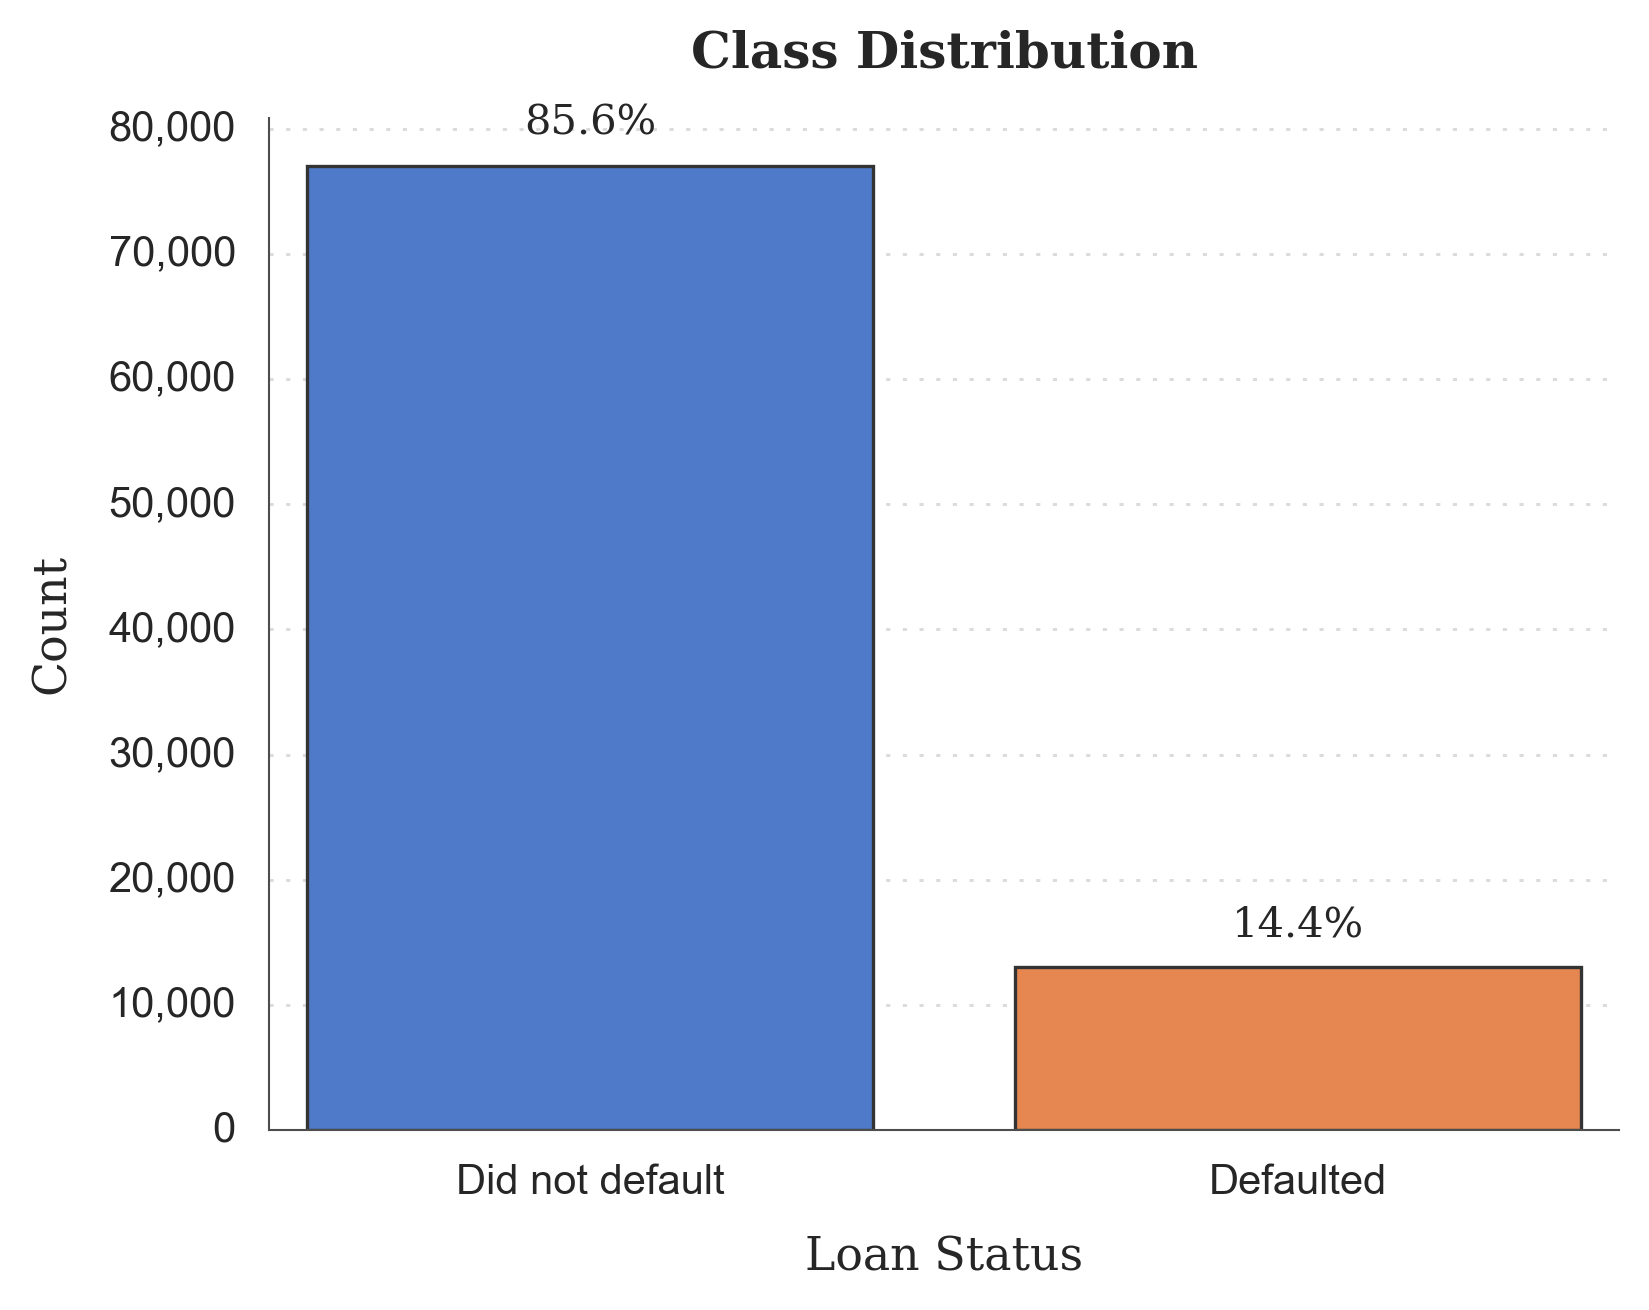

In [40]:
#modify this class to name the 0 and 1 for minority not their names like default and non default but 0 and 1 and minority should be 1 

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set academic style - classic with some modern touches
plt.style.use('classic')
sns.set_style("whitegrid", {
    'grid.linestyle': ':',
    'grid.alpha': 0.4,
    'axes.edgecolor': '0.3',
    'axes.linewidth': 0.8
})

# Create figure with optimal dimensions for academic papers
fig, ax = plt.subplots(figsize=(6, 4.5), dpi=300)
fig.subplots_adjust(bottom=0.15, left=0.15)

# Create ordered countplot with muted colors
class_order = df['Loan Status'].value_counts().index
ax = sns.countplot(
    x='Loan Status',
    data=df,
    order=class_order,
    palette=sns.color_palette("muted"),
    edgecolor='0.2',
    linewidth=0.8,
    saturation=0.9,
    ax=ax
)

# Title and labels with proper academic styling
ax.set_title(
    'Class Distribution',
    fontsize=12,
    pad=12,
    fontweight='bold',
    family='serif'
)
ax.set_xlabel(
    'Loan Status',
    fontsize=11,
    labelpad=8,
    family='serif'
)
ax.set_ylabel(
    'Count',
    fontsize=11,
    labelpad=8,
    family='serif'
)

# Calculate and annotate percentages
total = len(df['Loan Status'])
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 0.02*total,
        f'{height/total:.1%}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontfamily='serif'
    )

# Axis ticks styling
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

# Custom grid and frame
ax.yaxis.grid(True, linestyle=':', linewidth=0.7, alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Scientific formatting if counts are large
if ax.get_ylim()[1] > 10000:
    formatter = FuncFormatter(lambda x, p: format(int(x), ','))
    ax.yaxis.set_major_formatter(formatter)

# Remove unnecessary padding
ax.margins(x=0.03, y=0.05)

# Save in publication quality (uncomment when needed)
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

- The bar chart illustrates the distribution of loan statuses, revealing a significant class imbalance. Approximately 85.6% of loans did not default, while only 14.4% defaulted.

- This imbalance indicates that the dataset is heavily skewed toward non-default cases, which can present challenges for predictive modeling. Machine learning models trained on such imbalanced data may become biased toward the majority class, reducing their ability to accurately predict defaults.

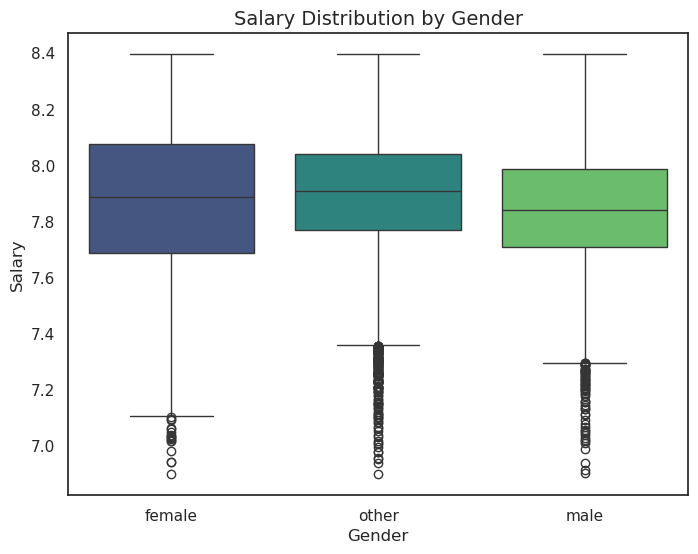

In [40]:
# 3. Salary by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="gender", y="salary", palette="viridis")
plt.title("Salary Distribution by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.show()

- The boxplot shows the distribution of salaries across different gender categories (female, other, and male).

- The median salary appears similar across all genders, indicating no significant difference.

- The plot highlights the presence of outliers across all groups, suggesting some individuals earn significantly less than the majority


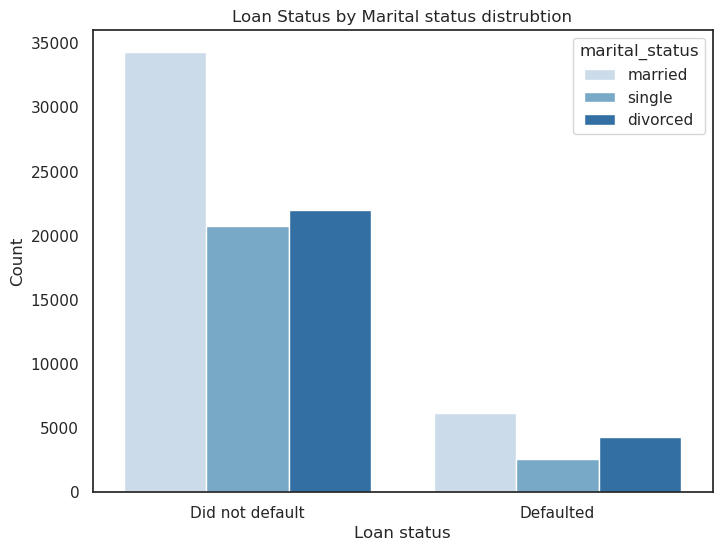

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan Status', hue='marital_status', data=df,palette='Blues')
plt.title('Loan Status by Marital status distrubtion')
plt.xlabel('Loan status')
plt.ylabel('Count')
plt.show()

- The bar chart depicts the distribution of loan statuses by marital status.

- The majority of borrowers, regardless of marital status, did not default on their loans.

- Married individuals have the highest count of non-defaults, followed by single and divorced borrowers.

- However, when focusing on defaults, the trend is consistent, with married individuals defaulting more frequently than other groups, though this is likely due to their higher overall representation.


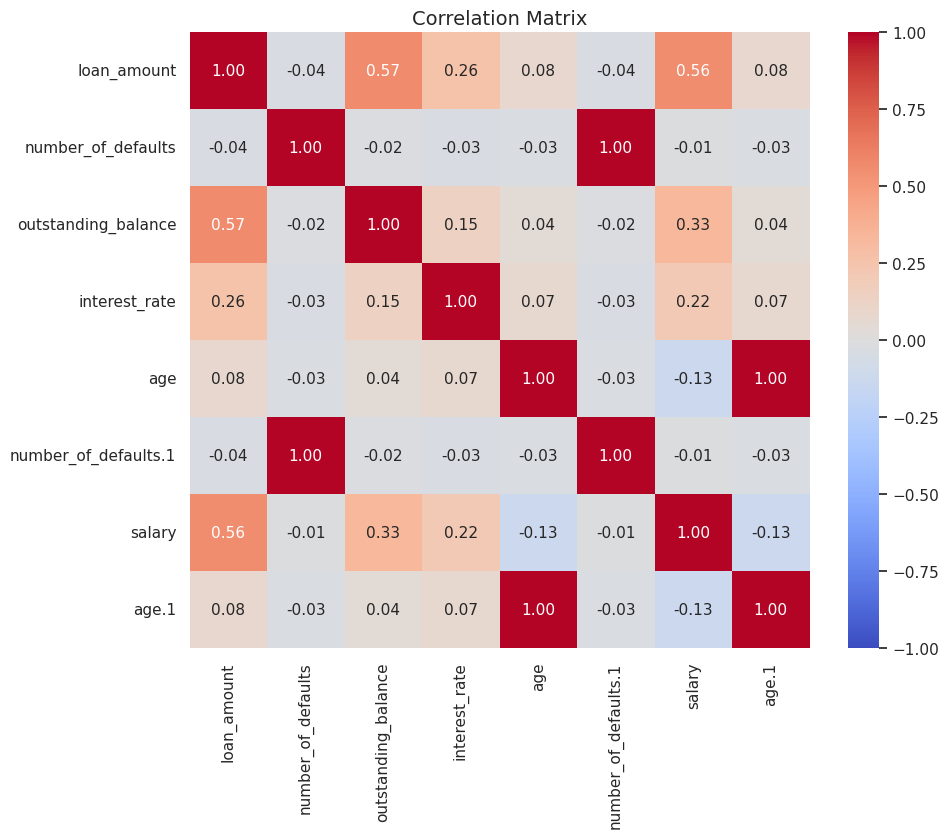

In [42]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

- The plot show the correlation between the numerical variables hence it aid in showing features which are heavily correlated what we we call multicollinearity for instance the following feature pose a significant correlation which are age and age1 same with number of defaults and number of defaults1  hence we need to drop one of the features before we employ our models.

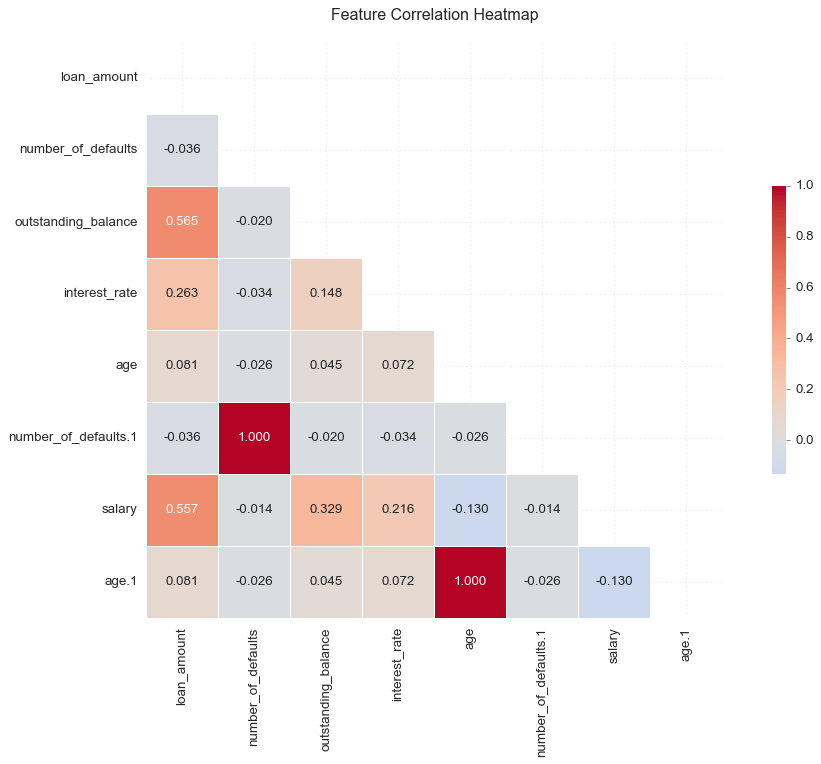

In [43]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
def create_correlation_heatmap(df):
        """Create correlation heatmap with enhanced styling"""
        plt.figure(figsize=(16, 9))
        
        # Calculate correlations
        corr_matrix = df[numerical_columns].corr()
        
        # Create mask for upper triangle
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        
        # Create heatmap
        sns.heatmap(corr_matrix, 
                   mask=mask,
                   annot=True, 
                   fmt='.3f',
                   cmap='coolwarm',
                   center=0,
                   square=True,
                   linewidths=0.5,
                   cbar_kws={"shrink": .5})
        
        plt.title('Feature Correlation Heatmap', pad=20)
        return plt.gcf()
create_correlation_heatmap(df)
plt.savefig('corr.png', dpi=300, bbox_inches='tight')
plt.show()

### Checking value counts on categorical feature to identify errors

In [44]:
df['currency'].value_counts()

currency
USD     90019
$USD       19
Name: count, dtype: int64

In [45]:
df['currency'] = df['currency'].replace('$USD', 'USD')


- The above code corrects the error on $USD to USD this is kind of errors which occur during data entry

In [46]:
# Dropping variables
cols_to_drop = ['age.1','number_of_defaults.1','disbursemet_date','currency','job','country','is_employed','sex','location']
df= df.drop(columns=cols_to_drop)

- The above code drop unnessesary columns which add value to our model development process

# Label Encoding and Standardization

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original dataframe to avoid modifying it directly
df1 = df.copy()

# List of columns to encode
columns_to_encode = ['gender', 'Loan Status', 'marital_status','Salary_Category','province']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])


- This code convert categorical data (like "gender", "marital_status") into numerical format using a technique called Label Encoding.

- This process prepare the data for modelling

In [48]:
from sklearn.preprocessing import StandardScaler

# Assuming df2 is your DataFrame after label encoding and one-hot encoding
scaler = StandardScaler()

# List of numerical columns to scale
numerical_columns = ['loan_amount', 'outstanding_balance', 'salary']

# Fit the scaler to the numerical data and transform it
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Save the fitted scaler to a file
dump(scaler, 'scaler.joblib')

['scaler.joblib']

- Standardizing numerical data within the DataFrame this transform numerical features so that they have zero mean and unit variance

In [49]:
corr = df.corr()['Loan Status'].sort_values(ascending=False)
corr

Loan Status            1.000000
loan_amount            0.228726
interest_rate          0.223250
age                    0.176748
salary                 0.121486
outstanding_balance    0.117731
marital_status         0.055229
remaining term        -0.004271
Salary_Category       -0.005552
gender                -0.038990
province              -0.122686
number_of_defaults    -0.151643
Name: Loan Status, dtype: float64

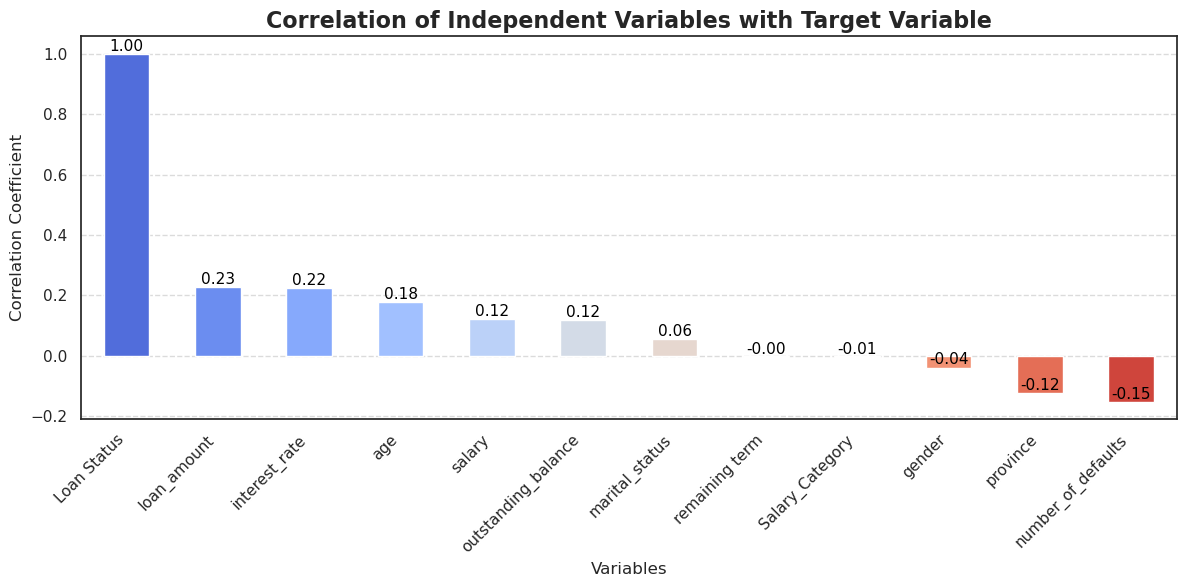

In [50]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

# Use Seaborn's color palette for a more visually appealing plot
colors = sns.color_palette("coolwarm", len(corr))
# 'coolwarm' creates a diverging color palette for positive and negative correlations

ax = corr.plot(kind='bar', color=colors)  # Apply the color palette

plt.title('Correlation of Independent Variables with Target Variable', fontsize=16, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)

# Add value labels to the bars for better understanding
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.01,
            f'{p.get_height():.2f}', ha='center', color='black')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines
plt.show()

- The loan_amount" (0.23) and interest_rate (0.22), display moderate positive correlations, suggesting that higher loan amounts and interest rates are associated with a higher likelihood of a positive loan status.

- Conversely, variables like number_of_defaults (-0.15) and gender (-0.04) exhibit weak or negative correlations, indicating that an increase in defaults correlates with a decrease in positive loan status, while gender shows almost no correlation.

- The chart effectively highlights the relationships between these independent variables and loan status.

The chart effectively illustrates the relationships between independent variables and the target variable. Loan Status has a perfect correlation, while Loan Amount and Interest Rate show moderate positive correlations. Most other variables, such as Age, Salary, and Marital Status, exhibit weak or negligible correlations, with Number of Defaults showing a slight negative correlation. This information is crucial for understanding which variables have the most significant implications for the target outcome and can guide further analysis or feature selection in modeling

## Model Application

In [51]:
#Assiging varibles X and Y
X = df.drop(columns=['Loan Status'])
y = df['Loan Status']

In [52]:
#Splitting data into trainset and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=48, stratify=y)

- Splitting dataset into training and testing subsets and feature set X and the target variable y as inputs

- Allocating 80% of the data for training and 20% for testing

- The random_state set to 48; this ensures that the split is reproducible, yielding the same results each time the code is run.

- Setting stratify=y which maintains the same proportion of classes in both the training and test sets.

In [53]:
X_train = X_train.values 
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90038 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90038 non-null  int32  
 1   loan_amount          90038 non-null  float64
 2   number_of_defaults   90038 non-null  int64  
 3   outstanding_balance  90038 non-null  float64
 4   interest_rate        90038 non-null  float64
 5   age                  90038 non-null  int64  
 6   remaining term       90038 non-null  int32  
 7   salary               90038 non-null  float64
 8   marital_status       90038 non-null  int32  
 9   Loan Status          90038 non-null  int32  
 10  province             90038 non-null  int32  
 11  Salary_Category      90038 non-null  int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 6.9 MB


In [58]:
df['Loan Status'].value_counts()

Loan Status
1    77038
0    13000
Name: count, dtype: int64

In [79]:

df = df.sample(frac=1)


# amount of fraud classes 492 rows.
class1 = df.loc[df['Loan Status'] == 1][:500]
class0 = df.loc[df['Loan Status'] == 0][:500]

normal_distributed_df = pd.concat([class0, class1])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

gender  loan_amount  number_of_defaults  outstanding_balance  \
70411       1     0.831637                   2             0.712306   
56198       0     0.460624                   1            -1.288495   
26542       1    -0.156885                   0            -1.160824   
95209       2    -0.156885                   0            -0.321685   
63931       0    -0.227111                   2            -0.578878   

       interest_rate  age  remaining term    salary  marital_status  \
70411           0.22   39              52  0.955307               0   
56198           0.18   42              55  0.885500               2   
26542           0.23   45              51 -0.106611               1   
95209           0.23   39              60  0.534436               0   
63931           0.20   44              30 -1.713275               1   

       Loan Status  province  Salary_Category  
70411            1         8                1  
56198            1         0                1  
26542            1         8                1  
95209            1         8                1  
63931            0         8                0

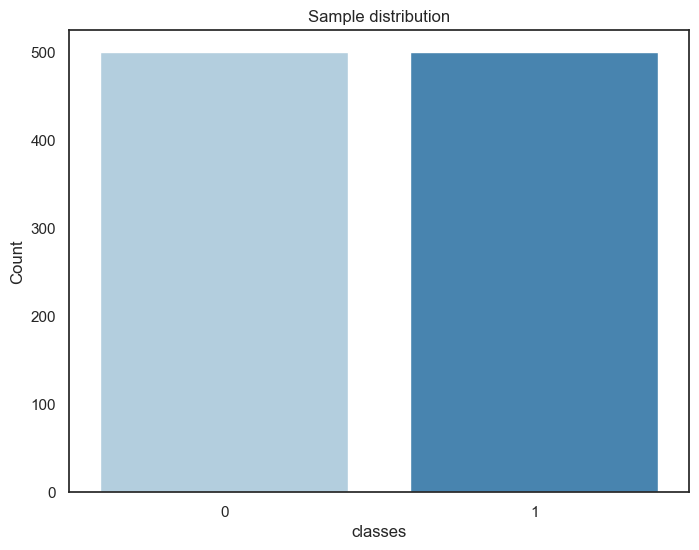

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan Status', data=new_df,palette='Blues')
plt.title('Sample distribution')
plt.xlabel('classes')
plt.ylabel('Count')
plt.show()

In [81]:
# New_df is from the random undersample data (fewer instances)

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

X1 = new_df.drop('Loan Status', axis=1)
y1 = new_df['Loan Status']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X1.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X1.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X1.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 9.3 s
PCA took 0.0 s
Truncated SVD took 0.011 s


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Analysing Class overlap in data using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='0')
red_patch = mpatches.Patch(color='#AF0000', label='1')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='0', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='1', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='0', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='1', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='0', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='1', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

- The above graphs show the distribution of the samples before and after handling class imbalance.

In [83]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score, 
    roc_auc_score, confusion_matrix
)
from collections import Counter


# Define classifiers
classifiers = [
    RandomForestClassifier(random_state=42, n_jobs=-1),
    BalancedRandomForestClassifier(random_state=42, n_jobs=-1),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
    EasyEnsembleClassifier(random_state=42)
]

# Define resampling techniques
resampling_techniques = {
    'None': None,
    'Random Oversampling': RandomOverSampler(random_state=42),
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'Borderline-SMOTE': BorderlineSMOTE(random_state=42, kind='borderline-1'),
    'ADASYN': ADASYN(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42),
}

# Initialize performance matrix and confusion matrix list
matrix = pd.DataFrame()
confusion_matrices = []

# Dictionary to store results for each classifier and sampling technique
results_dict = {}

# Loop through classifiers and evaluate each with each resampling technique
for classifier in classifiers:
    classifier_name = type(classifier).__name__

    for sampling_name, sampler in resampling_techniques.items():
        print(f"\nTraining {classifier_name} with {sampling_name}...")  # Display training progress
        
        start_time = time.time()

        # Apply resampling if sampler is not None
        if sampler is not None:
            resample_start_time = time.time()
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
            resample_time = time.time() - resample_start_time
        else:
            X_resampled, y_resampled = X_train, y_train
            resample_time = 0.0

        train_start_time = time.time()
        classifier.fit(X_resampled, y_resampled)
        train_time = time.time() - train_start_time
        total_time = time.time() - start_time

        y_pred = classifier.predict(X_test)
        y_pred_prob = classifier.predict_proba(X_test)[:, 1] if hasattr(classifier, "predict_proba") else np.zeros_like(y_pred)

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        cohen_kappa = cohen_kappa_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        geometric_mean = np.sqrt(precision * recall) if precision * recall > 0 else 0
        auc = roc_auc_score(y_test, y_pred_prob)
        youden_index = recall + precision - 1
        error_rate = 1 - accuracy 

        # Confusion matrix and derived metrics
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        # Store confusion matrix for later plotting
        confusion_matrices.append((cm, classifier_name, sampling_name))

        # Append results to the performance matrix
        new_row = {
            'Classifier': classifier_name,
            'Sampling': sampling_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Cohen Kappa': cohen_kappa,
            'MCC': mcc,
            'Balanced Accuracy': balanced_accuracy,
            'Geometric Mean': geometric_mean,
            'AUC': auc,
            'Youden Index': youden_index,
            'Misclassification Error': error_rate,
            'Resample Time (s)': resample_time,
            'Train Time (s)': train_time,
            'Total Time (s)': total_time,
            'TP': tp,
            'TN': tn,
            'FP': fp,
            'FN': fn,
            'Specificity': specificity
        }
        matrix = pd.concat([matrix, pd.DataFrame([new_row])], ignore_index=True)

            # Save classification report for this classifier
        report = classification_report(y_test, y_pred, output_dict=True)
        results_dict[(type(classifier).__name__, sampling_name)] = {
            'y_true': y_test,
            'y_pred': y_pred,
            'f1_0': report['0']['f1-score'],
            'f1_1': report['1']['f1-score'],
            'AUC': auc,
        }

# Display performance matrix
matrix


Training RandomForestClassifier with None...

Training RandomForestClassifier with Random Oversampling...

Training RandomForestClassifier with Random Undersampling...

Training RandomForestClassifier with SMOTE...

Training RandomForestClassifier with Borderline-SMOTE...

Training RandomForestClassifier with ADASYN...

Training RandomForestClassifier with SMOTETomek...

Training RandomForestClassifier with SMOTEENN...

Training BalancedRandomForestClassifier with None...

Training BalancedRandomForestClassifier with Random Oversampling...

Training BalancedRandomForestClassifier with Random Undersampling...

Training BalancedRandomForestClassifier with SMOTE...

Training BalancedRandomForestClassifier with Borderline-SMOTE...

Training BalancedRandomForestClassifier with ADASYN...

Training BalancedRandomForestClassifier with SMOTETomek...

Training BalancedRandomForestClassifier with SMOTEENN...

Training AdaBoostClassifier with None...

Training AdaBoostClassifier with Random Overs

Classifier              Sampling  Accuracy  Precision  \
0           RandomForestClassifier                  None  0.895269   0.900422   
1           RandomForestClassifier   Random Oversampling  0.895269   0.909080   
2           RandomForestClassifier  Random Undersampling  0.786984   0.943213   
3           RandomForestClassifier                 SMOTE  0.895195   0.906743   
4           RandomForestClassifier      Borderline-SMOTE  0.896490   0.907723   
5           RandomForestClassifier                ADASYN  0.894713   0.906857   
6           RandomForestClassifier            SMOTETomek  0.896379   0.907646   
7           RandomForestClassifier              SMOTEENN  0.862061   0.928325   
8   BalancedRandomForestClassifier                  None  0.794425   0.945005   
9   BalancedRandomForestClassifier   Random Oversampling  0.895528   0.909106   
10  BalancedRandomForestClassifier  Random Undersampling  0.787243   0.943959   
11  BalancedRandomForestClassifier                 SMOTE  0.896527   0.907824   
12  BalancedRandomForestClassifier      Borderline-SMOTE  0.895787   0.907783   
13  BalancedRandomForestClassifier                ADASYN  0.896083   0.908108   
14  BalancedRandomForestClassifier            SMOTETomek  0.896231   0.908090   
15  BalancedRandomForestClassifier              SMOTEENN  0.877499   0.921502   
16              AdaBoostClassifier                  None  0.879868   0.885602   
17              AdaBoostClassifier   Random Oversampling  0.750592   0.931216   
18              AdaBoostClassifier  Random Undersampling  0.747779   0.929350   
19              AdaBoostClassifier                 SMOTE  0.858507   0.905184   
20              AdaBoostClassifier      Borderline-SMOTE  0.835110   0.907665   
21              AdaBoostClassifier                ADASYN  0.845254   0.907280   
22              AdaBoostClassifier            SMOTETomek  0.858507   0.905184   
23              AdaBoostClassifier              SMOTEENN  0.785281   0.920684   
24                   XGBClassifier                  None  0.903080   0.910471   
25                   XGBClassifier   Random Oversampling  0.848142   0.940740   
26                   XGBClassifier  Random Undersampling  0.798497   0.944727   
27                   XGBClassifier                 SMOTE  0.901081   0.909554   
28                   XGBClassifier      Borderline-SMOTE  0.902488   0.911436   
29                   XGBClassifier                ADASYN  0.902266   0.911018   
30                   XGBClassifier            SMOTETomek  0.902858   0.910680   
31                   XGBClassifier              SMOTEENN  0.879720   0.930214   
32          EasyEnsembleClassifier                  None  0.757515   0.925627   
33          EasyEnsembleClassifier   Random Oversampling  0.763290   0.924444   
34          EasyEnsembleClassifier  Random Undersampling  0.752777   0.926016   
35          EasyEnsembleClassifier                 SMOTE  0.844143   0.910022   
36          EasyEnsembleClassifier      Borderline-SMOTE  0.844440   0.909662   
37          EasyEnsembleClassifier                ADASYN  0.855287   0.903306   
38          EasyEnsembleClassifier            SMOTETomek  0.842625   0.911220   
39          EasyEnsembleClassifier              SMOTEENN  0.819636   0.914923   

      Recall  F1-Score  Cohen Kappa       MCC  Balanced Accuracy  \
0   0.986717  0.941597     0.445124  0.494199           0.670025   
1   0.975121  0.940943     0.483727  0.508170           0.698586   
2   0.799152  0.865227     0.373510  0.404586           0.757012   
3   0.978107  0.941074     0.473801  0.503448           0.690976   
4   0.978496  0.941782     0.481471  0.510841           0.694504   
5   0.977328  0.940775     0.472987  0.501580           0.691228   
6   0.978453  0.941720     0.480847  0.510223           0.694226   
7   0.908965  0.918543     0.468977  0.470088           0.746534   
8   0.806681  0.870381     0.388433  0.418570           0.764238   
9   0.975424  0.941098

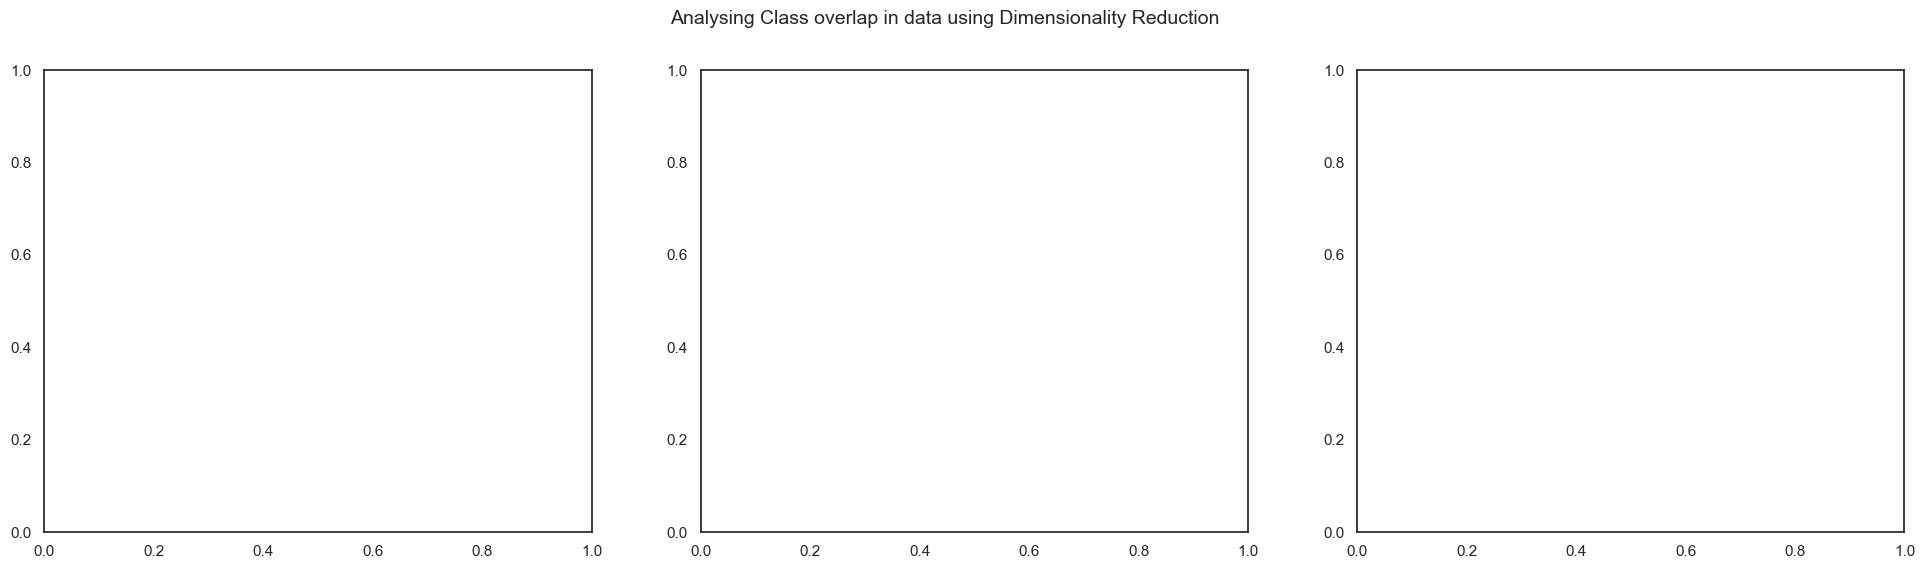

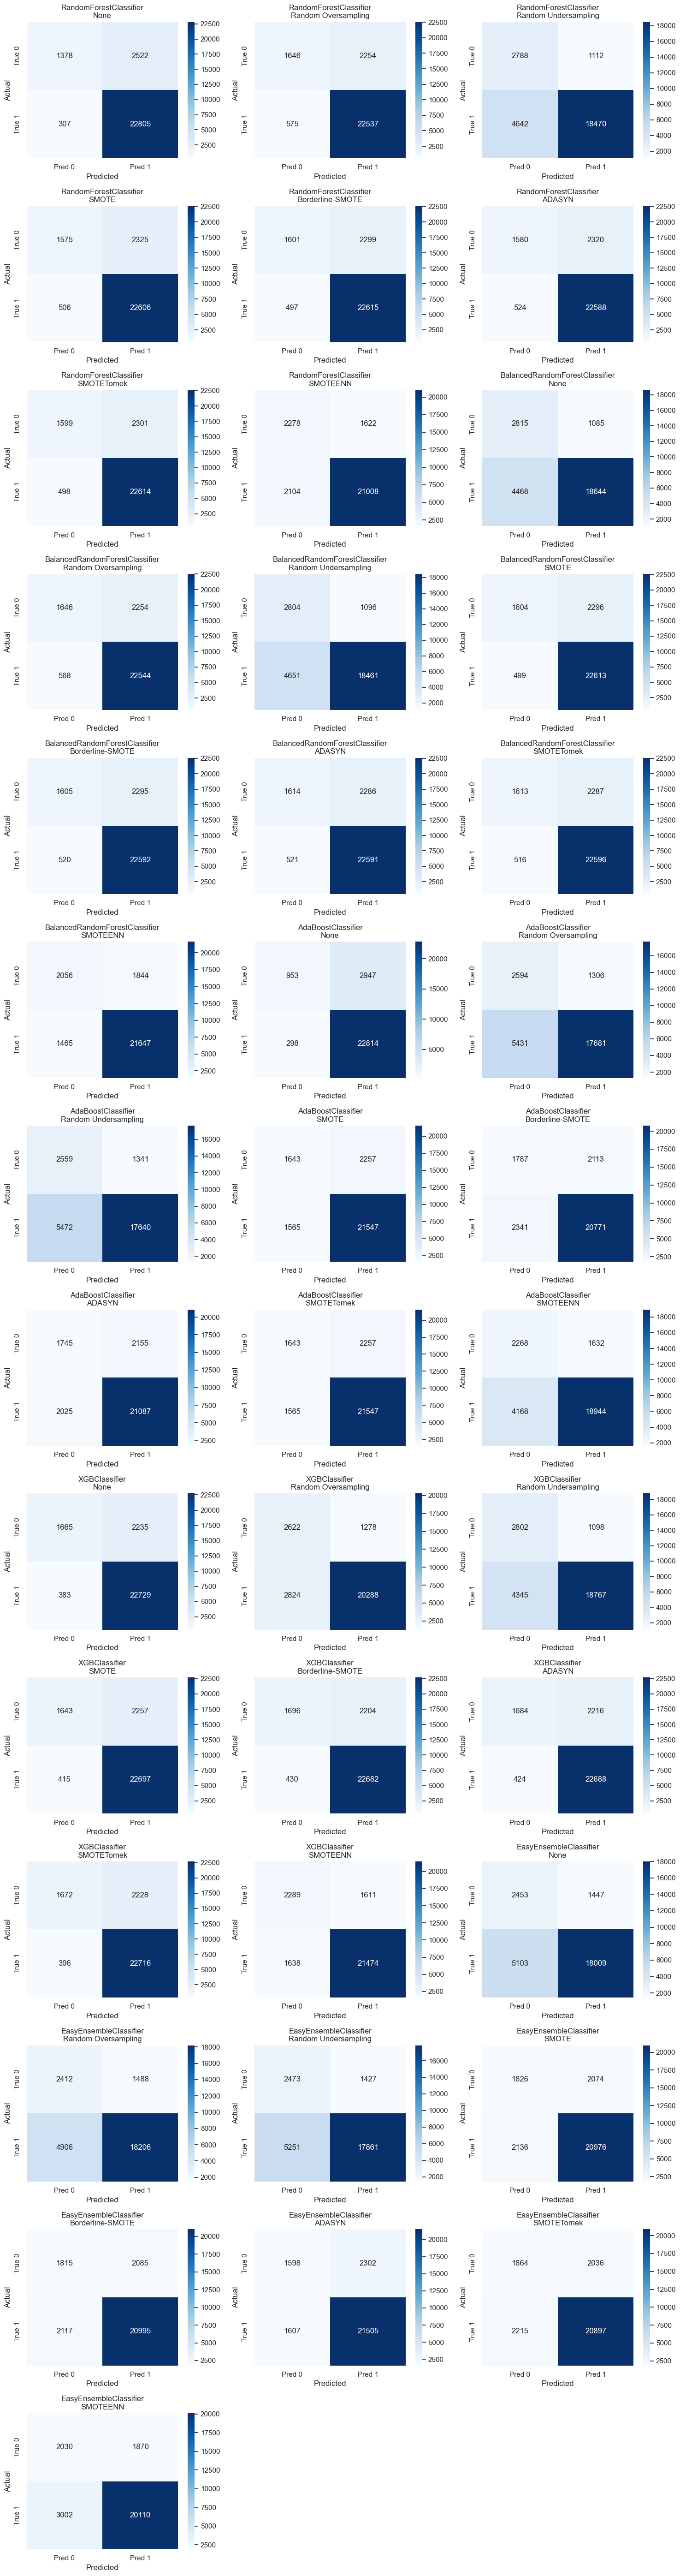

In [84]:
# -------------------------------
# Plot all confusion matrices as subplots
# -------------------------------
n_matrices = len(confusion_matrices)
cols = 3
rows = -(-n_matrices // cols)  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, (cm, clf_name, samp_name) in enumerate(confusion_matrices):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Pred 0", "Pred 1"],
                yticklabels=["True 0", "True 1"],
                ax=ax)
    ax.set_title(f"{clf_name}\n{samp_name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Remove any extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [88]:
import pandas as pd
from sklearn.metrics import classification_report

# Initialize an empty list to store results
results_list = []

# Loop through classifiers and sampling methods
for (classifier_name, sampling_name), data in results_dict.items():
    y_true = data['y_true']
    y_pred = data['y_pred']
    auc = data['AUC']

    # Generate classification report
    report = classification_report(y_true, y_pred, output_dict=True)

    # Append results to the list
    results_list.append({
        'Classifier': classifier_name,
        'Sampling Method': sampling_name,
        'F1 Score (Class 0)': report['0']['f1-score'],
        'F1 Score (Class 1)': report['1']['f1-score'],
        'AUC': auc
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)




# Display results
results_df


Classifier       Sampling Method  F1 Score (Class 0)  \
0           RandomForestClassifier                  None            0.493465   
1           RandomForestClassifier   Random Oversampling            0.537821   
2           RandomForestClassifier  Random Undersampling            0.492145   
3           RandomForestClassifier                 SMOTE            0.526668   
4           RandomForestClassifier      Borderline-SMOTE            0.533845   
5           RandomForestClassifier                ADASYN            0.526316   
6           RandomForestClassifier            SMOTETomek            0.533267   
7           RandomForestClassifier              SMOTEENN            0.550109   
8   BalancedRandomForestClassifier                  None            0.503443   
9   BalancedRandomForestClassifier   Random Oversampling            0.538436   
10  BalancedRandomForestClassifier  Random Undersampling            0.493879   
11  BalancedRandomForestClassifier                 SMOTE            0.534399   
12  BalancedRandomForestClassifier      Borderline-SMOTE            0.532780   
13  BalancedRandomForestClassifier                ADASYN            0.534880   
14  BalancedRandomForestClassifier            SMOTETomek            0.535080   
15  BalancedRandomForestClassifier              SMOTEENN            0.554103   
16              AdaBoostClassifier                  None            0.370025   
17              AdaBoostClassifier   Random Oversampling            0.435052   
18              AdaBoostClassifier  Random Undersampling            0.428967   
19              AdaBoostClassifier                 SMOTE            0.462296   
20              AdaBoostClassifier      Borderline-SMOTE            0.445192   
21              AdaBoostClassifier                ADASYN            0.455020   
22              AdaBoostClassifier            SMOTETomek            0.462296   
23              AdaBoostClassifier              SMOTEENN            0.438854   
24                   XGBClassifier                  None            0.559852   
25                   XGBClassifier   Random Oversampling            0.561096   
26                   XGBClassifier  Random Undersampling            0.507287   
27                   XGBClassifier                 SMOTE            0.551527   
28                   XGBClassifier      Borderline-SMOTE            0.562894   
29                   XGBClassifier                ADASYN            0.560586   
30                   XGBClassifier            SMOTETomek            0.560322   
31                   XGBClassifier              SMOTEENN            0.584898   
32          EasyEnsembleClassifier                  None            0.428247   
33          EasyEnsembleClassifier   Random Oversampling            0.430023   
34          EasyEnsembleClassifier  Random Undersampling            0.425499   
35          EasyEnsembleClassifier                 SMOTE            0.464513   
36          EasyEnsembleClassifier      Borderline-SMOTE            0.463483   
37          EasyEnsembleClassifier                ADASYN            0.449824   
38          EasyEnsembleClassifier            SMOTETomek            0.467226   
39          EasyEnsembleClassifier              SMOTEENN            0.454545   

    F1 Score (Class 1)       AUC  
0             0.941597  0.834896  
1             0.940943  0.831602  
2             0.865227  0.829734  
3             0.941074  0.832731  
4             0.941782  0.834056  
5             0.940775  0.833088  
6             0.941720  0.832773  
7             0.918543  0.831868  
8             0.870381  0.838126  
9             0.941098  0.831651  
10            0.865312  0.831982  
11            0.941796  0.835748  
12            0.941353  0.834715  
13            0.941507  0.832764  
14            0.941598  0.833679  
15            0.928996  0.833193  
16            0.933603  0.788192  
17            0.839972  0.788830  
18            0.838144  0.786553  
19            0.918535  0.761694  
20      

In [56]:
matrix.to_excel("model_performance_results.xlsx", index=False)
print("Performance matrix saved to 'model_performance_results.xlsx'")

Performance matrix saved to 'model_performance_results.xlsx'


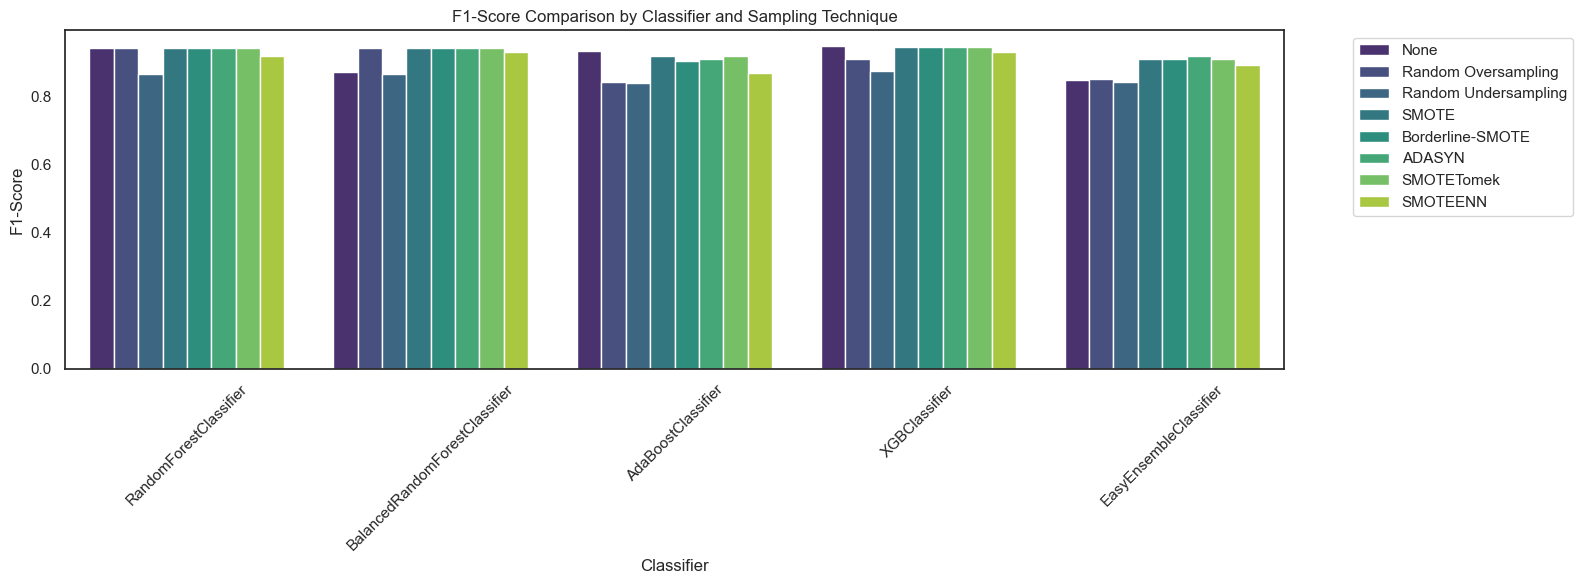

In [85]:
# -------------------------------
# 1. Barplot of all classifiers vs. F1-Score (grouped by sampler)
# -------------------------------
plt.figure(figsize=(16, 6))
sns.barplot(data=matrix, x="Classifier", y="F1-Score", hue="Sampling", palette="viridis")
plt.xticks(rotation=45)
plt.title("F1-Score Comparison by Classifier and Sampling Technique")
plt.ylabel("F1-Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()



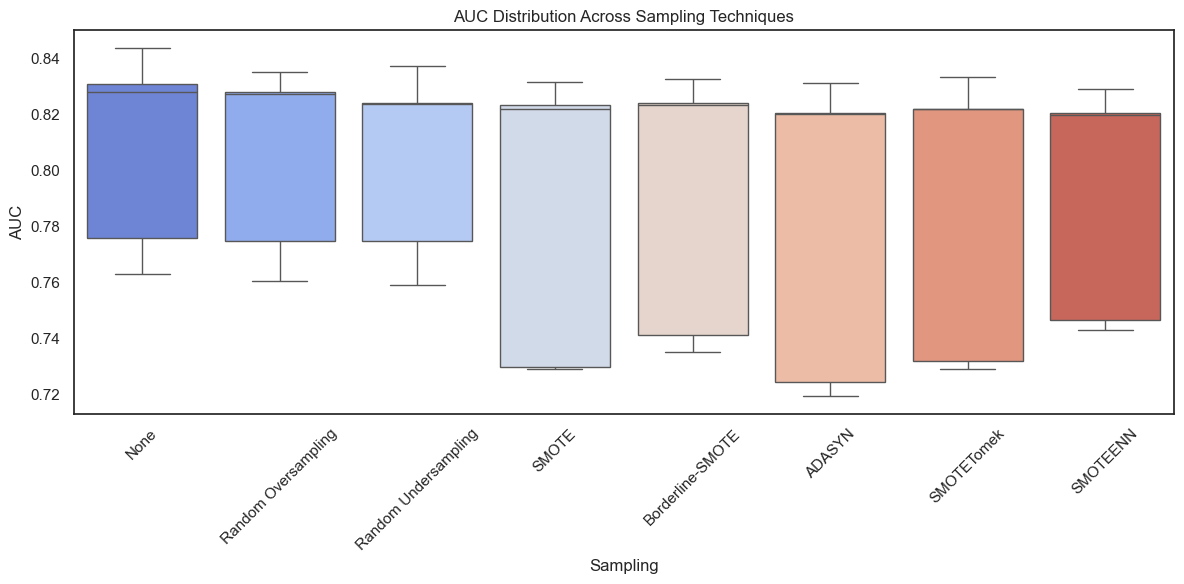

In [76]:
# -------------------------------
# 4. Boxplot: Distribution of AUC across sampling techniques
# -------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=matrix, x="Sampling", y="AUC", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("AUC Distribution Across Sampling Techniques")
plt.tight_layout()
plt.show()


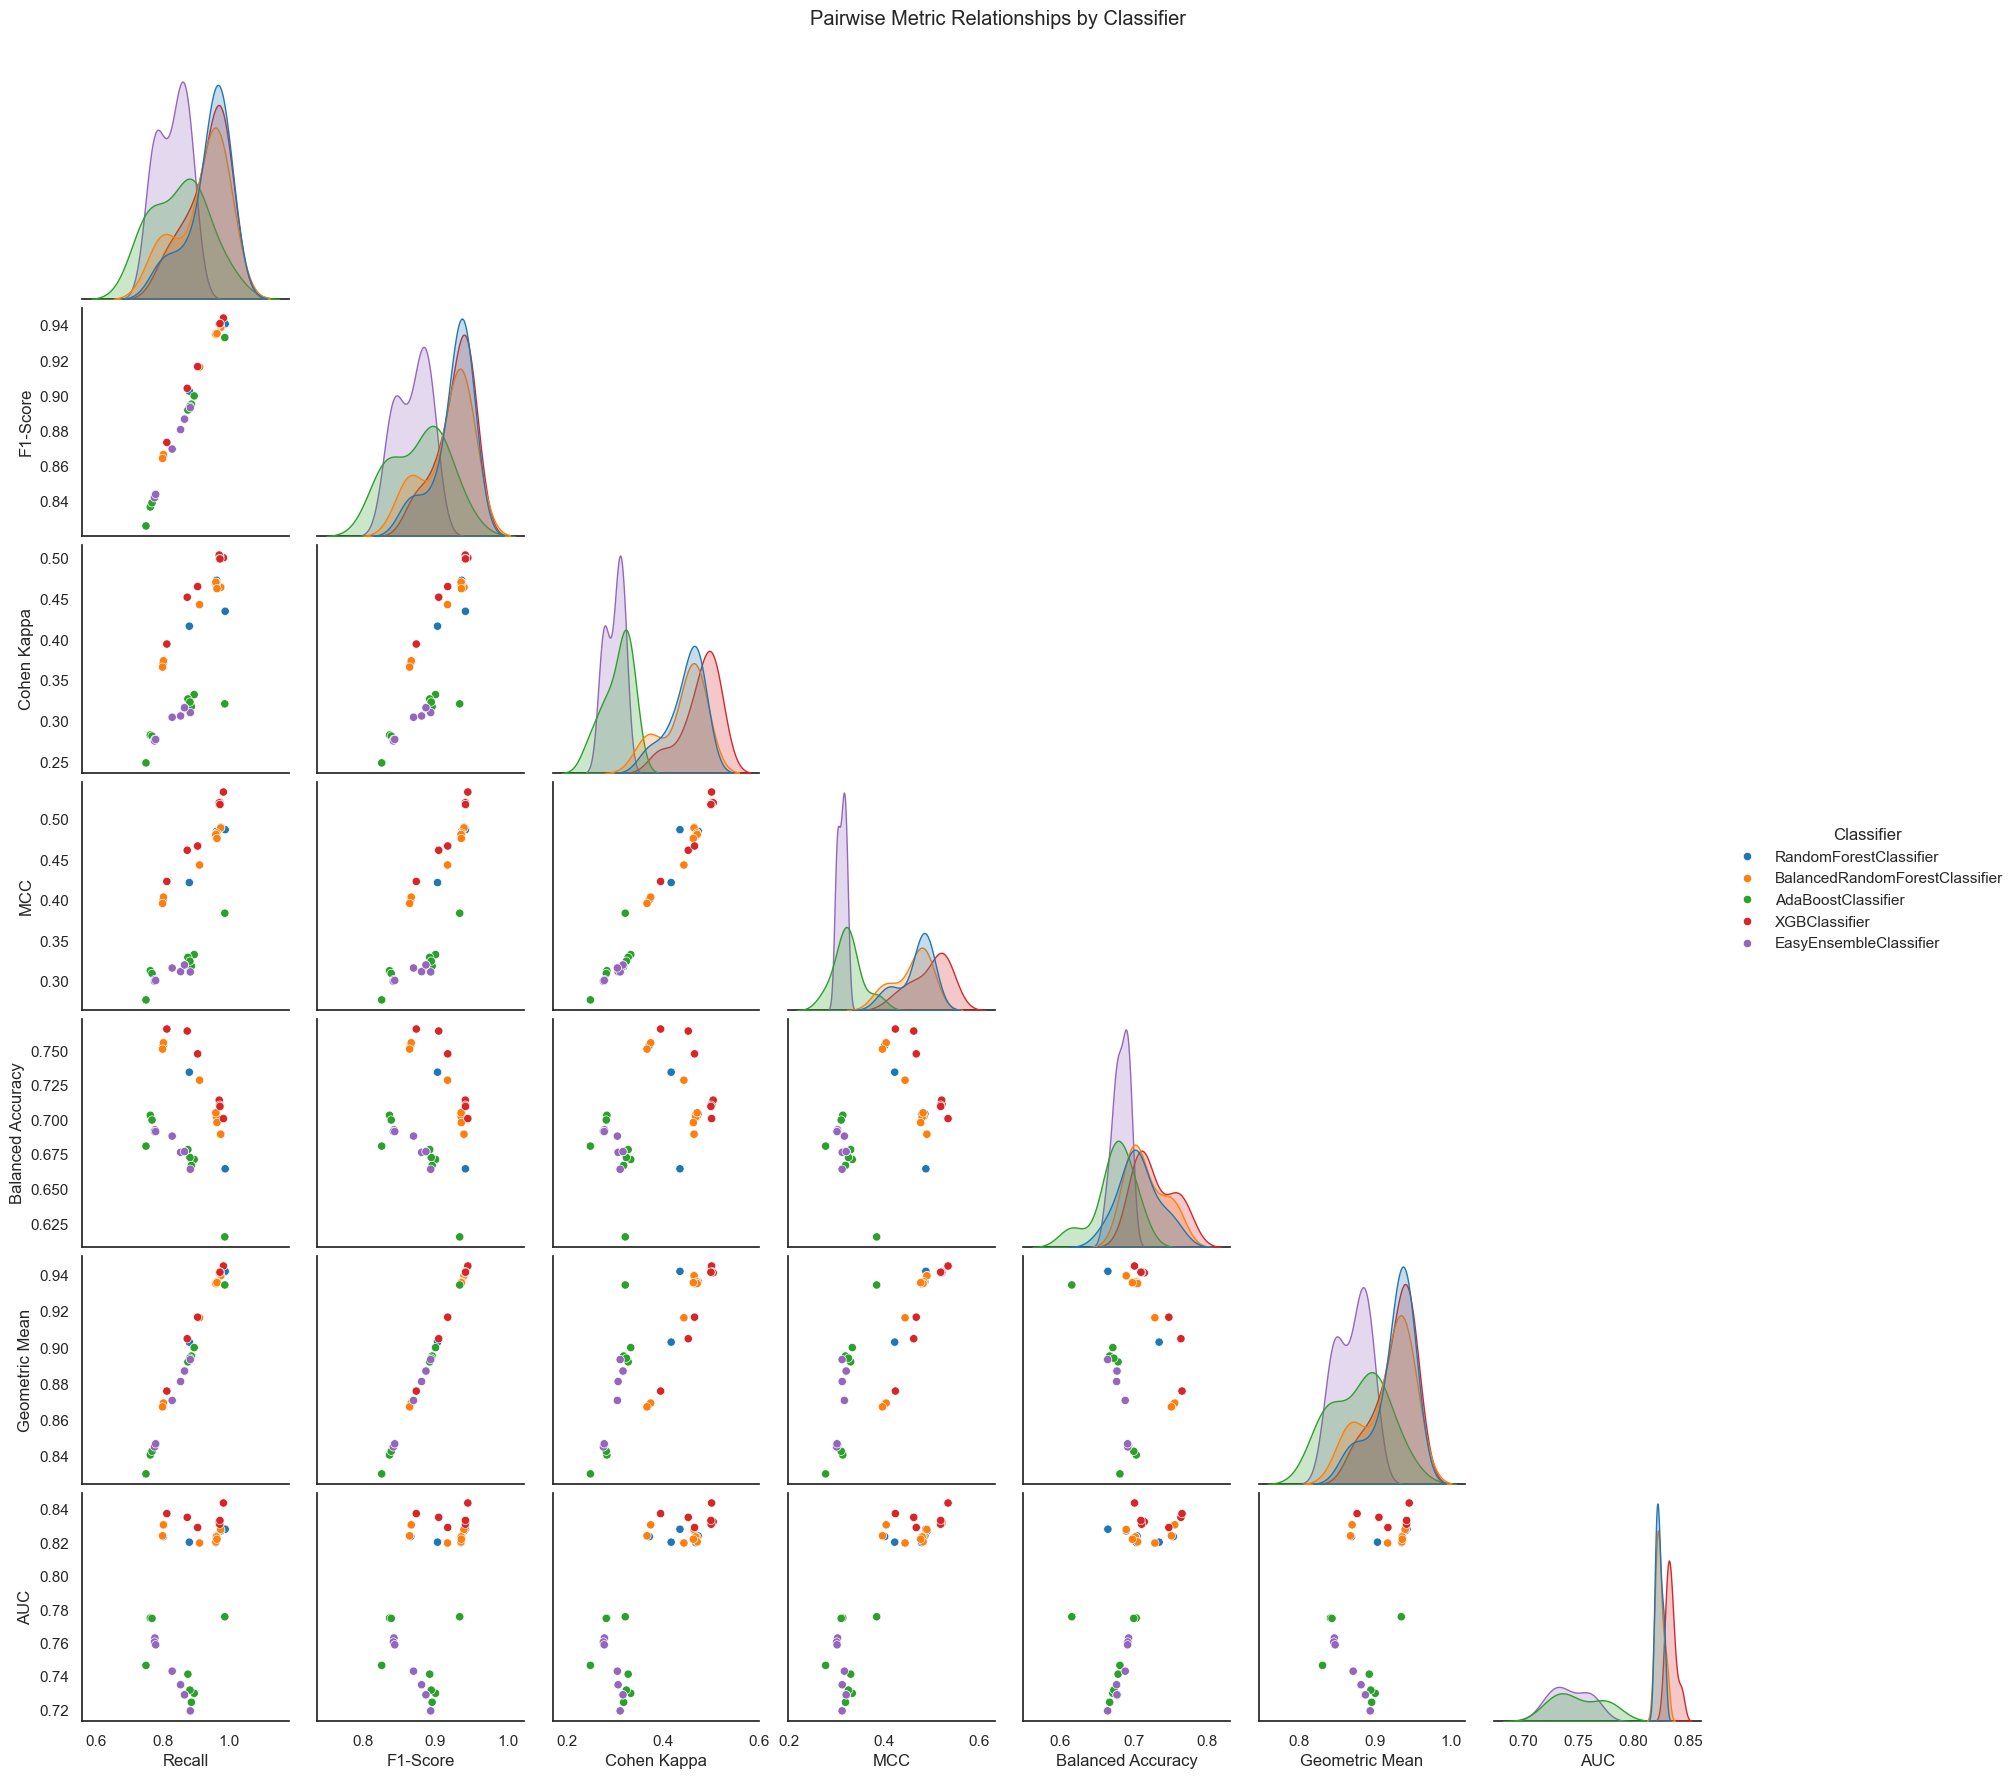

In [66]:
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Save performance matrix to Excel


# Convert metrics to numeric (if needed)
metrics = [
    'Recall', 'F1-Score', 'Cohen Kappa', 'MCC',
    'Balanced Accuracy', 'Geometric Mean', 'AUC' 
    ]
for metric in metrics:
    matrix[metric] = pd.to_numeric(matrix[metric], errors='coerce')


# -------------------------------
# 5. Pairplot: Explore relationships between metrics
# -------------------------------
sns.pairplot(matrix[metrics + ['Classifier']], hue='Classifier', palette="tab10", corner=True)
plt.suptitle("Pairwise Metric Relationships by Classifier", y=1.02)
plt.show()



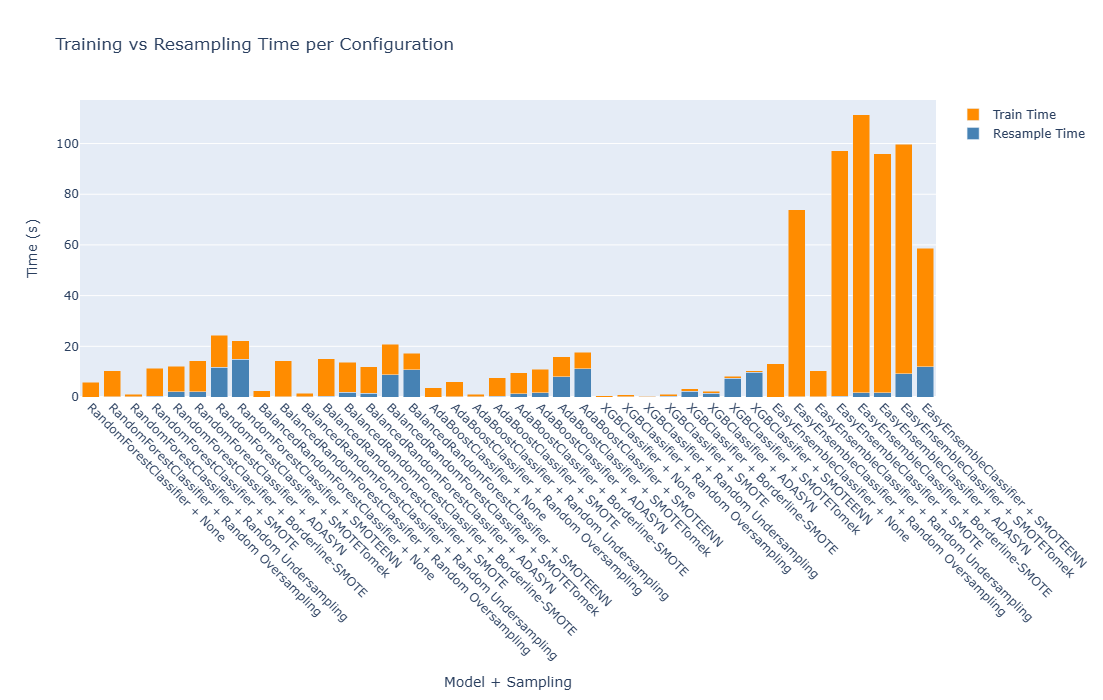

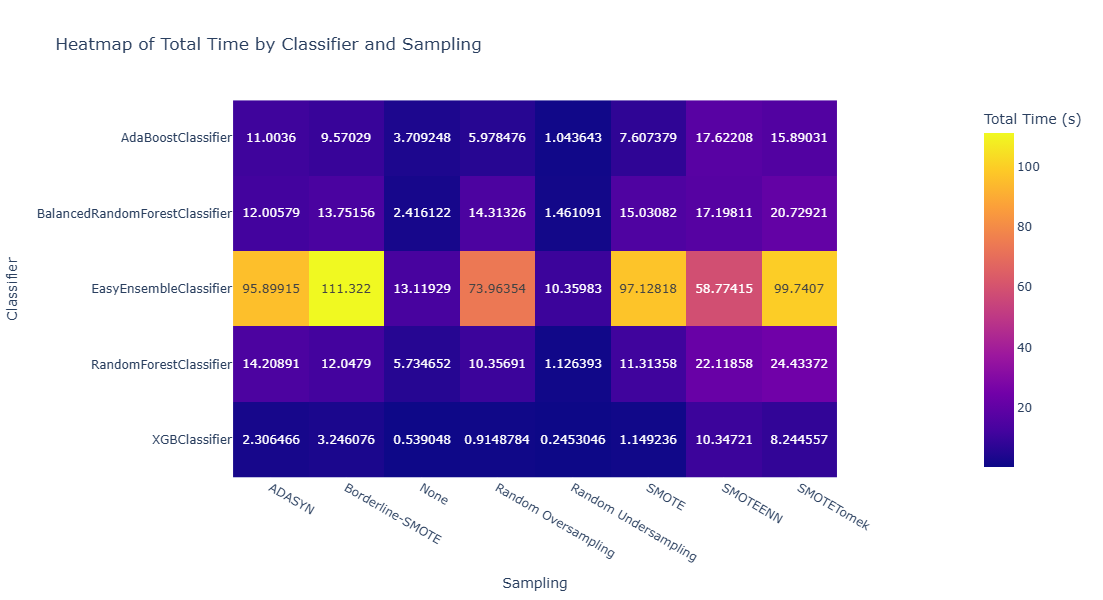

In [69]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Make sure time fields are numeric
for col in ['Resample Time (s)', 'Train Time (s)', 'Total Time (s)']:
    matrix[col] = pd.to_numeric(matrix[col], errors='coerce')

matrix['Model+Sampling'] = matrix['Classifier'] + " + " + matrix['Sampling']

# -----------------------------
# 2. Time Breakdown by Model and Sampling (Stacked Bar)
# -----------------------------
fig = go.Figure()
fig.add_trace(go.Bar(
    x=matrix['Model+Sampling'],
    y=matrix['Resample Time (s)'],
    name='Resample Time',
    marker_color='steelblue'
))
fig.add_trace(go.Bar(
    x=matrix['Model+Sampling'],
    y=matrix['Train Time (s)'],
    name='Train Time',
    marker_color='darkorange'
))
fig.update_layout(
    barmode='stack',
    title='Training vs Resampling Time per Configuration',
    xaxis_title='Model + Sampling',
    yaxis_title='Time (s)',
    xaxis_tickangle=45,
    height=700
)
fig.show()



# -----------------------------
# 6. Heatmap: Total Time (Classifier vs Sampler)
# -----------------------------
pivot_time = matrix.pivot_table(
    values='Total Time (s)', 
    index='Classifier', 
    columns='Sampling'
)

fig = px.imshow(
    pivot_time,
    labels=dict(x="Sampling", y="Classifier", color="Total Time (s)"),
    title="Heatmap of Total Time by Classifier and Sampling",
    text_auto=True
)
fig.update_layout(height=600)
fig.show()


# Optimising the hyperparamaters and Tuning

In [54]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score,
    roc_auc_score, confusion_matrix
)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import EasyEnsembleClassifier, BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

# ========== Classifiers with extended hyperparameters ==========
classifier_params = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'BalancedRandomForestClassifier': {
        'model': BalancedRandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'sampling_strategy': ['auto', 0.8]
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.05, 0.1, 1.0]
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 0.2],
            'scale_pos_weight': [1, 5, 10]
        }
    },
    'EasyEnsembleClassifier': {
        'model': EasyEnsembleClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 20, 50]
        }
    }
}

# ========== Resampling techniques with fine-tuned parameters ==========
resampling_techniques = {
    'None': None,
    'Random Oversampling': RandomOverSampler(random_state=42, sampling_strategy=0.8),
    'Random Undersampling': RandomUnderSampler(random_state=42, sampling_strategy=0.8),
    'SMOTE': SMOTE(random_state=42, k_neighbors=3, sampling_strategy=0.8),
    'Borderline-SMOTE': BorderlineSMOTE(random_state=42, k_neighbors=3, sampling_strategy=0.8),
    'ADASYN': ADASYN(random_state=42, n_neighbors=3, sampling_strategy=0.8),
    'SMOTETomek': SMOTETomek(random_state=42, sampling_strategy=0.8),
    'SMOTEENN': SMOTEENN(random_state=42, sampling_strategy=0.8)
}

# ========== Cross-validation setup ==========
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ========== Performance collection ==========
performance_matrix = pd.DataFrame()

# ========== Main evaluation loop ==========
for clf_name, clf_info in classifier_params.items():
    for sampling_name, sampler in resampling_techniques.items():
        print(f"\n🔍 Optimizing {clf_name} with {sampling_name}...")

        # Resampling
        start_sampling = time.time()
        if sampler:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        else:
            X_resampled, y_resampled = X_train, y_train
        end_sampling = time.time()
        sampling_time = end_sampling - start_sampling

        # Model selection via GridSearchCV
        best_model = GridSearchCV(clf_info['model'], clf_info['params'], cv=cv, scoring='f1', n_jobs=-1)

        start_train = time.time()
        best_model.fit(X_resampled, y_resampled)
        end_train = time.time()
        training_time = end_train - start_train

        best_clf = best_model.best_estimator_

        # Predict
        y_pred = best_clf.predict(X_test)
        y_pred_prob = best_clf.predict_proba(X_test)[:, 1] if hasattr(best_clf, "predict_proba") else np.zeros_like(y_pred)

        # Confusion Matrix and Additional Metrics
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        youden_index = recall_score(y_test, y_pred) + specificity - 1
        misclassification_error = 1 - accuracy_score(y_test, y_pred)
        g_mean = np.sqrt(recall_score(y_test, y_pred) * specificity)
        mcc = matthews_corrcoef(y_test, y_pred)
        #f2 = fbeta_score(y_test, y_pred, beta=2, zero_division=0)
       

        # Store all metrics
        metrics = {
            'Classifier': clf_name,
            'Sampling': sampling_name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred, zero_division=0),
            'F1-Score': f1_score(y_test, y_pred, zero_division=0),
            'MCC': mcc,
            'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
            'AUC': roc_auc_score(y_test, y_pred_prob),
            'Cohen Kappa': cohen_kappa_score(y_test, y_pred),
            'G-Mean': g_mean,
            'Youden Index': youden_index,
            'Misclassification Error': misclassification_error,
            'Training Time (s)': training_time,
            'Sampling Time (s)': sampling_time
        }

        
       

        # Append to performance matrix
        performance_matrix = pd.concat([performance_matrix, pd.DataFrame([metrics])], ignore_index=True)



🔍 Optimizing RandomForestClassifier with None...

🔍 Optimizing RandomForestClassifier with Random Oversampling...

🔍 Optimizing RandomForestClassifier with Random Undersampling...

🔍 Optimizing RandomForestClassifier with SMOTE...

🔍 Optimizing RandomForestClassifier with Borderline-SMOTE...

🔍 Optimizing RandomForestClassifier with ADASYN...

🔍 Optimizing RandomForestClassifier with SMOTETomek...

🔍 Optimizing RandomForestClassifier with SMOTEENN...

🔍 Optimizing BalancedRandomForestClassifier with None...

🔍 Optimizing BalancedRandomForestClassifier with Random Oversampling...

🔍 Optimizing BalancedRandomForestClassifier with Random Undersampling...

🔍 Optimizing BalancedRandomForestClassifier with SMOTE...

🔍 Optimizing BalancedRandomForestClassifier with Borderline-SMOTE...

🔍 Optimizing BalancedRandomForestClassifier with ADASYN...

🔍 Optimizing BalancedRandomForestClassifier with SMOTETomek...

🔍 Optimizing BalancedRandomForestClassifier with SMOTEENN...

🔍 Optimizing AdaBoostCl

In [55]:
performance_matrix

Classifier              Sampling  Accuracy  Precision  \
0           RandomForestClassifier                  None  0.894417   0.901793   
1           RandomForestClassifier   Random Oversampling  0.892862   0.905691   
2           RandomForestClassifier  Random Undersampling  0.830557   0.932838   
3           RandomForestClassifier                 SMOTE  0.894491   0.903561   
4           RandomForestClassifier      Borderline-SMOTE  0.894454   0.903589   
5           RandomForestClassifier                ADASYN  0.893973   0.902609   
6           RandomForestClassifier            SMOTETomek  0.894343   0.903578   
7           RandomForestClassifier              SMOTEENN  0.868207   0.921816   
8   BalancedRandomForestClassifier                  None  0.838442   0.926246   
9   BalancedRandomForestClassifier   Random Oversampling  0.893307   0.906551   
10  BalancedRandomForestClassifier  Random Undersampling  0.826670   0.933770   
11  BalancedRandomForestClassifier                 SMOTE  0.894528   0.903597   
12  BalancedRandomForestClassifier      Borderline-SMOTE  0.893973   0.903733   
13  BalancedRandomForestClassifier                ADASYN  0.893936   0.903825   
14  BalancedRandomForestClassifier            SMOTETomek  0.894602   0.904184   
15  BalancedRandomForestClassifier              SMOTEENN  0.870576   0.920043   
16              AdaBoostClassifier                  None  0.880979   0.887720   
17              AdaBoostClassifier   Random Oversampling  0.792463   0.923259   
18              AdaBoostClassifier  Random Undersampling  0.804013   0.917362   
19              AdaBoostClassifier                 SMOTE  0.875574   0.896750   
20              AdaBoostClassifier      Borderline-SMOTE  0.875870   0.895671   
21              AdaBoostClassifier                ADASYN  0.876536   0.895145   
22              AdaBoostClassifier            SMOTETomek  0.878239   0.896001   
23              AdaBoostClassifier              SMOTEENN  0.844440   0.910053   
24                   XGBClassifier                  None  0.902858   0.910515   
25                   XGBClassifier   Random Oversampling  0.888827   0.922476   
26                   XGBClassifier  Random Undersampling  0.841441   0.939581   
27                   XGBClassifier                 SMOTE  0.901932   0.912777   
28                   XGBClassifier      Borderline-SMOTE  0.900896   0.911946   
29                   XGBClassifier                ADASYN  0.900267   0.911919   
30                   XGBClassifier            SMOTETomek  0.902044   0.910206   
31                   XGBClassifier              SMOTEENN  0.874167   0.925271   
32          EasyEnsembleClassifier                  None  0.752517   0.921789   
33          EasyEnsembleClassifier   Random Oversampling  0.756293   0.921164   
34          EasyEnsembleClassifier  Random Undersampling  0.751444   0.921282   
35          EasyEnsembleClassifier                 SMOTE  0.834148   0.908274   
36          EasyEnsembleClassifier      Borderline-SMOTE  0.825115   0.910044   
37          EasyEnsembleClassifier                ADASYN  0.830150   0.909135   
38          EasyEnsembleClassifier            SMOTETomek  0.840552   0.907971   
39          EasyEnsembleClassifier              SMOTEENN  0.811861   0.912510   

      Recall  F1-Score       MCC  Balanced Accuracy       AUC  Cohen Kappa  \
0   0.983731  0.940982  0.491657           0.674430  0.832452     0.449445   
1   0.976462  0.939746  0.491428           0.686949  0.831274     0.463014   
2   0.864183  0.897199  0.429549           0.747733  0.828263     0.419432   
3   0.981438  0.940891  0.494765           0.680334  0.831758     0.457870   
4   0.981352  0.940867  0.494639           0.680419  0.832232     0.457900   
5   0.982044  0.940652  0.490773           0.677048  0.831866     0.452094   
6   0.981222  0.940801  0.494103           0.680355  0.832255     0.457550   
7   0.924368  0.923090  0.462932           0.729876  0.828388     0.462910   


In [56]:
#Setting the float to 4 decimal places

performance_matrix.to_excel('Results Optimised for LDD.xlsx', index=False)
performance_matrix

Classifier              Sampling  Accuracy  Precision  \
0           RandomForestClassifier                  None  0.894417   0.901793   
1           RandomForestClassifier   Random Oversampling  0.892862   0.905691   
2           RandomForestClassifier  Random Undersampling  0.830557   0.932838   
3           RandomForestClassifier                 SMOTE  0.894491   0.903561   
4           RandomForestClassifier      Borderline-SMOTE  0.894454   0.903589   
5           RandomForestClassifier                ADASYN  0.893973   0.902609   
6           RandomForestClassifier            SMOTETomek  0.894343   0.903578   
7           RandomForestClassifier              SMOTEENN  0.868207   0.921816   
8   BalancedRandomForestClassifier                  None  0.838442   0.926246   
9   BalancedRandomForestClassifier   Random Oversampling  0.893307   0.906551   
10  BalancedRandomForestClassifier  Random Undersampling  0.826670   0.933770   
11  BalancedRandomForestClassifier                 SMOTE  0.894528   0.903597   
12  BalancedRandomForestClassifier      Borderline-SMOTE  0.893973   0.903733   
13  BalancedRandomForestClassifier                ADASYN  0.893936   0.903825   
14  BalancedRandomForestClassifier            SMOTETomek  0.894602   0.904184   
15  BalancedRandomForestClassifier              SMOTEENN  0.870576   0.920043   
16              AdaBoostClassifier                  None  0.880979   0.887720   
17              AdaBoostClassifier   Random Oversampling  0.792463   0.923259   
18              AdaBoostClassifier  Random Undersampling  0.804013   0.917362   
19              AdaBoostClassifier                 SMOTE  0.875574   0.896750   
20              AdaBoostClassifier      Borderline-SMOTE  0.875870   0.895671   
21              AdaBoostClassifier                ADASYN  0.876536   0.895145   
22              AdaBoostClassifier            SMOTETomek  0.878239   0.896001   
23              AdaBoostClassifier              SMOTEENN  0.844440   0.910053   
24                   XGBClassifier                  None  0.902858   0.910515   
25                   XGBClassifier   Random Oversampling  0.888827   0.922476   
26                   XGBClassifier  Random Undersampling  0.841441   0.939581   
27                   XGBClassifier                 SMOTE  0.901932   0.912777   
28                   XGBClassifier      Borderline-SMOTE  0.900896   0.911946   
29                   XGBClassifier                ADASYN  0.900267   0.911919   
30                   XGBClassifier            SMOTETomek  0.902044   0.910206   
31                   XGBClassifier              SMOTEENN  0.874167   0.925271   
32          EasyEnsembleClassifier                  None  0.752517   0.921789   
33          EasyEnsembleClassifier   Random Oversampling  0.756293   0.921164   
34          EasyEnsembleClassifier  Random Undersampling  0.751444   0.921282   
35          EasyEnsembleClassifier                 SMOTE  0.834148   0.908274   
36          EasyEnsembleClassifier      Borderline-SMOTE  0.825115   0.910044   
37          EasyEnsembleClassifier                ADASYN  0.830150   0.909135   
38          EasyEnsembleClassifier            SMOTETomek  0.840552   0.907971   
39          EasyEnsembleClassifier              SMOTEENN  0.811861   0.912510   

      Recall  F1-Score       MCC  Balanced Accuracy       AUC  Cohen Kappa  \
0   0.983731  0.940982  0.491657           0.674430  0.832452     0.449445   
1   0.976462  0.939746  0.491428           0.686949  0.831274     0.463014   
2   0.864183  0.897199  0.429549           0.747733  0.828263     0.419432   
3   0.981438  0.940891  0.494765           0.680334  0.831758     0.457870   
4   0.981352  0.940867  0.494639           0.680419  0.832232     0.457900   
5   0.982044  0.940652  0.490773           0.677048  0.831866     0.452094   
6   0.981222  0.940801  0.494103           0.680355  0.832255     0.457550   
7   0.924368  0.923090  0.462932           0.729876  0.828388     0.462910   


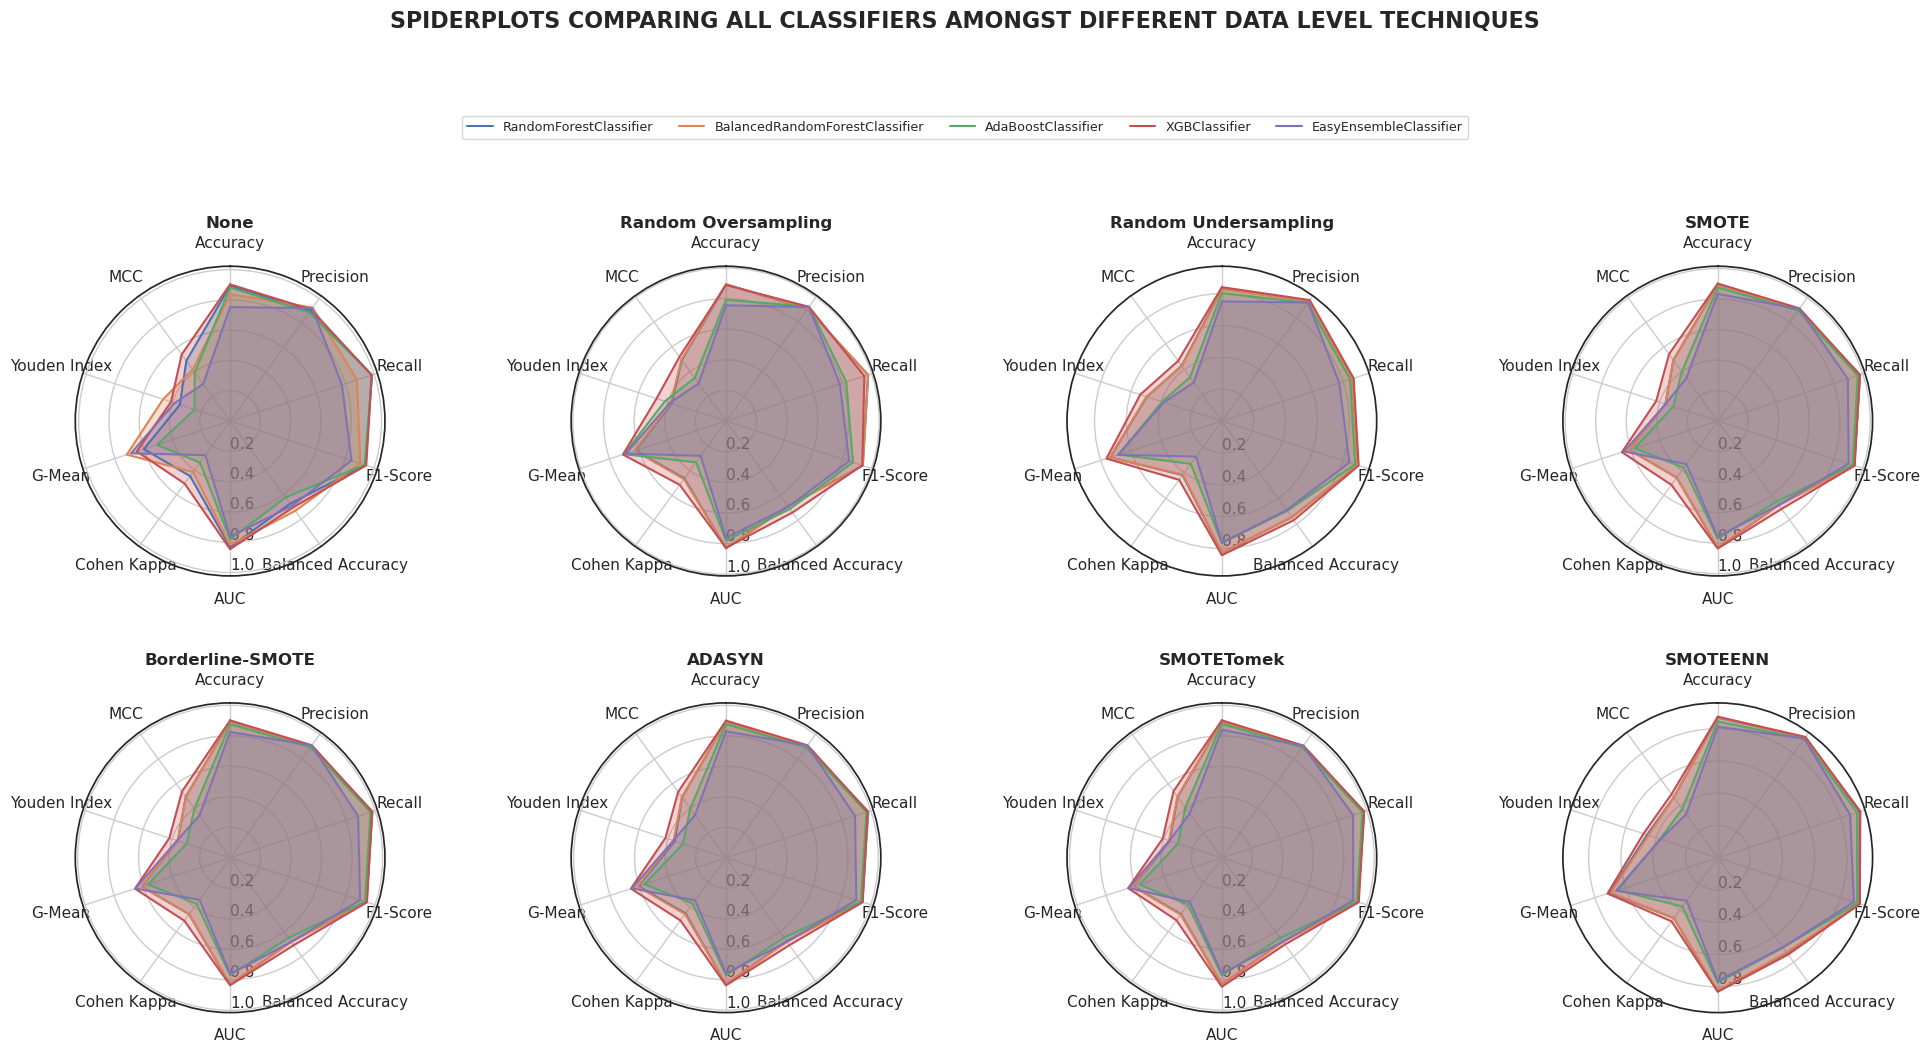

In [59]:
# Assuming performance_matrix is already defined
unique_sampling_names = performance_matrix['Sampling'].unique()
num_plots = len(unique_sampling_names)
plots_per_row = 4

# Calculate the number of rows needed
num_rows = (num_plots + plots_per_row - 1) // plots_per_row

# Create a figure with the required number of rows and 3 columns per row
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(5 * plots_per_row, 5 * num_rows), subplot_kw=dict(polar=True))
fig.subplots_adjust(wspace=0.5, hspace=0.8)  # Increase hspace to add more vertical space between rows

# Add main title in all caps
fig.suptitle('SPIDERPLOTS COMPARING ALL CLASSIFIERS AMONGST DIFFERENT DATA LEVEL TECHNIQUES', 
             fontsize=16, fontweight='bold', y=1.05)

# Flatten the axes array for easier indexing
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes] if plots_per_row == 1 else axes

# Collect all unique classifier names for the shared legend
all_classifiers = performance_matrix['Classifier'].unique()

# Loop through each sampling method and plot
for i, sampling_name in enumerate(unique_sampling_names):
    ax = axes[i]
    subset = performance_matrix[performance_matrix['Sampling'] == sampling_name]
    labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Balanced Accuracy', 
              'AUC', 'Cohen Kappa', 'G-Mean', 'Youden Index','MCC']
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]
    
    for clf_name in subset['Classifier'].unique():
        clf_data = subset[subset['Classifier'] == clf_name][labels].values.flatten().tolist()
        clf_data += clf_data[:1]
        ax.plot(angles, clf_data, label=clf_name)
        ax.fill(angles, clf_data, alpha=0.25)
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(f"{sampling_name}", fontweight='bold')  # Bold the title
    ax.set_rlabel_position(180)  # Move radial labels to avoid overlap with axis labels

# Create a shared legend outside the plots
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last plot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=len(all_classifiers), fontsize='small')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to make space for the legend and increase space between rows
plt.tight_layout(rect=[0, 0, 1, 0.9], h_pad=3.0)  # Increase h_pad to add more space between rows
plt.savefig('spiderplots_LDD.png', dpi=300, bbox_inches='tight')
plt.show()

In [60]:
import pandas as pd

# --- Identify Best & Worst Combinations ---
best_combination = performance_matrix.loc[performance_matrix.groupby("Sampling")["AUC"].idxmax()]
worst_combination = performance_matrix.loc[performance_matrix.groupby("Sampling")["AUC"].idxmin()]

# Add a column to distinguish best and worst
best_combination["Performance"] = "Best"
worst_combination["Performance"] = "Worst"

# Combine both into one DataFrame
performance_summary = pd.concat([best_combination, worst_combination])

# Reset index for clean display
performance_summary.reset_index(drop=True, inplace=True)

# Display final structured DataFrame
performance_summary[["Classifier", "Sampling", "AUC", "Performance"]]


Classifier              Sampling       AUC Performance
0            XGBClassifier                ADASYN  0.837762        Best
1            XGBClassifier      Borderline-SMOTE  0.836231        Best
2            XGBClassifier                  None  0.846407        Best
3   RandomForestClassifier   Random Oversampling  0.831274        Best
4            XGBClassifier  Random Undersampling  0.842833        Best
5            XGBClassifier                 SMOTE  0.835618        Best
6            XGBClassifier              SMOTEENN  0.830489        Best
7            XGBClassifier            SMOTETomek  0.847266        Best
8   EasyEnsembleClassifier                ADASYN  0.758616       Worst
9   EasyEnsembleClassifier      Borderline-SMOTE  0.762284       Worst
10  EasyEnsembleClassifier                  None  0.763152       Worst
11  EasyEnsembleClassifier   Random Oversampling  0.762769       Worst
12  EasyEnsembleClassifier  Random Undersampling  0.763216       Worst
13  EasyEnsembleClassifier                 SMOTE  0.758442       Worst
14  EasyEnsembleClassifier              SMOTEENN  0.764009       Worst
15  EasyEnsembleClassifier            SMOTETomek  0.759878       Worst

In [61]:
import pandas as pd

# --- Identify Best & Worst Combinations ---
best_combination = performance_matrix.loc[performance_matrix.groupby("Sampling")["MCC"].idxmax()]
worst_combination = performance_matrix.loc[performance_matrix.groupby("Sampling")["MCC"].idxmin()]

# Add a column to distinguish best and worst
best_combination["Performance"] = "Best"
worst_combination["Performance"] = "Worst"

# Combine both into one DataFrame
performance_summary = pd.concat([best_combination, worst_combination])

# Reset index for clean display
performance_summary.reset_index(drop=True, inplace=True)

# Display final structured DataFrame
performance_summary[["Classifier", "Sampling", "MCC", "Performance"]]


Classifier              Sampling       MCC Performance
0            XGBClassifier                ADASYN  0.534240        Best
1            XGBClassifier      Borderline-SMOTE  0.536997        Best
2            XGBClassifier                  None  0.543865        Best
3            XGBClassifier   Random Oversampling  0.517690        Best
4            XGBClassifier  Random Undersampling  0.467372        Best
5            XGBClassifier                 SMOTE  0.542779        Best
6            XGBClassifier              SMOTEENN  0.487168        Best
7            XGBClassifier            SMOTETomek  0.539666        Best
8   EasyEnsembleClassifier                ADASYN  0.346389       Worst
9   EasyEnsembleClassifier      Borderline-SMOTE  0.342237       Worst
10  EasyEnsembleClassifier                  None  0.302568       Worst
11  EasyEnsembleClassifier   Random Oversampling  0.303899       Worst
12  EasyEnsembleClassifier  Random Undersampling  0.299947       Worst
13  EasyEnsembleClassifier                 SMOTE  0.349434       Worst
14  EasyEnsembleClassifier              SMOTEENN  0.333174       Worst
15  EasyEnsembleClassifier            SMOTETomek  0.359100       Worst

In [62]:
import pandas as pd

# --- Identify Best & Worst Combinations ---
best_combination = performance_matrix.loc[performance_matrix.groupby("Sampling")["G-Mean"].idxmax()]
worst_combination = performance_matrix.loc[performance_matrix.groupby("Sampling")["G-Mean"].idxmin()]

# Add a column to distinguish best and worst
best_combination["Performance"] = "Best"
worst_combination["Performance"] = "Worst"

# Combine both into one DataFrame
performance_summary = pd.concat([best_combination, worst_combination])

# Reset index for clean display
performance_summary.reset_index(drop=True, inplace=True)

# Display final structured DataFrame
performance_summary[["Classifier", "Sampling", "G-Mean", "Performance"]]


Classifier              Sampling    G-Mean Performance
0                    XGBClassifier                ADASYN  0.656142        Best
1                    XGBClassifier      Borderline-SMOTE  0.656212        Best
2   BalancedRandomForestClassifier                  None  0.717499        Best
3                    XGBClassifier   Random Oversampling  0.707476        Best
4                    XGBClassifier  Random Undersampling  0.762751        Best
5                    XGBClassifier                 SMOTE  0.660493        Best
6                    XGBClassifier              SMOTEENN  0.718194        Best
7                    XGBClassifier            SMOTETomek  0.646656        Best
8               AdaBoostClassifier                ADASYN  0.563129       Worst
9               AdaBoostClassifier      Borderline-SMOTE  0.566837       Worst
10              AdaBoostClassifier                  None  0.507451       Worst
11          RandomForestClassifier   Random Oversampling  0.622962       Worst
12              AdaBoostClassifier  Random Undersampling  0.681205       Worst
13              AdaBoostClassifier                 SMOTE  0.573894       Worst
14              AdaBoostClassifier              SMOTEENN  0.651994       Worst
15              AdaBoostClassifier            SMOTETomek  0.568061       Worst

In [63]:
import pandas as pd

# --- Identify Best & Worst Combinations ---
best_combination = performance_matrix.loc[performance_matrix.groupby("Sampling")["F1-Score"].idxmax()]
worst_combination = performance_matrix.loc[performance_matrix.groupby("Sampling")["F1-Score"].idxmin()]

# Add a column to distinguish best and worst
best_combination["Performance"] = "Best"
worst_combination["Performance"] = "Worst"

# Combine both into one DataFrame
performance_summary = pd.concat([best_combination, worst_combination])

# Reset index for clean display
performance_summary.reset_index(drop=True, inplace=True)

# Display final structured DataFrame
performance_summary[["Classifier", "Sampling", "F1-Score", "Performance"]]


Classifier              Sampling  F1-Score Performance
0                    XGBClassifier                ADASYN  0.943753        Best
1                    XGBClassifier      Borderline-SMOTE  0.944130        Best
2                    XGBClassifier                  None  0.945408        Best
3   BalancedRandomForestClassifier   Random Oversampling  0.939948        Best
4                    XGBClassifier  Random Undersampling  0.903815        Best
5                    XGBClassifier                 SMOTE  0.944696        Best
6                    XGBClassifier              SMOTEENN  0.926570        Best
7                    XGBClassifier            SMOTETomek  0.944942        Best
8           EasyEnsembleClassifier                ADASYN  0.899716       Worst
9           EasyEnsembleClassifier      Borderline-SMOTE  0.896253       Worst
10          EasyEnsembleClassifier                  None  0.843020       Worst
11          EasyEnsembleClassifier   Random Oversampling  0.845958       Worst
12          EasyEnsembleClassifier  Random Undersampling  0.842298       Worst
13          EasyEnsembleClassifier                 SMOTE  0.902460       Worst
14          EasyEnsembleClassifier              SMOTEENN  0.886981       Worst
15          EasyEnsembleClassifier            SMOTETomek  0.906692       Worst

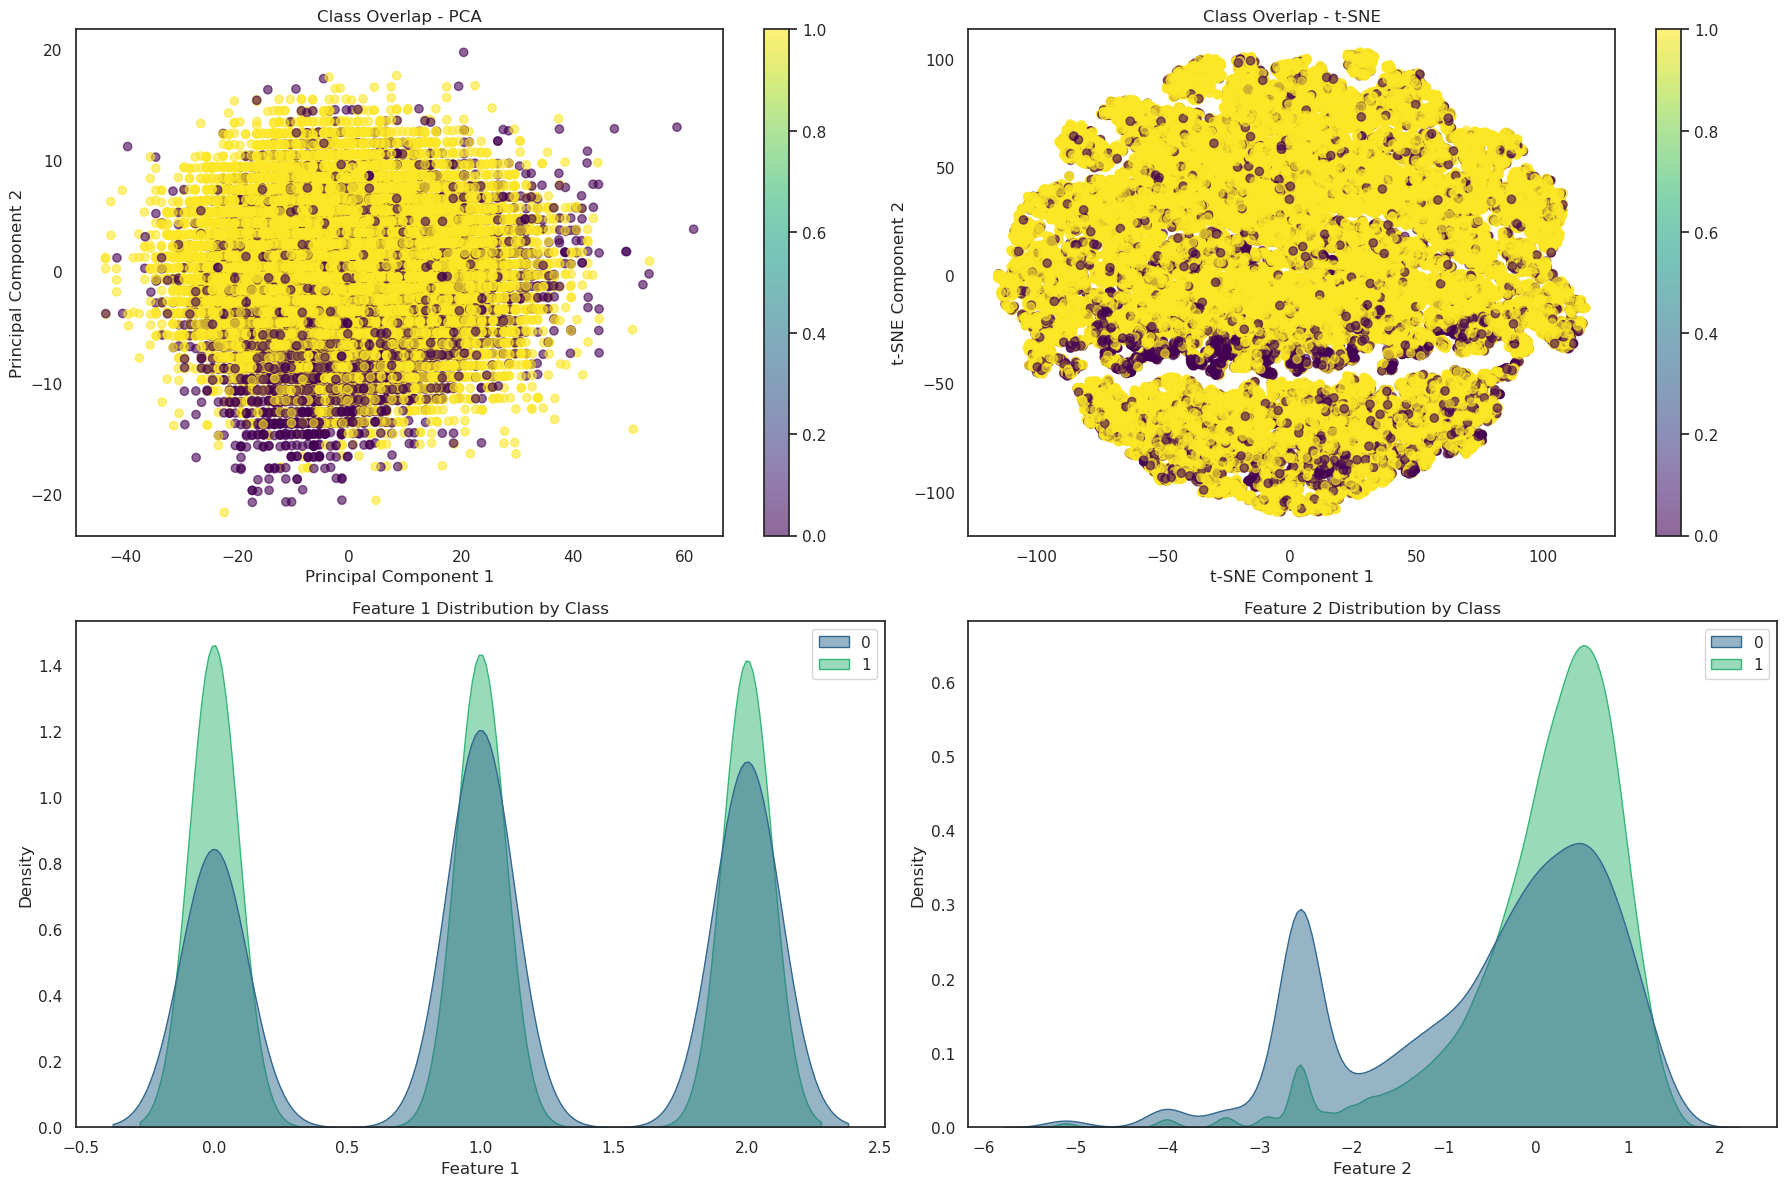

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def visualize_class_overlap(X_train, y_train):
    """Visualize class overlap using different techniques"""
    plt.figure(figsize=(18, 12))
    
    # 1. PCA for dimensionality reduction
    plt.subplot(2, 2, 1)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train)
    
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.6, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Class Overlap - PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    # 2. t-SNE for better cluster visualization
    plt.subplot(2, 2, 2)
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_train)
    
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, alpha=0.6, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('Class Overlap - t-SNE')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    
    # 3. Feature distributions by class (select first two features)
    plt.subplot(2, 2, 3)
    sns.kdeplot(x=X_train[:, 0], hue=y_train, palette="viridis", common_norm=False, fill=True, alpha=0.5)
    plt.title('Feature 1 Distribution by Class')
    plt.xlabel('Feature 1')
    plt.ylabel('Density')
    
    plt.subplot(2, 2, 4)
    sns.kdeplot(x=X_train[:, 1], hue=y_train, palette="viridis", common_norm=False, fill=True, alpha=0.5)
    plt.title('Feature 2 Distribution by Class')
    plt.xlabel('Feature 2')
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.savefig('class_overlap_LDD.png', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage (uncomment when needed):
visualize_class_overlap(X_train, y_train)

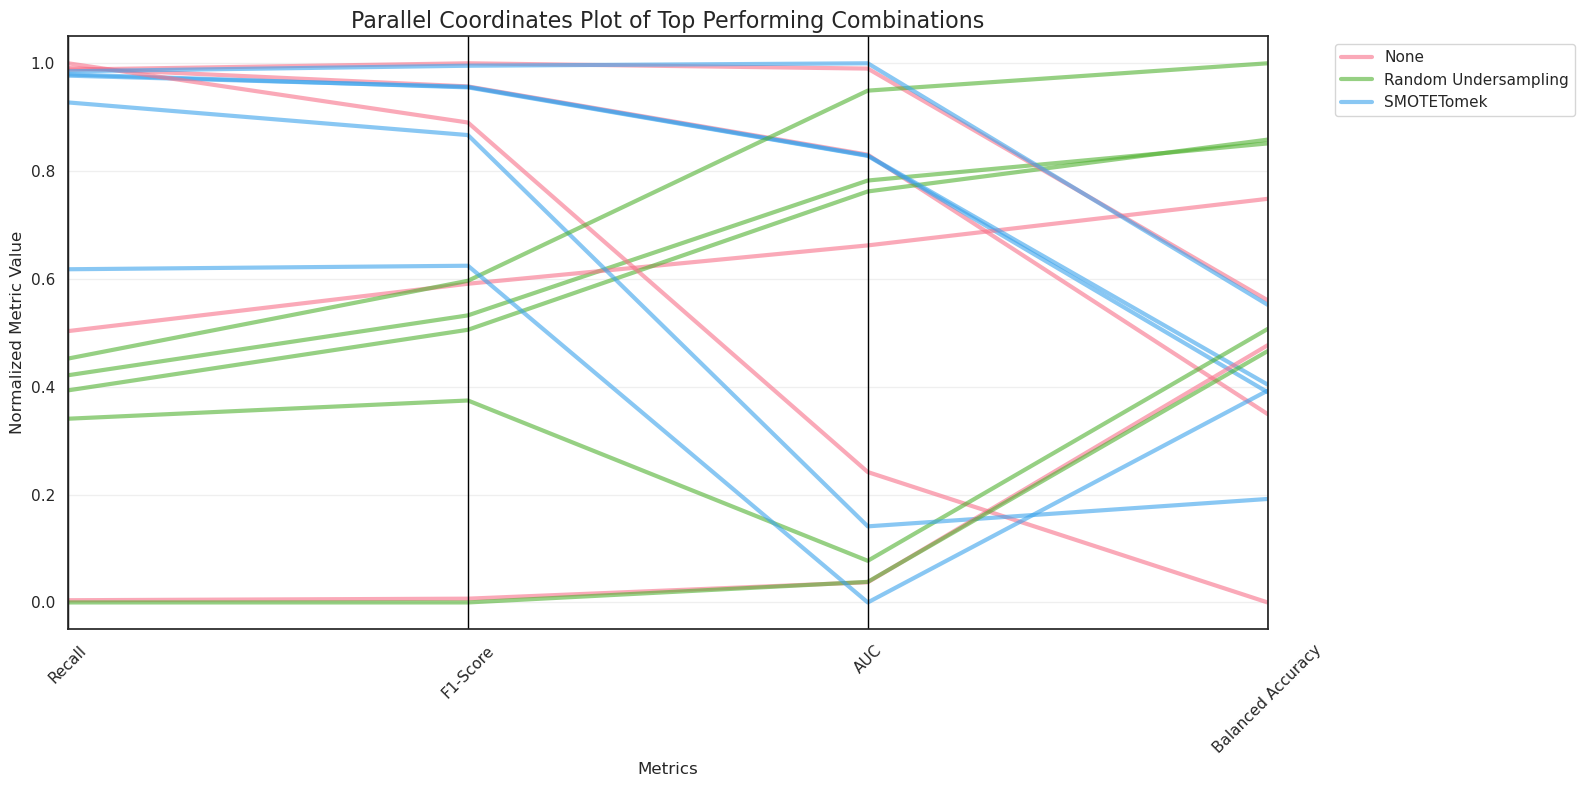

In [65]:
# 7. Parallel Coordinates Plot for Multi-Metric Analysis
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler


# Select top 3 combinations by F1-Score
top_combinations = performance_matrix.nlargest(3, 'AUC')['Sampling'].unique()
plot_data = performance_matrix[performance_matrix['Sampling'].isin(top_combinations)].copy()

# Normalize metrics for parallel coordinates
metrics_to_normalize = ['Recall', 'F1-Score', 'AUC', 'Balanced Accuracy']
scaler = MinMaxScaler()
plot_data[metrics_to_normalize] = scaler.fit_transform(plot_data[metrics_to_normalize])

plt.figure(figsize=(16, 8))
parallel_coordinates(plot_data, 'Sampling', cols=metrics_to_normalize, 
                    color=sns.color_palette("husl", len(top_combinations)), 
                    alpha=0.6, linewidth=3)
plt.title('Parallel Coordinates Plot of Top Performing Combinations', fontsize=16)
plt.ylabel('Normalized Metric Value', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('parallel_coordinatesLDD.png', dpi=300)
plt.show()

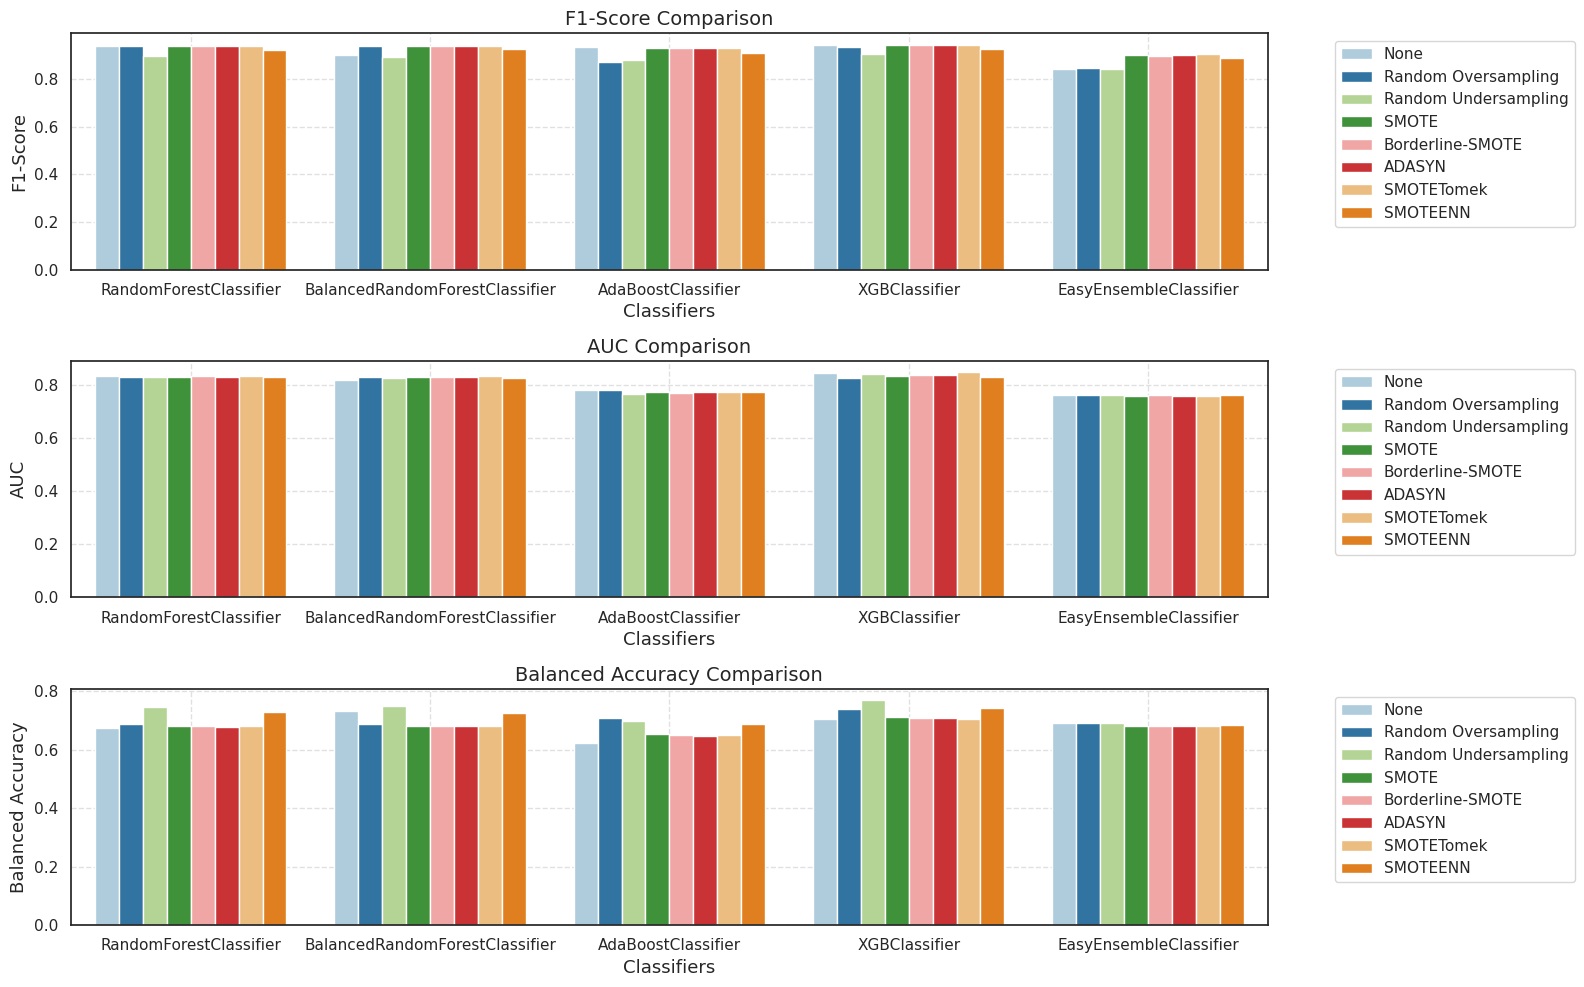

In [66]:
# 2. Comparative Bar Plots for Key Metrics
metrics = ['F1-Score', 'AUC', 'Balanced Accuracy']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 10))

for ax, metric in zip(axes, metrics):
    sns.barplot(data=performance_matrix, x='Classifier', y=metric, hue='Sampling', ax=ax,palette ='Paired')
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_xlabel('Classifiers', fontsize=13)
    ax.set_ylabel(metric, fontsize=13)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.6)
    
    

plt.tight_layout()
plt.savefig('comparative_metrics_LDD.png', dpi=300)
plt.show()

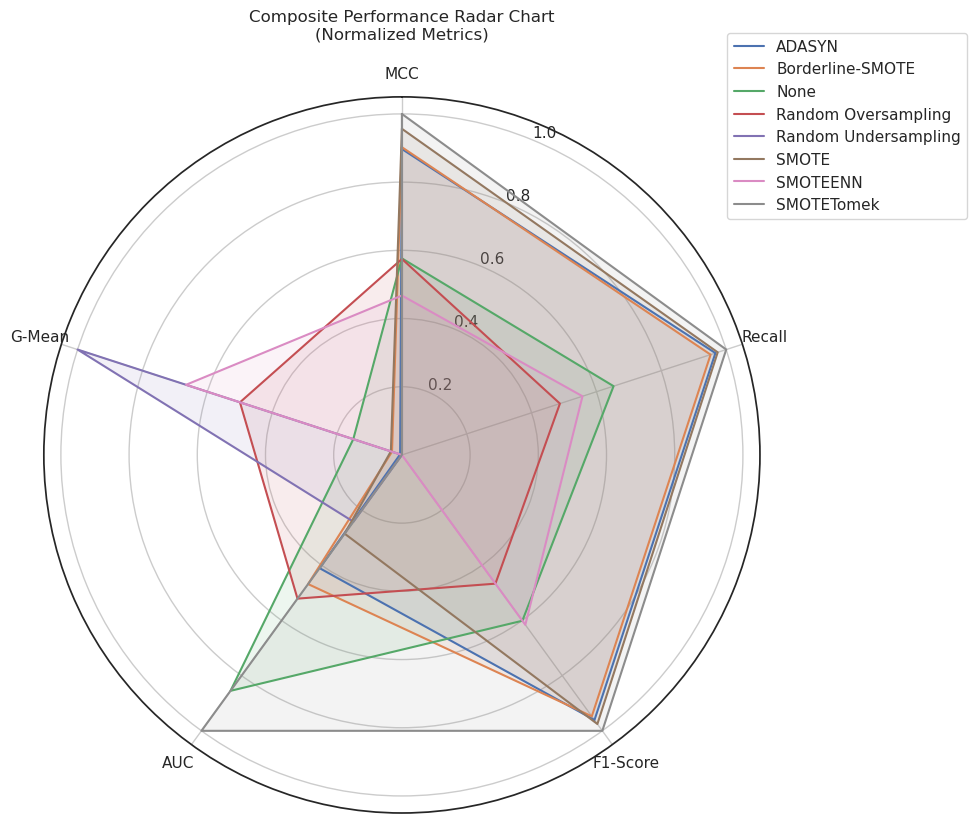

In [67]:
def plot_composite_radar_chart(performance_matrix):
    metrics = ['MCC', 'Recall', 'F1-Score', 'AUC', 'G-Mean']
    plot_data = performance_matrix.groupby('Sampling')[metrics].mean().reset_index()
    
    # Normalize data
    plot_data[metrics] = plot_data[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    for idx, row in plot_data.iterrows():
        values = row[metrics].tolist()
        values += values[:1]
        ax.plot(angles, values, label=row['Sampling'])
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.set_title('Composite Performance Radar Chart\n(Normalized Metrics)', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.savefig('composite_radalddr.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_composite_radar_chart(performance_matrix)

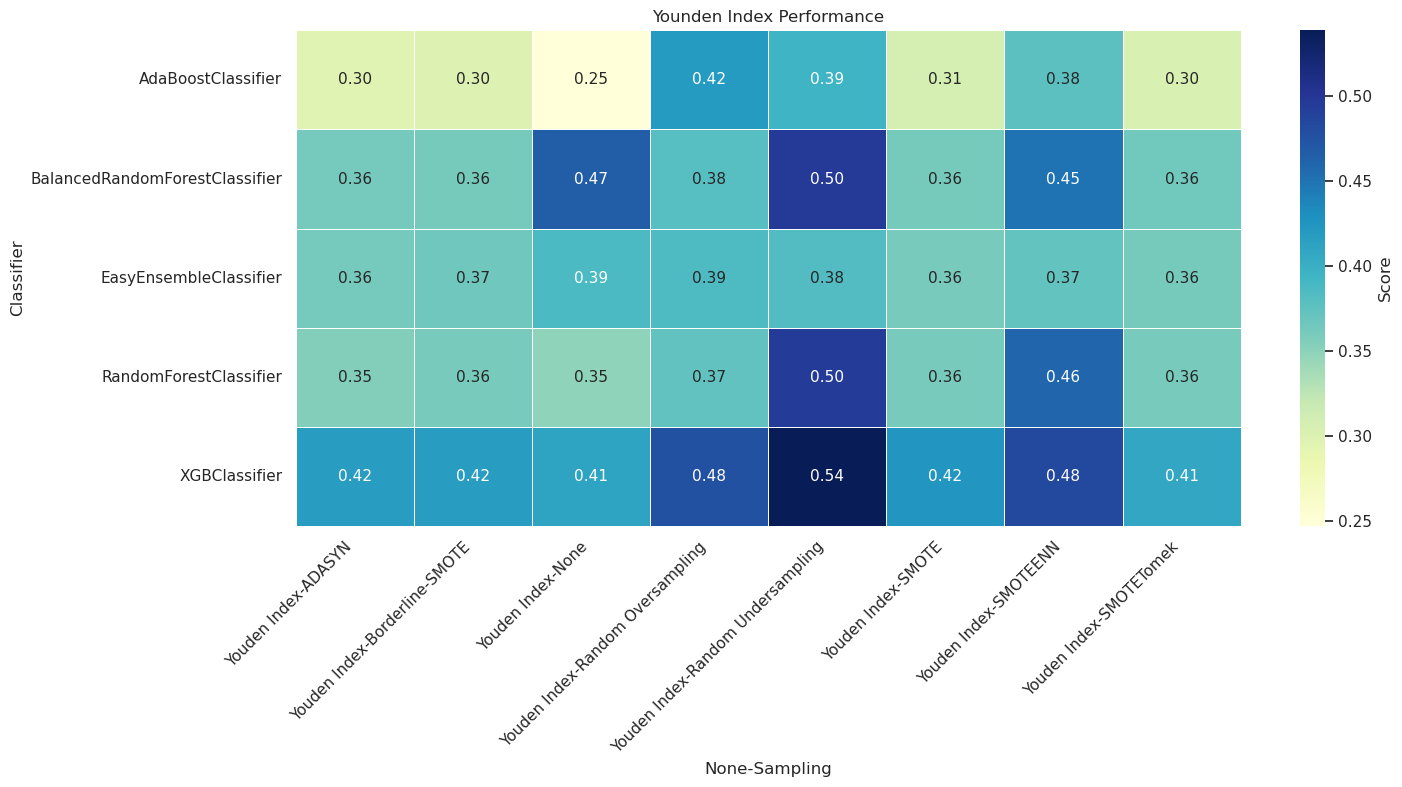

In [68]:
def plot_performance_heatmap(performance_matrix):
    metrics = ['Youden Index']
    pivot_df = performance_matrix.pivot(index='Classifier', columns='Sampling', values=metrics)
    
    plt.figure(figsize=(15, 8))
    sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu", 
                cbar_kws={'label': 'Score'}, linewidths=.5)
    plt.title('Younden Index Performance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('Younden_index.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_performance_heatmap(performance_matrix)

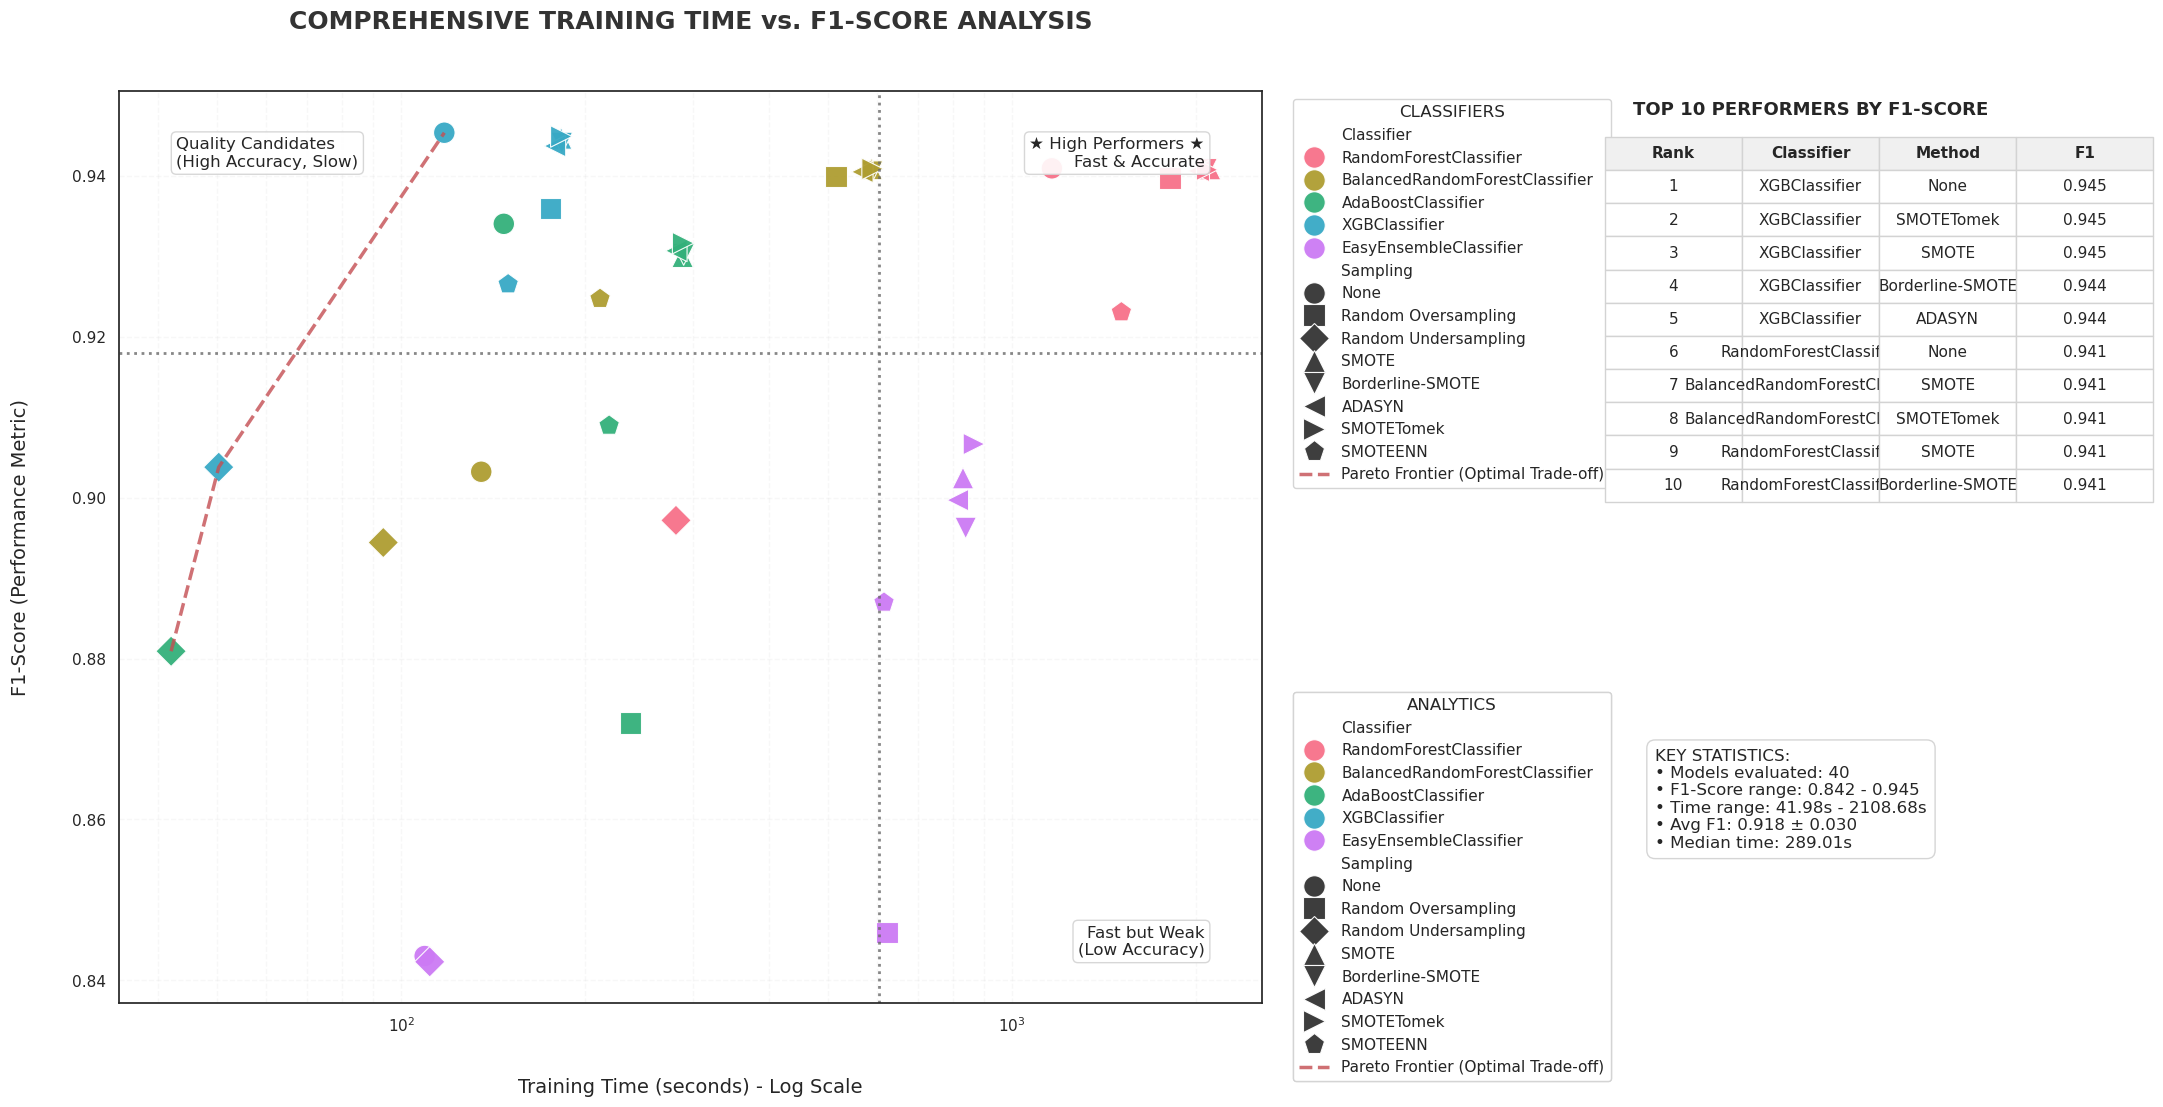

In [69]:
def plot_time_vs_performance_analysis(performance_matrix):
    """
    Ultimate visualization of training time vs. performance trade-off with perfect layout.
    """
    # Set up the figure with professional layout
    plt.figure(figsize=(24, 12))
    gs = plt.GridSpec(1, 2, width_ratios=[2.5, 1], wspace=0.4, hspace=0.1)
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    
    # --- MAIN SCATTER PLOT ---
    # Create custom color palette and markers
    classifier_palette = sns.color_palette("husl", n_colors=len(performance_matrix['Classifier'].unique()))
    sampling_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'X', 'P']
    
    # Enhanced scatter plot with perfect styling
    scatter = sns.scatterplot(
        data=performance_matrix,
        x='Training Time (s)',
        y='F1-Score',
        hue='Classifier',
        style='Sampling',
        s=240,
        alpha=0.95,
        palette=classifier_palette,
        markers=sampling_markers[:len(performance_matrix['Sampling'].unique())],
        edgecolor='w',
        linewidth=0.8,
        ax=ax1
    )
    
    # --- EFFICIENCY FRONTIER ---
    points = performance_matrix[['Training Time (s)', 'F1-Score']].values
    pareto_front = []
    for point in points:
        if not any((point[0] > p[0]) and (point[1] < p[1]) for p in points):
            pareto_front.append(point)
    pareto_front = np.array(sorted(pareto_front, key=lambda x: x[0]))
    ax1.plot(pareto_front[:,0], pareto_front[:,1], 'r--', alpha=0.8, linewidth=2.5, 
             label='Pareto Frontier (Optimal Trade-off)')
    
    # --- REFERENCE LINES AND QUADRANTS ---
    avg_time = performance_matrix['Training Time (s)'].mean()
    avg_f1 = performance_matrix['F1-Score'].mean()
    ax1.axhline(avg_f1, color='dimgray', linestyle=':', alpha=0.8, linewidth=2)
    ax1.axvline(avg_time, color='dimgray', linestyle=':', alpha=0.8, linewidth=2)
    
    # Add quadrant annotations with enhanced styling
    bbox_props = dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='lightgray', alpha=0.9)
    ax1.text(0.95, 0.95, '★ High Performers ★\nFast & Accurate', 
             transform=ax1.transAxes, ha='right', va='top',
             bbox=bbox_props, fontsize=12)
    ax1.text(0.05, 0.95, 'Quality Candidates\n(High Accuracy, Slow)', 
             transform=ax1.transAxes, ha='left', va='top',
             bbox=bbox_props, fontsize=12)
    ax1.text(0.95, 0.05, 'Fast but Weak\n(Low Accuracy)', 
             transform=ax1.transAxes, ha='right', va='bottom',
             bbox=bbox_props, fontsize=12)
    
    # --- AXIS AND TITLE STYLING ---
    ax1.set_title('COMPREHENSIVE TRAINING TIME vs. F1-SCORE ANALYSIS\n', 
                 fontsize=18, pad=25, fontweight='bold', color='#333333')
    ax1.set_xlabel('\nTraining Time (seconds) - Log Scale', fontsize=14, labelpad=15)
    ax1.set_ylabel('F1-Score (Performance Metric)\n', fontsize=14, labelpad=15)
    ax1.set_xscale('log')
    ax1.grid(True, which='both', alpha=0.15, linestyle='--')
    
    # --- PERFECTLY ORGANIZED LEGENDS ---
    # Classifier legend (color)
    classifier_legend = ax1.legend(
        title='CLASSIFIERS',
        title_fontsize=12,
        fontsize=11,
        loc='upper left',
        bbox_to_anchor=(1.02, 1),
        frameon=True,
        framealpha=0.95,
        edgecolor='lightgray',
        facecolor='white'
    )
    
    # Sampling legend (markers)
    sampling_legend = ax1.legend(
        title='SAMPLING METHODS',
        title_fontsize=12,
        fontsize=11,
        loc='upper left',
        bbox_to_anchor=(1.02, 0.65),
        frameon=True,
        framealpha=0.95,
        edgecolor='lightgray',
        facecolor='white'
    )
    
    # Add first legend back after second overwrites it
    ax1.add_artist(classifier_legend)
    
    # Pareto frontier legend
    frontier_legend = ax1.legend(
        title='ANALYTICS',
        title_fontsize=12,
        fontsize=11,
        loc='upper left',
        bbox_to_anchor=(1.02, 0.35),
        frameon=True,
        framealpha=0.95,
        edgecolor='lightgray',
        facecolor='white'
    )
    ax1.add_artist(frontier_legend)
    
    # --- RIGHT SIDE ANALYSIS PANEL ---
    ax2.axis('off')
    
    # Create table data with ranking
    top_combinations = performance_matrix.nlargest(10, 'F1-Score')[
        ['Classifier', 'Sampling', 'F1-Score', 'Training Time (s)']].copy()
    top_combinations['Rank'] = range(1, len(top_combinations)+1)
    top_combinations['F1-Score'] = top_combinations['F1-Score'].apply(lambda x: f"{x:.3f}")
    top_combinations['Training Time (s)'] = top_combinations['Training Time (s)'].apply(lambda x: f"{x:.1f}s")
    
    # Table 1: Top Performers
    table1 = ax2.table(
        cellText=top_combinations[['Rank', 'Classifier', 'Sampling', 'F1-Score']].values,
        colLabels=['Rank', 'Classifier', 'Method', 'F1'],
        cellLoc='center',
        loc='upper center',
        bbox=[0.05, 0.55, 1.2, 0.4]  # [x, y, width, height]
    )
    
    # Table 2: Time Analysis
    #fastest = performance_matrix.nsmallest(3, 'Training Time (s)')
    #table2 = ax2.table(
       # cellText=fastest[['Classifier', 'Sampling', 'Training Time (s)']].values,
        #colLabels=['Classifier', 'Method', 'Time(s)'],
        #cellLoc='center',
        #loc='upper center',
       # bbox=[0.05, 0.1, 1.9, 0.3]
    #)
    
    # Style tables
    for table in [table1]:
        table.auto_set_font_size(False)
        table.set_fontsize(11)
        for (row, col), cell in table.get_celld().items():
            cell.set_edgecolor('lightgray')
            if row == 0:
                cell.set_facecolor('#f0f0f0')
                cell.set_text_props(weight='bold')
    
    # Add titles to tables
    ax2.text(0.5, 0.97, "TOP 10 PERFORMERS BY F1-SCORE", 
             ha='center', va='bottom', fontsize=13, fontweight='bold')
   # ax2.text(0.5, 0.52, "FASTEST MODELS", 
           #  ha='center', va='bottom', fontsize=13, fontweight='bold')
    
    # --- SUMMARY STATISTICS ---
    stats_text = [
        "KEY STATISTICS:",
        f"• Models evaluated: {len(performance_matrix)}",
        f"• F1-Score range: {performance_matrix['F1-Score'].min():.3f} - {performance_matrix['F1-Score'].max():.3f}",
        f"• Time range: {performance_matrix['Training Time (s)'].min():.2f}s - {performance_matrix['Training Time (s)'].max():.2f}s",
        f"• Avg F1: {performance_matrix['F1-Score'].mean():.3f} ± {performance_matrix['F1-Score'].std():.3f}",
        f"• Median time: {performance_matrix['Training Time (s)'].median():.2f}s"
    ]
    
    plt.figtext(0.72, 0.25, "\n".join(stats_text), fontsize=12, 
               bbox=dict(facecolor='white', alpha=0.95, edgecolor='lightgray', boxstyle='round,pad=0.5'))
    
    # Final polish
    plt.subplots_adjust(top=0.88, bottom=0.12, left=0.08, right=0.88)
    plt.savefig('detailed_performance_analysisldd.png', 
               dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

# Example usage:
plot_time_vs_performance_analysis(performance_matrix)

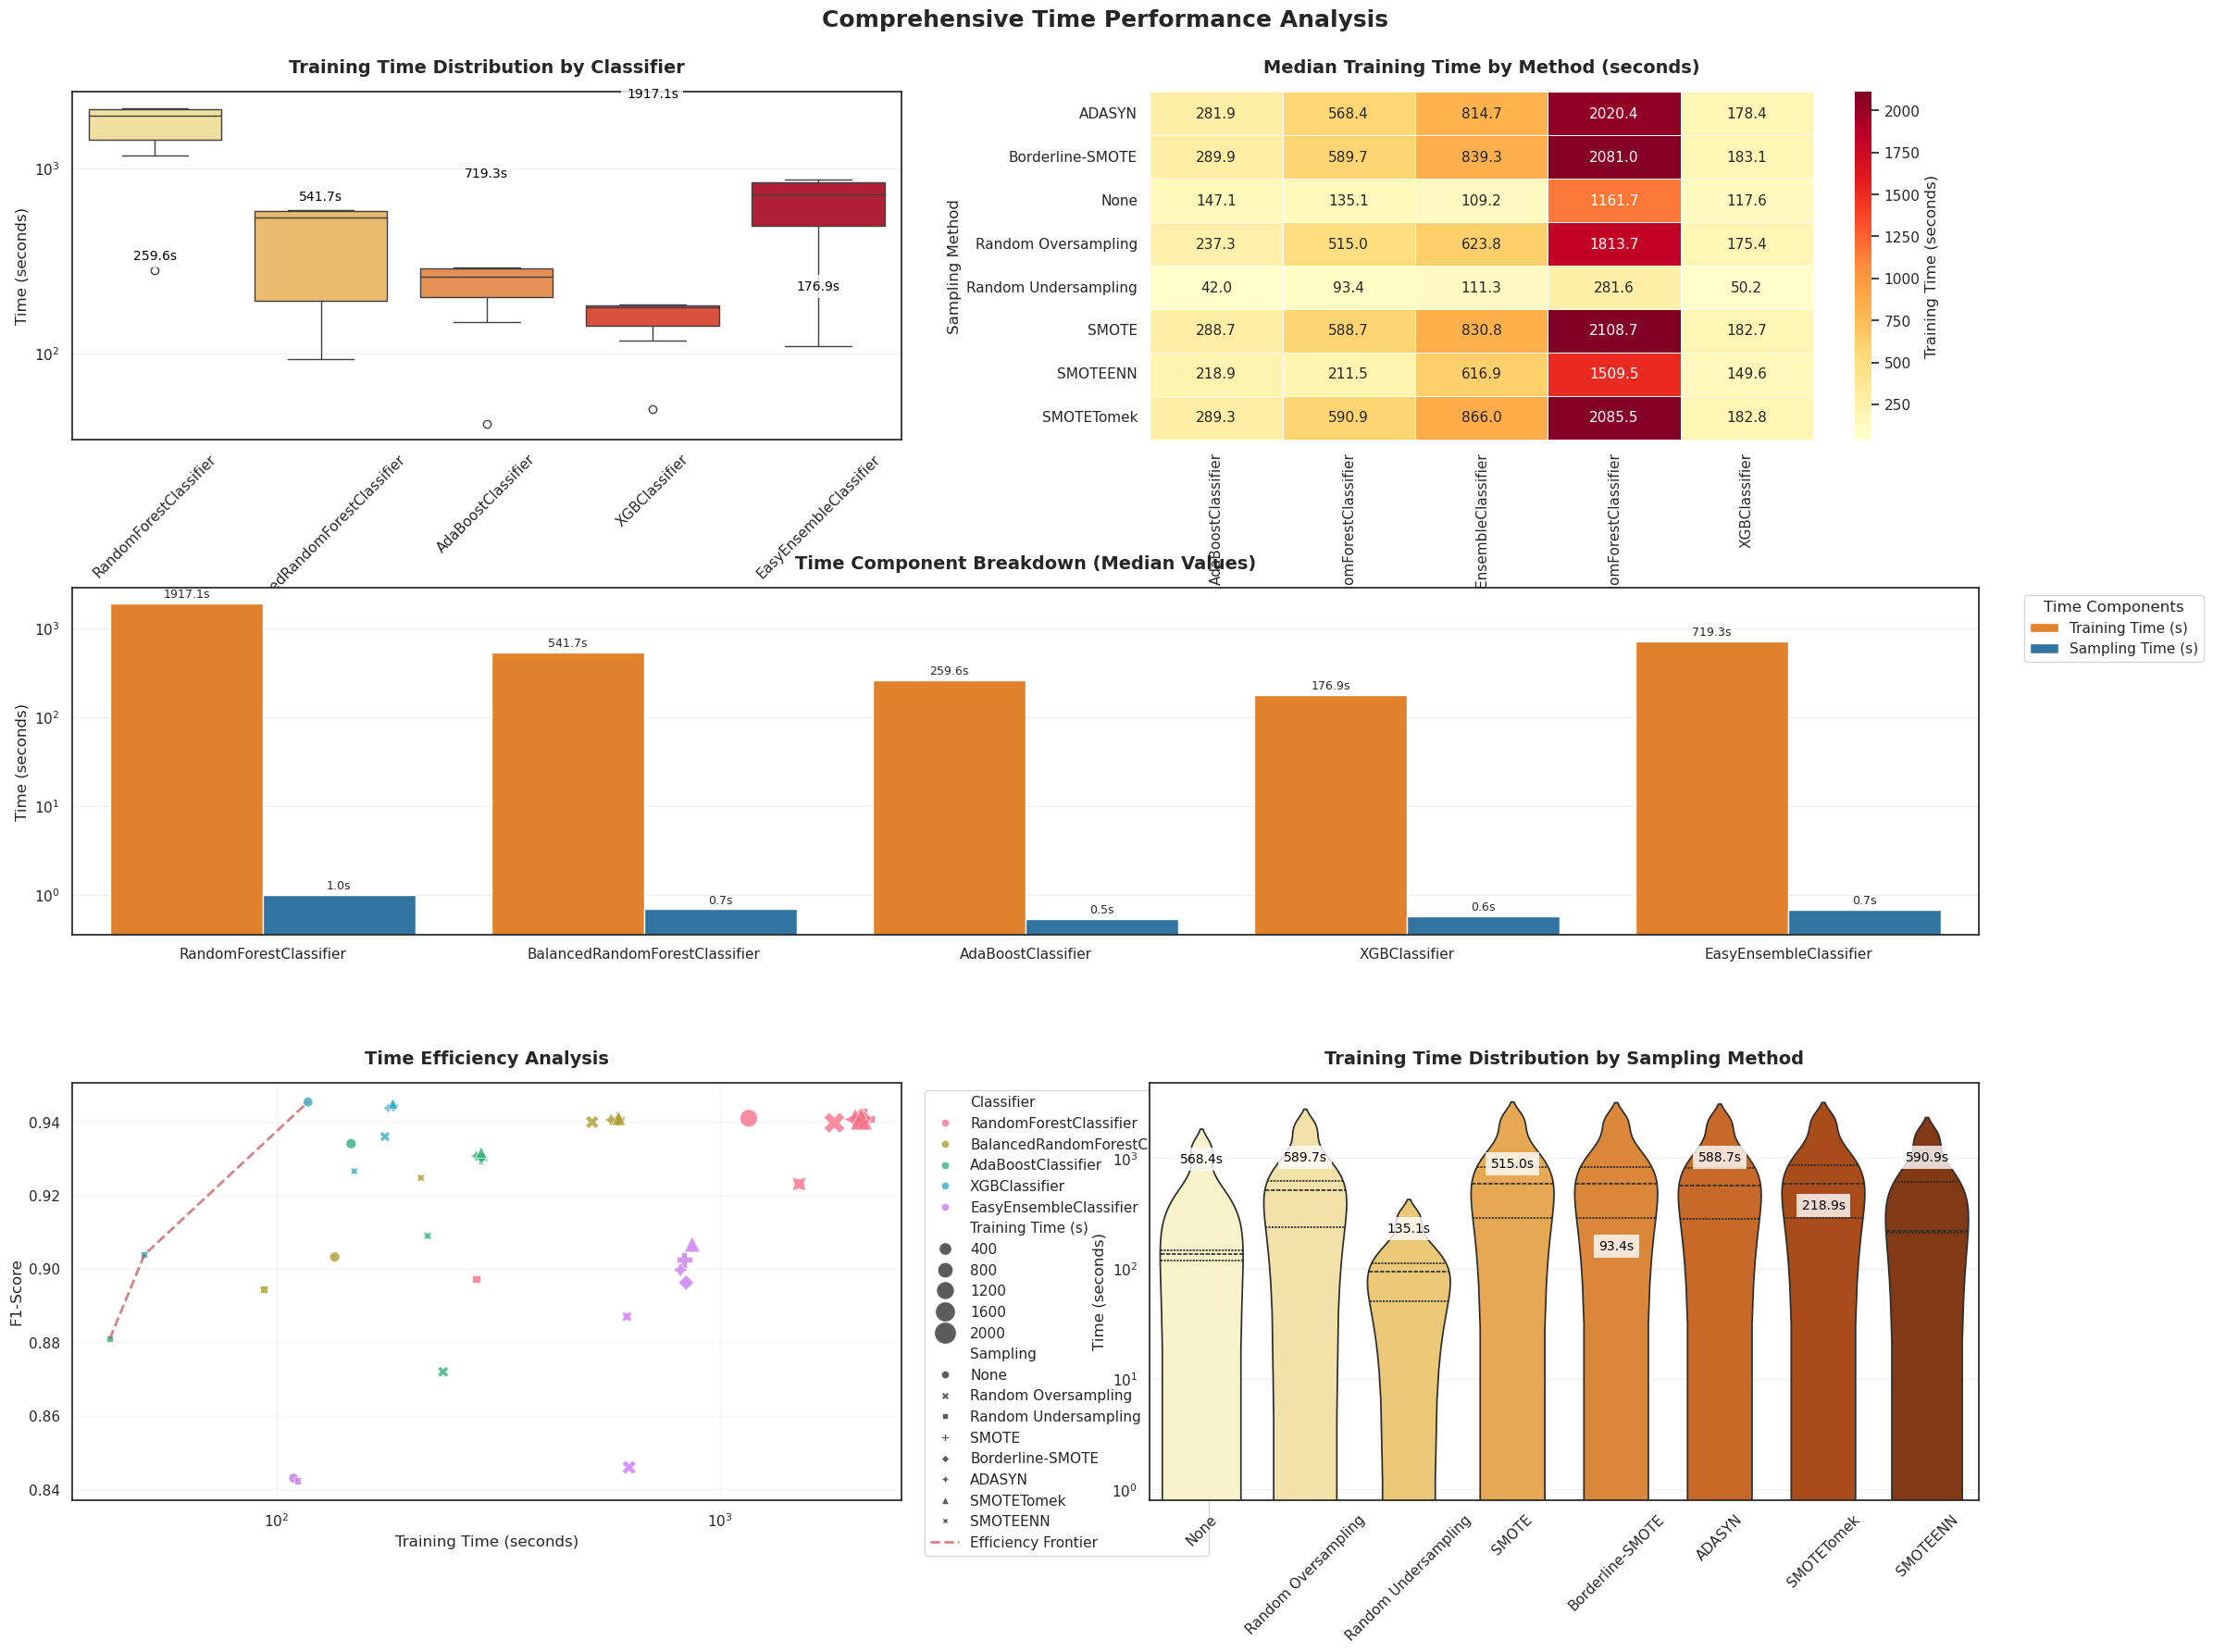

In [70]:
def plot_time_analysis(performance_matrix):
    """
    Comprehensive time performance analysis with multiple detailed visualizations.
    """
    # Create palettes first
    classifier_palette = sns.color_palette("husl", n_colors=len(performance_matrix['Classifier'].unique()))
    time_palette = sns.color_palette("YlOrRd", n_colors=len(performance_matrix['Classifier'].unique()))
    
    # Calculate Pareto front for efficiency analysis
    points = performance_matrix[['Training Time (s)', 'F1-Score']].values
    pareto_front = []
    for point in points:
        if not any((point[0] > p[0]) and (point[1] < p[1]) for p in points):
            pareto_front.append(point)
    pareto_front = np.array(sorted(pareto_front, key=lambda x: x[0]))

    # Set up the figure grid
    plt.figure(figsize=(24, 18))
    gs = plt.GridSpec(3, 2, height_ratios=[1, 1, 1.2])
    
    # --- Plot 1: Training Time Distribution by Classifier ---
    ax1 = plt.subplot(gs[0, 0])
    sns.boxplot(
        data=performance_matrix,
        x='Classifier',
        y='Training Time (s)',
        palette=time_palette,
        ax=ax1
    )
    ax1.set_title('Training Time Distribution by Classifier', fontsize=14, pad=15, fontweight='bold')
    ax1.set_xlabel('')
    ax1.set_ylabel('Time (seconds)', fontsize=12)
    ax1.set_yscale('log')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, axis='y', alpha=0.3)
    
    # Add median values annotations
    medians = performance_matrix.groupby('Classifier')['Training Time (s)'].median()
    for xtick in ax1.get_xticks():
        ax1.text(xtick, medians[xtick]*1.2, f'{medians[xtick]:.1f}s', 
                ha='center', va='bottom', fontsize=10, color='black',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    # --- Plot 2: Time vs Sampling Method Heatmap ---
    ax2 = plt.subplot(gs[0, 1])
    time_heatmap = performance_matrix.pivot_table(
        index='Sampling',
        columns='Classifier',
        values='Training Time (s)',
        aggfunc='median'
    )
    sns.heatmap(
        time_heatmap,
        annot=True,
        fmt=".1f",
        cmap="YlOrRd",
        linewidths=0.5,
        cbar_kws={'label': 'Training Time (seconds)'},
        ax=ax2
    )
    ax2.set_title('Median Training Time by Method (seconds)', fontsize=14, pad=15, fontweight='bold')
    ax2.set_xlabel('')
    ax2.set_ylabel('Sampling Method', fontsize=12)
    
    # --- Plot 3: Time Breakdown Stacked Bar Chart ---
    ax3 = plt.subplot(gs[1, :])
    time_components = performance_matrix.melt(
        id_vars=['Classifier', 'Sampling'],
        value_vars=['Training Time (s)', 'Sampling Time (s)'],
        var_name='Time Component',
        value_name='Time (seconds)'
    )
    
    sns.barplot(
        data=time_components,
        x='Classifier',
        y='Time (seconds)',
        hue='Time Component',
        estimator=np.median,
        ci=None,
        palette=['#ff7f0e', '#1f77b4'],
        ax=ax3
    )
    ax3.set_title('Time Component Breakdown (Median Values)', fontsize=14, pad=15, fontweight='bold')
    ax3.set_xlabel('')
    ax3.set_ylabel('Time (seconds)', fontsize=12)
    ax3.set_yscale('log')
    ax3.legend(title='Time Components', bbox_to_anchor=(1.02, 1), loc='upper left')
    ax3.grid(True, axis='y', alpha=0.3)
    
    # Add value labels
    for p in ax3.patches:
        ax3.annotate(
            f"{p.get_height():.1f}s",
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 7),
            textcoords='offset points',
            fontsize=9
        )
    
    # --- Plot 4: Time Efficiency Analysis ---
    ax4 = plt.subplot(gs[2, 0])
    sns.scatterplot(
        data=performance_matrix,
        x='Training Time (s)',
        y='F1-Score',
        size='Training Time (s)',
        sizes=(50, 300),
        hue='Classifier',
        style='Sampling',
        palette=classifier_palette,
        alpha=0.8,
        ax=ax4
    )
    ax4.set_title('Time Efficiency Analysis', fontsize=14, pad=15, fontweight='bold')
    ax4.set_xlabel('Training Time (seconds)', fontsize=12)
    ax4.set_ylabel('F1-Score', fontsize=12)
    ax4.set_xscale('log')
    ax4.grid(True, alpha=0.2)
    
    # Highlight Pareto frontier
    ax4.plot(pareto_front[:,0], pareto_front[:,1], 'r--', alpha=0.7, linewidth=2, label='Efficiency Frontier')
    ax4.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # --- Plot 5: Time Distribution by Sampling Method ---
    ax5 = plt.subplot(gs[2, 1])
    sns.violinplot(
        data=performance_matrix,
        x='Sampling',
        y='Training Time (s)',
        inner='quartile',
        palette='YlOrBr',
        ax=ax5
    )
    ax5.set_title('Training Time Distribution by Sampling Method', fontsize=14, pad=15, fontweight='bold')
    ax5.set_xlabel('')
    ax5.set_ylabel('Time (seconds)', fontsize=12)
    ax5.set_yscale('log')
    ax5.tick_params(axis='x', rotation=45)
    ax5.grid(True, axis='y', alpha=0.3)
    
    # Add median values annotations
    sampling_medians = performance_matrix.groupby('Sampling')['Training Time (s)'].median()
    for xtick in ax5.get_xticks():
        ax5.text(xtick, sampling_medians[xtick]*1.5, f'{sampling_medians[xtick]:.1f}s', 
                ha='center', va='bottom', fontsize=10, color='black',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    # --- Final Adjustments ---
    plt.suptitle('Comprehensive Time Performance Analysis', y=0.99, fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(top=0.94, hspace=0.4, wspace=0.3)
    plt.savefig('detailed_time_analysisldd.png', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage:
plot_time_analysis(performance_matrix)

In [71]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_time_analysis_separate(performance_matrix, output_dir="time_analysis_plots"):
    """
    Generate and save time analysis plots separately with perfect spacing.
    Returns paths to saved plots.
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    plot_paths = []
    
    # Create palettes and calculate Pareto front
    classifier_palette = sns.color_palette("husl", n_colors=len(performance_matrix['Classifier'].unique()))
    time_palette = sns.color_palette("YlOrRd", n_colors=len(performance_matrix['Classifier'].unique()))
    
    points = performance_matrix[['Training Time (s)', 'F1-Score']].values
    pareto_front = []
    for point in points:
        if not any((point[0] > p[0]) and (point[1] < p[1]) for p in points):
            pareto_front.append(point)
    pareto_front = np.array(sorted(pareto_front, key=lambda x: x[0]))

    # --- Plot 1: Training Time Distribution by Classifier ---
    plt.figure(figsize=(12, 8))
    ax1 = sns.boxplot(
        data=performance_matrix,
        x='Classifier',
        y='Training Time (s)',
        palette=time_palette
    )
    plt.title('Training Time Distribution by Classifier', fontsize=14, pad=15, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', alpha=0.3)
    
    # Add median values annotations
    medians = performance_matrix.groupby('Classifier')['Training Time (s)'].median()
    for xtick in ax1.get_xticks():
        ax1.text(xtick, medians[xtick]*1.2, f'{medians[xtick]:.1f}s', 
                ha='center', va='bottom', fontsize=10, color='black',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    plt.tight_layout()
    plot1_path = os.path.join(output_dir, "1_time_distribution_classifiersyyy.png")
    plt.savefig(plot1_path, dpi=300, bbox_inches='tight')
    plot_paths.append(plot1_path)
    plt.close()
    
    # --- Plot 2: Time vs Sampling Method Heatmap ---
    plt.figure(figsize=(12, 8))
    time_heatmap = performance_matrix.pivot_table(
        index='Sampling',
        columns='Classifier',
        values='Training Time (s)',
        aggfunc='median'
    )
    sns.heatmap(
        time_heatmap,
        annot=True,
        fmt=".1f",
        cmap="YlOrRd",
        linewidths=0.5,
        cbar_kws={'label': 'Training Time (seconds)'}
    )
    plt.title('Median Training Time by Method (seconds)', fontsize=14, pad=15, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Sampling Method', fontsize=12)
    plt.tight_layout()
    plot2_path = os.path.join(output_dir, "2_time_heatmahhh.png")
    plt.savefig(plot2_path, dpi=300, bbox_inches='tight')
    plot_paths.append(plot2_path)
    plt.close()
    
    # --- Plot 3: Time Breakdown Stacked Bar Chart ---
    plt.figure(figsize=(16, 8))
    time_components = performance_matrix.melt(
        id_vars=['Classifier', 'Sampling'],
        value_vars=['Training Time (s)', 'Sampling Time (s)'],
        var_name='Time Component',
        value_name='Time (seconds)'
    )
    
    ax3 = sns.barplot(
        data=time_components,
        x='Classifier',
        y='Time (seconds)',
        hue='Time Component',
        estimator=np.median,
        ci=None,
        palette=['#ff7f0e', '#1f77b4']
    )
    plt.title('Time Component Breakdown (Median Values)', fontsize=14, pad=15, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.yscale('log')
    plt.legend(title='Time Components', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True, axis='y', alpha=0.3)
    
    # Add value labels
    for p in ax3.patches:
        ax3.annotate(
            f"{p.get_height():.1f}s",
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 7),
            textcoords='offset points',
            fontsize=9
        )
    
    plt.tight_layout()
    plot3_path = os.path.join(output_dir, "3_time_breakdown.png")
    plt.savefig(plot3_path, dpi=300, bbox_inches='tight')
    plot_paths.append(plot3_path)
    plt.close()
    
    # --- Plot 4: Time Efficiency Analysis ---
    plt.figure(figsize=(12, 8))
    ax4 = sns.scatterplot(
        data=performance_matrix,
        x='Training Time (s)',
        y='F1-Score',
        size='Training Time (s)',
        sizes=(50, 300),
        hue='Classifier',
        style='Sampling',
        palette=classifier_palette,
        alpha=0.8
    )
    plt.title('Time Efficiency Analysis', fontsize=14, pad=15, fontweight='bold')
    plt.xlabel('Training Time (seconds)', fontsize=12)
    plt.ylabel('F1-Score', fontsize=12)
    plt.xscale('log')
    plt.grid(True, alpha=0.2)
    
    # Highlight Pareto frontier
    plt.plot(pareto_front[:,0], pareto_front[:,1], 'r--', alpha=0.7, linewidth=2, label='Efficiency Frontier')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    
    plt.tight_layout()
    plot4_path = os.path.join(output_dir, "4_time_efficiency.png")
    plt.savefig(plot4_path, dpi=300, bbox_inches='tight')
    plot_paths.append(plot4_path)
    plt.close()
    
    # --- Plot 5: Time Distribution by Sampling Method ---
    plt.figure(figsize=(12, 8))
    ax5 = sns.violinplot(
        data=performance_matrix,
        x='Sampling',
        y='Training Time (s)',
        inner='quartile',
        palette='YlOrBr'
    )
    plt.title('Training Time Distribution by Sampling Method', fontsize=14, pad=15, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', alpha=0.3)
    
    # Add median values annotations
    sampling_medians = performance_matrix.groupby('Sampling')['Training Time (s)'].median()
    for xtick in ax5.get_xticks():
        ax5.text(xtick, sampling_medians[xtick]*1.5, f'{sampling_medians[xtick]:.1f}s', 
                ha='center', va='bottom', fontsize=10, color='black',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    plt.tight_layout()
    plot5_path = os.path.join(output_dir, "5_time_distribution_samplinghhh.png")
    plt.savefig(plot5_path, dpi=300, bbox_inches='tight')
    plot_paths.append(plot5_path)
    plt.close()
    
    return plot_paths

# Example usage:
plot_paths = plot_time_analysis_separate(performance_matrix)
print("Saved plots at:", plot_paths)

Saved plots at: ['time_analysis_plots\\1_time_distribution_classifiersyyy.png', 'time_analysis_plots\\2_time_heatmahhh.png', 'time_analysis_plots\\3_time_breakdown.png', 'time_analysis_plots\\4_time_efficiency.png', 'time_analysis_plots\\5_time_distribution_samplinghhh.png']


In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score, 
    roc_auc_score, classification_report
)
from collections import Counter

# Define classifiers
classifiers = [
    RandomForestClassifier(random_state=42, n_jobs=-1),
    BalancedRandomForestClassifier(random_state=42, n_jobs=-1),
    AdaBoostClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
    EasyEnsembleClassifier(random_state=42)
]

# Define resampling techniques
resampling_techniques = {
    'None': None,
    'Random Oversampling': RandomOverSampler(random_state=42),
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'Borderline-SMOTE': BorderlineSMOTE(random_state=42, kind='borderline-1'),
    'ADASYN': ADASYN(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42),
}

# Initialize results storage
all_results = []

# Run 50 simulations with different random states
for sim in range(50):
    random_state = 42 + sim  # Different random state for each simulation
    
    print(f"\nRunning simulation {sim+1}/50 with random_state={random_state}")
    
    # Splitting data into trainset and test set with current random state
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=random_state, stratify=y
    )
    
    # Dictionary to store results for this simulation
    sim_results = {'Simulation': sim+1, 'Random_State': random_state}
    
    # Loop through classifiers and evaluate each with each resampling technique
    for classifier in classifiers:
        classifier_name = type(classifier).__name__

        for sampling_name, sampler in resampling_techniques.items():
            # Create a fresh instance of the sampler with current random state
            if sampler is not None:
                sampler_instance = sampler.set_params(random_state=random_state)
            else:
                sampler_instance = None
            
            # Apply resampling if sampler is not None
            if sampler_instance is not None:
                X_resampled, y_resampled = sampler_instance.fit_resample(X_train, y_train)
            else:
                X_resampled, y_resampled = X_train, y_train

            # Training the classifier
            classifier.fit(X_resampled, y_resampled)

            # Make predictions
            y_pred = classifier.predict(X_test)
            y_pred_prob = classifier.predict_proba(X_test)[:, 1] if hasattr(classifier, "predict_proba") else np.zeros_like(y_pred)

            # Calculate metrics
            precision = precision_score(y_test, y_pred, zero_division=0)
            recall = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            geometric_mean = np.sqrt(precision * recall) if precision * recall > 0 else 0
            auc = roc_auc_score(y_test, y_pred_prob)
            
            # Store results
            key = f"{classifier_name}_{sampling_name}"
            sim_results[f"{key}_AUC"] = auc
            sim_results[f"{key}_GMean"] = geometric_mean
            sim_results[f"{key}_F1"] = f1
    
    # Add this simulation's results to all_results
    all_results.append(sim_results)

# Convert results to DataFrame
results_df = pd.DataFrame(all_results)

# Save to Excel
output_file = "simulation_results.xlsx"
results_df.to_excel(output_file, index=False)
print(f"\nAll simulation results saved to {output_file}")

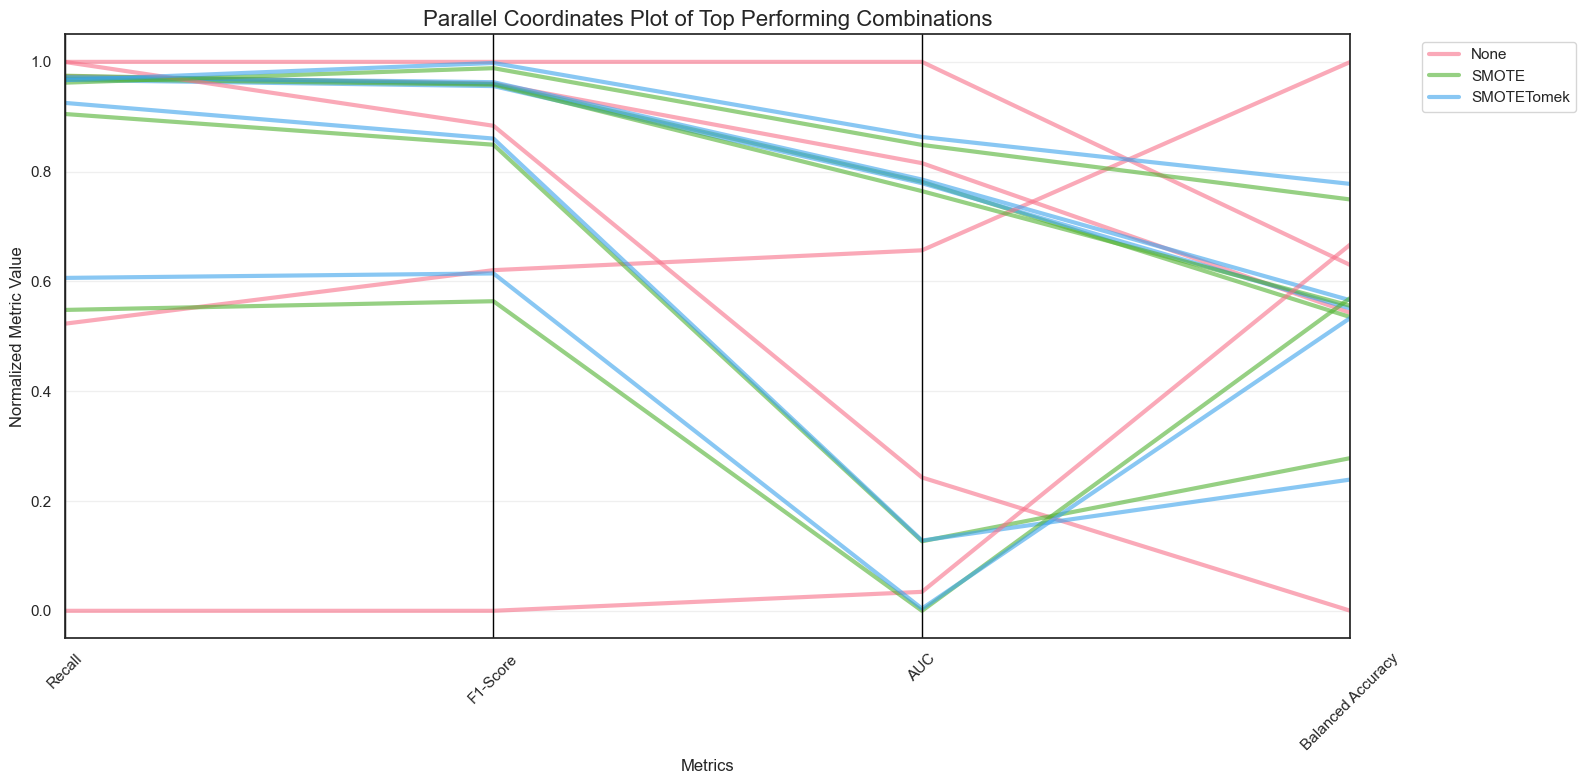

In [132]:
# 7. Parallel Coordinates Plot for Multi-Metric Analysis
from pandas.plotting import parallel_coordinates

# Select top 3 combinations by F1-Score
top_combinations = performance_matrix.nlargest(3, 'AUC')['Sampling'].unique()
plot_data = performance_matrix[performance_matrix['Sampling'].isin(top_combinations)].copy()

# Normalize metrics for parallel coordinates
metrics_to_normalize = ['Recall', 'F1-Score', 'AUC', 'Balanced Accuracy']
scaler = MinMaxScaler()
plot_data[metrics_to_normalize] = scaler.fit_transform(plot_data[metrics_to_normalize])

plt.figure(figsize=(16, 8))
parallel_coordinates(plot_data, 'Sampling', cols=metrics_to_normalize, 
                    color=sns.color_palette("husl", len(top_combinations)), 
                    alpha=0.6, linewidth=3)
plt.title('Parallel Coordinates Plot of Top Performing Combinations', fontsize=16)
plt.ylabel('Normalized Metric Value', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('parallel_coordinates.png', dpi=300)
plt.show()

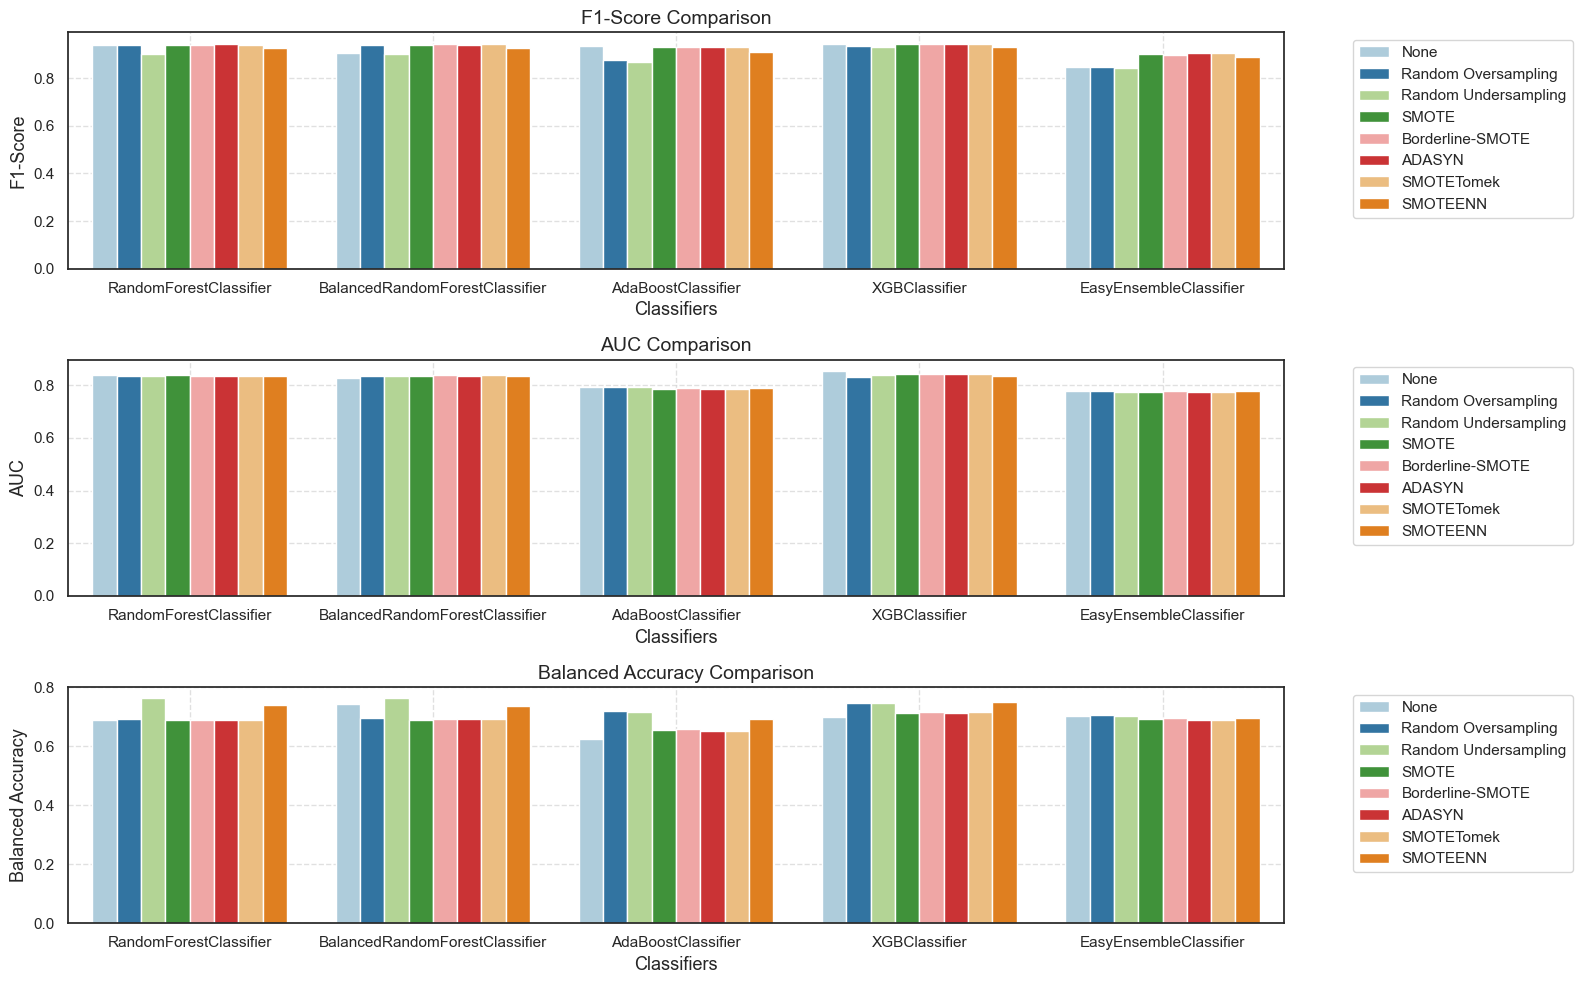

In [112]:
# 2. Comparative Bar Plots for Key Metrics
metrics = ['F1-Score', 'AUC', 'Balanced Accuracy']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 10))

for ax, metric in zip(axes, metrics):
    sns.barplot(data=performance_matrix, x='Classifier', y=metric, hue='Sampling', ax=ax,palette ='Paired')
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_xlabel('Classifiers', fontsize=13)
    ax.set_ylabel(metric, fontsize=13)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.6)
    
    

plt.tight_layout()
plt.savefig('comparative_metrics.png', dpi=300)
plt.show()

In [122]:
# 5. MODEL STABILITY ANALYSIS (Bootstrap Confidence Intervals)
# --------------------------------------------------
from sklearn.utils import resample

def bootstrap_ci(data, n_bootstraps=1000, ci=99):
    bootstrapped_means = []
    for _ in range(n_bootstraps):
        sample = resample(data, replace=True)
        bootstrapped_means.append(np.mean(sample))
    lower = np.percentile(bootstrapped_means, (100 - ci)/2)
    upper = np.percentile(bootstrapped_means, 100 - (100 - ci)/2)
    return lower, upper

# Calculate bootstrap CIs for each combination
ci_data = []
for (clf, sample), group in performance_matrix.groupby(['Classifier', 'Sampling']):
    for metric in ['AUC']:
        lower, upper = bootstrap_ci(group[metric])
        ci_data.append({
            'Classifier': clf,
            'Sampling': sample,
            'Metric': metric,
            'Mean': group[metric].mean(),
            'CI_Lower': lower,
            'CI_Upper': upper
        })

ci_df = pd.DataFrame(ci_data)

In [123]:
ci_df

Classifier              Sampling Metric      Mean  \
0               AdaBoostClassifier                ADASYN    AUC  0.783596   
1               AdaBoostClassifier      Borderline-SMOTE    AUC  0.787417   
2               AdaBoostClassifier                  None    AUC  0.793962   
3               AdaBoostClassifier   Random Oversampling    AUC  0.794248   
4               AdaBoostClassifier  Random Undersampling    AUC  0.791309   
5               AdaBoostClassifier                 SMOTE    AUC  0.784762   
6               AdaBoostClassifier              SMOTEENN    AUC  0.788987   
7               AdaBoostClassifier            SMOTETomek    AUC  0.784865   
8   BalancedRandomForestClassifier                ADASYN    AUC  0.834669   
9   BalancedRandomForestClassifier      Borderline-SMOTE    AUC  0.836992   
10  BalancedRandomForestClassifier                  None    AUC  0.826735   
11  BalancedRandomForestClassifier   Random Oversampling    AUC  0.835687   
12  BalancedRandomForestClassifier  Random Undersampling    AUC  0.835694   
13  BalancedRandomForestClassifier                 SMOTE    AUC  0.835271   
14  BalancedRandomForestClassifier              SMOTEENN    AUC  0.833535   
15  BalancedRandomForestClassifier            SMOTETomek    AUC  0.836938   
16          EasyEnsembleClassifier                ADASYN    AUC  0.774499   
17          EasyEnsembleClassifier      Borderline-SMOTE    AUC  0.778193   
18          EasyEnsembleClassifier                  None    AUC  0.777461   
19          EasyEnsembleClassifier   Random Oversampling    AUC  0.776245   
20          EasyEnsembleClassifier  Random Undersampling    AUC  0.775776   
21          EasyEnsembleClassifier                 SMOTE    AUC  0.774727   
22          EasyEnsembleClassifier              SMOTEENN    AUC  0.778498   
23          EasyEnsembleClassifier            SMOTETomek    AUC  0.775045   
24          RandomForestClassifier                ADASYN    AUC  0.836380   
25          RandomForestClassifier      Borderline-SMOTE    AUC  0.836462   
26          RandomForestClassifier                  None    AUC  0.839308   
27          RandomForestClassifier   Random Oversampling    AUC  0.835212   
28          RandomForestClassifier  Random Undersampling    AUC  0.833799   
29          RandomForestClassifier                 SMOTE    AUC  0.836619   
30          RandomForestClassifier              SMOTEENN    AUC  0.834843   
31          RandomForestClassifier            SMOTETomek    AUC  0.836417   
32                   XGBClassifier                ADASYN    AUC  0.840680   
33                   XGBClassifier      Borderline-SMOTE    AUC  0.841266   
34                   XGBClassifier                  None    AUC  0.853920   
35                   XGBClassifier   Random Oversampling    AUC  0.830502   
36                   XGBClassifier  Random Undersampling    AUC  0.839734   
37                   XGBClassifier                 SMOTE    AUC  0.841937   
38                   XGBClassifier              SMOTEENN    AUC  0.835900   
39                   XGBClassifier            SMOTETomek    AUC  0.843079   

    CI_Lower  CI_Upper  
0   0.783596  0.783596  
1   0.787417  0.787417  
2   0.793962  0.793962  
3   0.794248  0.794248  
4   0.791309  0.791309  
5   0.784762  0.784762  
6   0.788987  0.788987  
7   0.784865  0.784865  
8   0.834669  0.834669  
9   0.836992  0.836992  
10  0.826735  0.826735  
11  0.835687  0.835687  
12  0.835694  0.835694  
13  0.835271  0.835271  
14  0.833535  0.833535  
15  0.836938  0.836938  
16  0.774499  0.774499  
17  0.778193  0.778193  
18  0.777461  0.777461  
19  0.776245  0.776245  
20  0.775776  0.775776  
21  0.774727  0.774727  
22  0.778498  0.778498  
23  0.775045  0.775045  
24  0.836380  0.836380  
25  0.836462  0.836462  
26  0.839308  0.839308  
27  0.835212  0.835212  
28  0.833799  0.833799  
29  0.836619  0.836619  
30  0.834843  0.834843  
31  0.836417  0.836417  
32  0.840680  0.840680  
33  0.841266  0.